# Data Analysis on the Bank Loan Application data

### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')  ## importing the required libraries for filtering out the warning messages
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Verifying CWD path

In [2]:
os.getcwd()

'C:\\Users\\sindh\\My_Python_stuff\\ALY6040_Assignment'

### Importing the Dataset

In [3]:
bank_df = pd.read_csv("C:\\Users\\sindh\\My_Python_stuff\\ALY6040_Assignment\\application_data.csv")
bank_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

### Examining the Data

__Following data import, we'll use the .info(), and.describe() methods to learn more about the dataset.__

In [4]:
## Finding the total number of records in the dataset
bank_df.shape

(307511, 122)

__Observation:__
        <br><br>The following dataset consists of <b>122</b> columns and about __307511__ rows of data.

In [5]:
## Performing descriptive analysis on the entire dataset

bank_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

__Observation:__ 

**As may be seen from the results described above,** 
* Columns AMT INCOME TOTAL, AMT CREDIT, and AMT GOODS PRICE contain extremely large values; therefore, for easier comprehension, these numerical columns will be converted to categorical columns.
* Columns that count days, such as Days Born, Days Worked, Days Registered, Days Id Published, and Days Last Phone Change, have negative values. which will update those values.
* Convert DAYS EMPLOYED to YEARS EMPLOYED and DAYS BIRTH to AGE in years

In [6]:
bank_df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Data Cleaning and Manipulation

#### Finding the null values in the given data sheet

In [7]:
# Creating a function to find the null values in the given sheet

def null(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),3)

In [8]:
null(bank_df)

COMMONAREA_MEDI             69.872
COMMONAREA_AVG              69.872
COMMONAREA_MODE             69.872
NONLIVINGAPARTMENTS_MODE    69.433
NONLIVINGAPARTMENTS_AVG     69.433
                             ...  
NAME_HOUSING_TYPE            0.000
NAME_FAMILY_STATUS           0.000
NAME_EDUCATION_TYPE          0.000
NAME_INCOME_TYPE             0.000
SK_ID_CURR                   0.000
Length: 122, dtype: float64

#### Finding cells missing more than 50% of the data

In [9]:
# Creating a variable to store the columns missing more than 50% of the data

value_missing_50 = null(bank_df)[null(bank_df)>50]
print(value_missing_50)
print("No. of columns missing more than 50% data =", len(value_missing_50))

COMMONAREA_MEDI             69.872
COMMONAREA_AVG              69.872
COMMONAREA_MODE             69.872
NONLIVINGAPARTMENTS_MODE    69.433
NONLIVINGAPARTMENTS_AVG     69.433
NONLIVINGAPARTMENTS_MEDI    69.433
FONDKAPREMONT_MODE          68.386
LIVINGAPARTMENTS_MODE       68.355
LIVINGAPARTMENTS_AVG        68.355
LIVINGAPARTMENTS_MEDI       68.355
FLOORSMIN_AVG               67.849
FLOORSMIN_MODE              67.849
FLOORSMIN_MEDI              67.849
YEARS_BUILD_MEDI            66.498
YEARS_BUILD_MODE            66.498
YEARS_BUILD_AVG             66.498
OWN_CAR_AGE                 65.991
LANDAREA_MEDI               59.377
LANDAREA_MODE               59.377
LANDAREA_AVG                59.377
BASEMENTAREA_MEDI           58.516
BASEMENTAREA_AVG            58.516
BASEMENTAREA_MODE           58.516
EXT_SOURCE_1                56.381
NONLIVINGAREA_MODE          55.179
NONLIVINGAREA_AVG           55.179
NONLIVINGAREA_MEDI          55.179
ELEVATORS_MEDI              53.296
ELEVATORS_AVG       

#### Observation:
   Totally around __41__ columns arte missing more than 50 percent data.

In [10]:
# Printing the column names that are missing more tha 50% data
value_missing_50.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

In [11]:
# Dropping the above columns from the data set, as these following items will not yeild any help while analysis
bank_df.drop(columns = value_missing_50.index, inplace = True)

In [12]:
bank_df.shape

(307511, 81)

#### Observation: 
<br>Dropping the above __41__ columns from the data set, thus we are left with __81__ columns for analysis.


### Dealing with columns missing around 20% data

In [13]:
#Checking the value again

bank_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

#### Dealing with other null values in the data set

In [14]:
# Trying to deal with null values which are missing data greater than 20%

value_greater_20 = null(bank_df)[null(bank_df)>20]
value_greater_20

FLOORSMAX_AVG                   49.761
FLOORSMAX_MODE                  49.761
FLOORSMAX_MEDI                  49.761
YEARS_BEGINEXPLUATATION_AVG     48.781
YEARS_BEGINEXPLUATATION_MODE    48.781
YEARS_BEGINEXPLUATATION_MEDI    48.781
TOTALAREA_MODE                  48.269
EMERGENCYSTATE_MODE             47.398
OCCUPATION_TYPE                 31.346
dtype: float64

In [15]:
#removing occupation data from the data frame as that column seems important
value_greater_20.drop("OCCUPATION_TYPE", inplace = True)

In [16]:
print(value_greater_20)
print("No.of columns missing more than 20% data and relatable to target field = ",len(value_greater_20))

FLOORSMAX_AVG                   49.761
FLOORSMAX_MODE                  49.761
FLOORSMAX_MEDI                  49.761
YEARS_BEGINEXPLUATATION_AVG     48.781
YEARS_BEGINEXPLUATATION_MODE    48.781
YEARS_BEGINEXPLUATATION_MEDI    48.781
TOTALAREA_MODE                  48.269
EMERGENCYSTATE_MODE             47.398
dtype: float64
No.of columns missing more than 20% data and relatable to target field =  8


In [17]:
value_greater_20.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [18]:
bank_df.drop(columns = value_greater_20.index, inplace = True)

In [19]:
bank_df.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0        121500.000    513000.0      21865.5   
5                Y             0         99000.000    490495.5      27517.5   
6                Y             1        171000.000   1560726.0      41301.0   
7                Y             0        360000.000   1530000.0      42075.0   
8                Y             0        112500.000   1019610.0      33826.5   
9                Y             0        135000.000    405000.0      20250.0   
10               Y             1        112500.000    652500.0      21177.0   
11               Y             0         38419.155    148365.0      10678.5   
12               Y             0         67500.000     80865.0       5881.5   
13               N             1        225000.000    918468.0      28966.5   
14               Y             0        189000.000    773680.5      32778.0   
15               Y             0        157500.000    299772.0      20160.0   
16               N             0        108000.000    509602.5      26149.5   
17               Y             1         81000.000    270000.0      13500.0   
18               Y             0        112500.000    157500.0       7875.0   
19               Y             1         90000.000    544491.0      17563.5   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                 0                0                0                0   
1   ...                 0                0                0                0   
2   ...                 0                0                0                0   
3   ...                 0                0                0                0   
4   ...                 0                0                0                0   
5   ...                 0                0                0                0   
6   ...                 0                0                0                0   
7   ...                 0                0                0                0   
8   ...                 0                0                0                0   
9   ...                 0                0                0              

In [20]:
# After dropping the curther columns that are missing around 20 percent data 

bank_df.shape

(307511, 73)

In [21]:
null(bank_df).head(20)

OCCUPATION_TYPE               31.346
EXT_SOURCE_3                  19.825
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
NAME_TYPE_SUITE                0.420
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
EXT_SOURCE_2                   0.215
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
FLAG_DOCUMENT_17               0.000
FLAG_DOCUMENT_18               0.000
dtype: float64

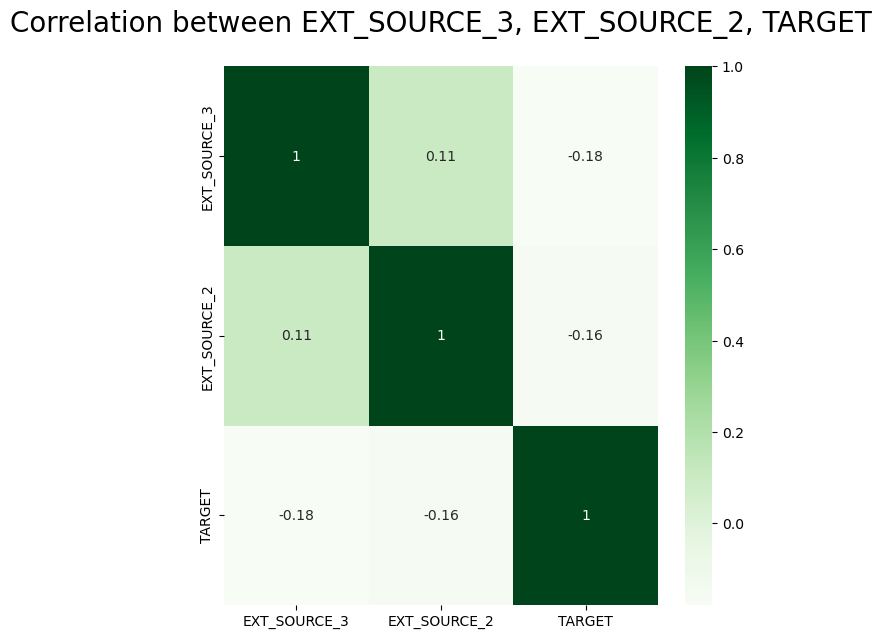

In [22]:
# Removing the unneccasary colums from the data set

irrelevant = ["EXT_SOURCE_3","EXT_SOURCE_2"]

plt.figure(figsize=[7,7])
sns.heatmap(bank_df[irrelevant+["TARGET"]].corr(),cmap="Greens", annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

#### Observation:
    From the above heat map it is clear that there is no linear correlations between the above colums heading. So, dropping the above colums from the data set.

In [23]:
# The columns "EXT_SOURCE_3" and "EXT_SOURCE_2" are having negative correlation with target, so dropping the following values from the data set

bank_df.drop(irrelevant, axis=1, inplace = True)

In [24]:
bank_df.shape

(307511, 71)

In [25]:
null(bank_df).head(20)

OCCUPATION_TYPE               31.346
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
NAME_TYPE_SUITE                0.420
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
OBS_30_CNT_SOCIAL_CIRCLE       0.332
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
FLAG_DOCUMENT_8                0.000
FLAG_DOCUMENT_2                0.000
FLAG_DOCUMENT_3                0.000
FLAG_DOCUMENT_4                0.000
dtype: float64

In [26]:
# Finding the lenght of the null columns in the data set

len(null(bank_df))

71

In [27]:
print(null(bank_df))

OCCUPATION_TYPE                31.346
AMT_REQ_CREDIT_BUREAU_YEAR     13.502
AMT_REQ_CREDIT_BUREAU_QRT      13.502
AMT_REQ_CREDIT_BUREAU_MON      13.502
AMT_REQ_CREDIT_BUREAU_WEEK     13.502
                                ...  
HOUR_APPR_PROCESS_START         0.000
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_NOT_WORK_REGION      0.000
TARGET                          0.000
LIVE_REGION_NOT_WORK_REGION     0.000
Length: 71, dtype: float64


### Starting to analyse the columns containing FLAGS w.r.t TARGET column

In [28]:
# The following data set have a lot of "Flag" feilds, so we will try to find number of Flag column and try to understand if its relation with the target feild

flag_col = [col for col in bank_df.columns if "FLAG" in col]

flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [29]:
# Creating a dataframe for the flag content
df_flag = bank_df[flag_col+["TARGET"]]

In [30]:
# Replacing the values "0" and "1" with appropiate values as per the dictionary defnition, where the value "1" represents people with previous payment issue and "0" represents proper record of payment or no previous loan records

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

In [31]:
# For the rest of the flag columns, "0" represents No and "1" represents Yes, so replaciung them with "Y" & "N"

for i in df_flag:
    if i != "TARGET":
        df_flag[i ] = df_flag[i].replace({1:"Y", 0:"N"})

In [32]:
df_flag.head(20)

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             N               Y          Y              Y               N   
1             N               N          Y              Y               N   
2             Y               Y          Y              Y               Y   
3             N               Y          Y              Y               N   
4             N               Y          Y              Y               N   
5             N               Y          Y              Y               Y   
6             Y               Y          Y              Y               N   
7             Y               Y          Y              Y               Y   
8             N               Y          Y              N               N   
9             N               Y          Y              Y               N   
10            N               Y          Y              Y               N   
11            N               Y          Y              N               N   
12            N               Y          Y              Y               Y   
13            Y               N          Y              Y               N   
14            N               Y          Y              Y               N   
15            Y               Y          Y              Y               N   
16            N               N          Y              Y               N   
17            N               Y          Y              Y               N   
18            N               Y          Y              Y               N   
19            N               Y          Y              Y               Y   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                 Y          Y          N               N               Y   
1                 Y          Y          N               N               Y   
2                 Y          Y          N               N               N   
3                 Y          N          N               N               Y   
4                 Y          N          N               N               N   
5                 Y          Y          N               N               Y   
6                 Y          Y          N               N               N   
7                 Y          N          N               N               Y   
8                 Y          N          N               N               Y   
9                 Y          N          N               N               N   
10                Y          N          N               N               Y   
11                Y          Y          N               N               N   
12                Y          Y          N               N               Y   
13                Y          N          N               N               Y   
14                Y          N          N               N               Y   
15                Y          N          N               N               N   
16                Y          N          N               N               Y   
17                Y          N          N               N               N   
18                Y          Y          N               N               Y   
19                Y          Y          N               N               Y   

    ... FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
0   ...                N                N                N                N   
1   ...                N                N                N                N   
2   ...                N                N                N                N   
3   ...                N                N                N                N   
4   ...                N                N                N                N   
5   ...                N                N                N                N   
6   ...                N                Y                N                N   
7   ...                N                N                N                N   
8   ...                N                N               

### Plotting graph with the FLAG columns and the TARGET, to check if there is a correlation between the elements

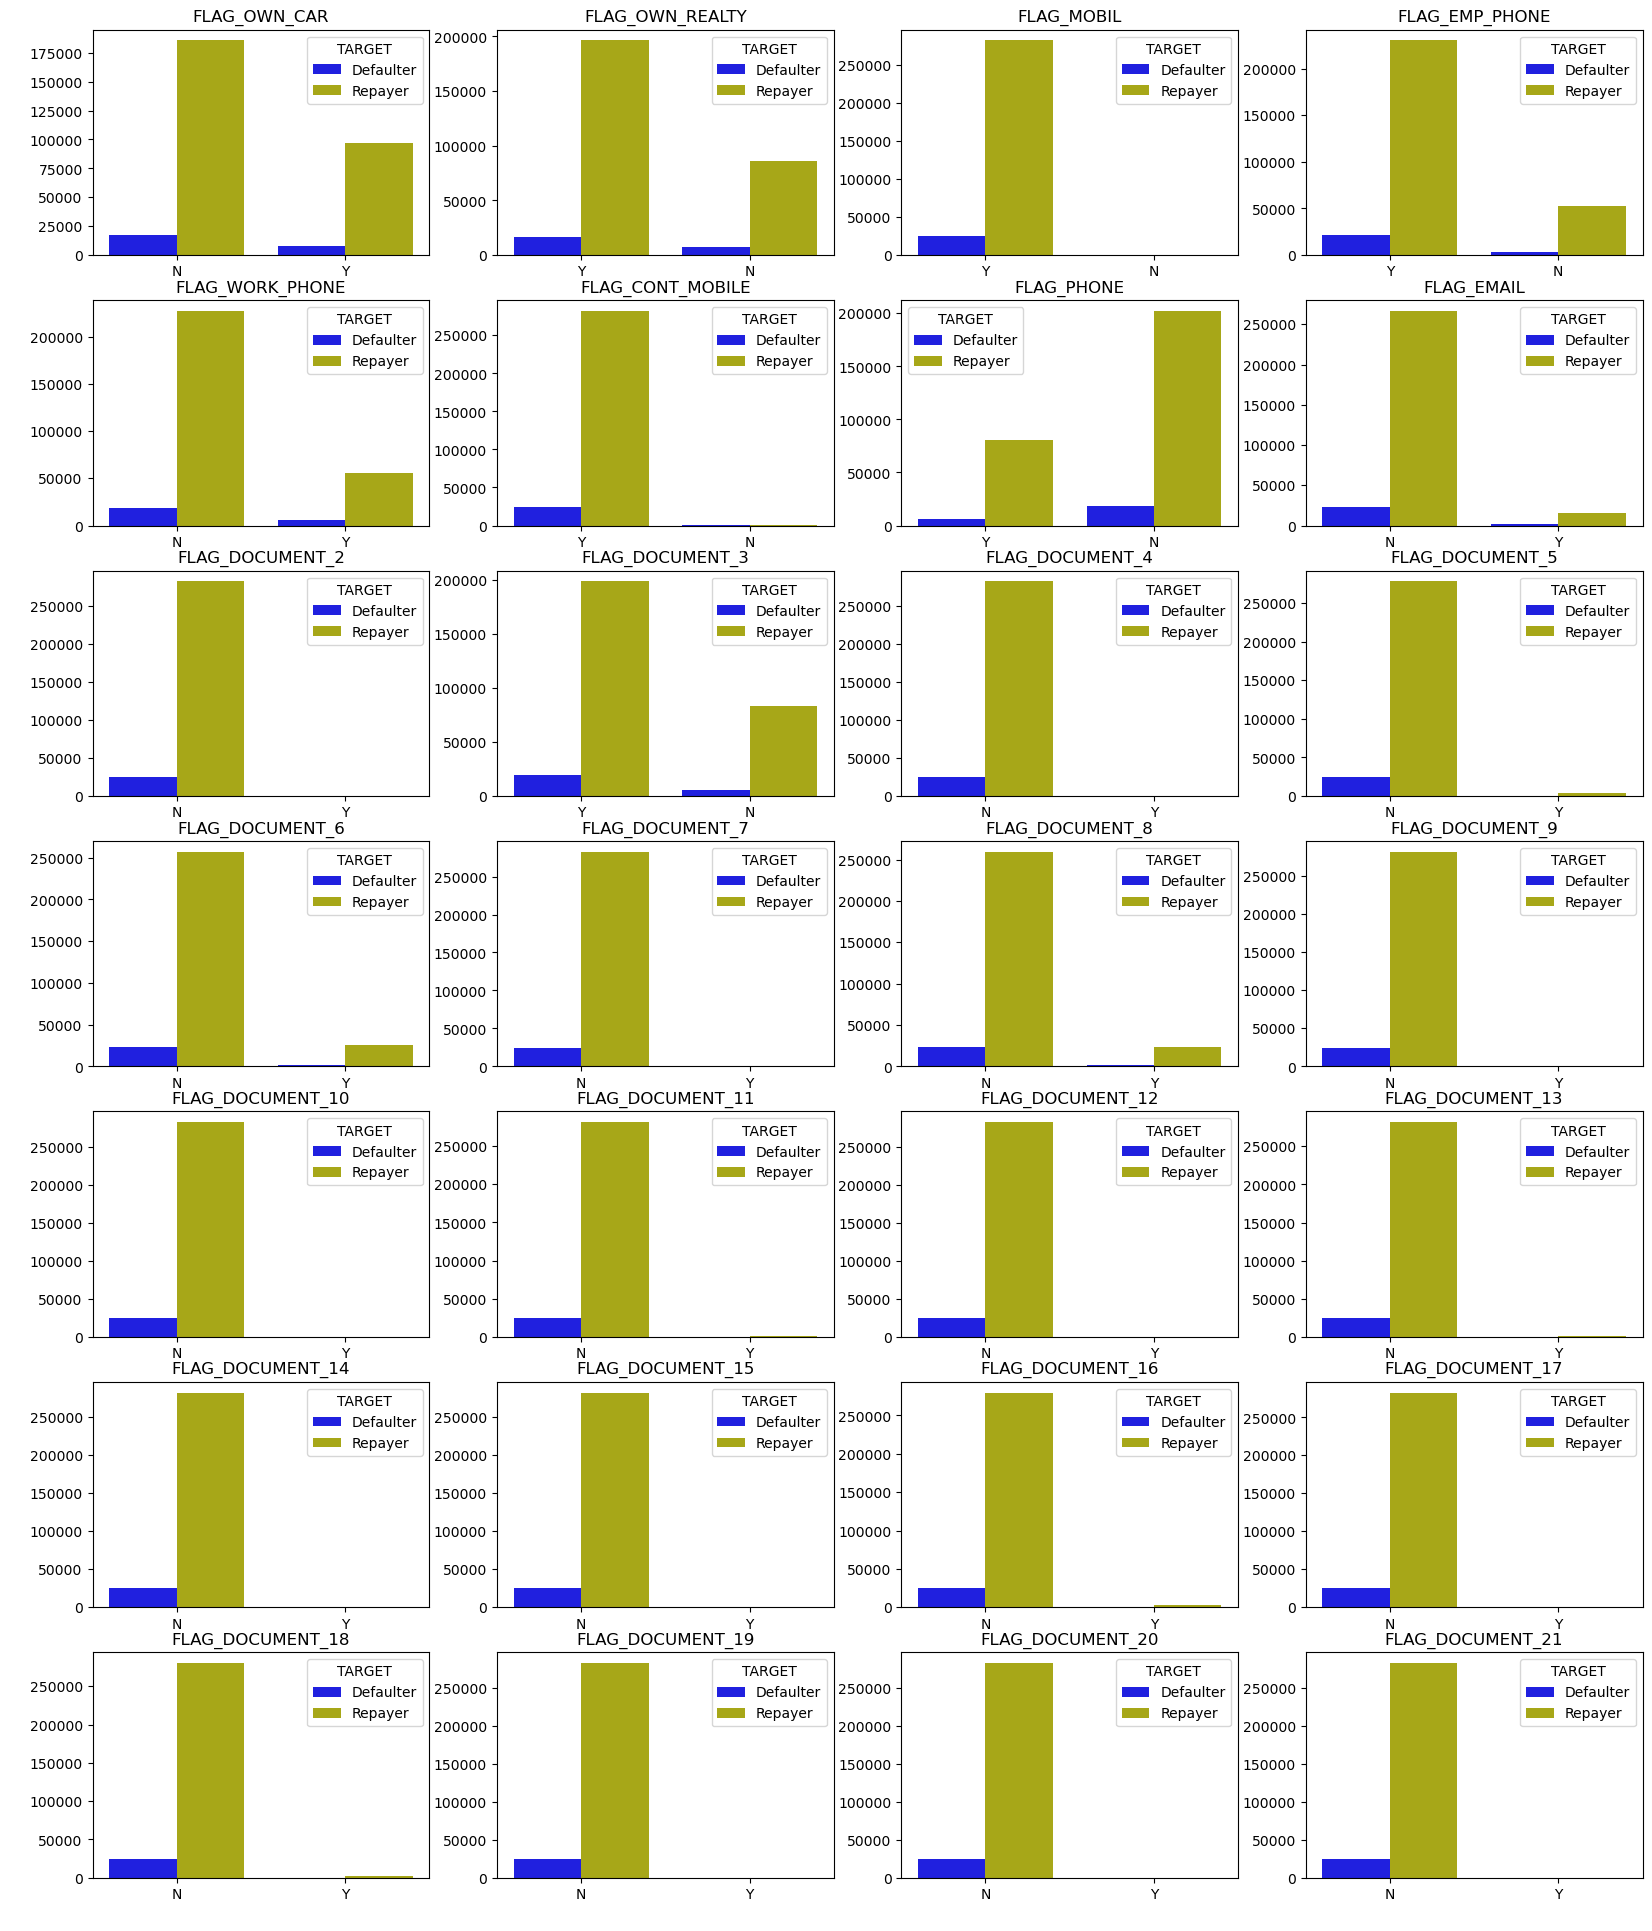

In [33]:
plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_col, range(len(flag_col))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(df_flag[i], hue = df_flag["TARGET"], palette = ["b","y"])
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.title(i)

#### Oservation from above plots:
    1. From the above plots it can be seen that the following plots FLAG_MOBIL, FLAG_OWN_REALTY,  FLAG_CONT_MOBILE, FLAG_EMP_PHONE, FLAG_DOCUMENT_3 shows that there are more repayers than defaulters. So, we can keep the flag values such as this and eliminate the rest from the data set fo our analysis.

In [34]:
#Deciding to retain only the following columns TARGET, FLAG_OWN_REALTY, FLAG_MOBIL, FLAG_DOCUMENT_3. Because from the above plots it can seen that the above columns facilitate the maximun number of repayers

df_flag.drop (["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis = 1, inplace = True)

In [35]:
len (df_flag.columns)

25

In [36]:
df_flag.columns

Index(['FLAG_OWN_CAR', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [37]:
#Dropping the above columns from our data set as the following columns are not relevant to the analysis

bank_df.drop(df_flag.columns, axis=1, inplace=True)

In [38]:
#Find out the number of relevant columns left out in the data set for analysis

bank_df.shape

# We are left with 46 columns for the analysis of the data

(307511, 46)

#### Observation: 
    Finally we are left with 46 columns for our analysis, after cleaning the dataset with unneccesary columns

## Imputing the missing values
    In this step we will input the missing values with the appropriate values so that we can proceed with the further analysis.

In [39]:
null(bank_df).head(20)

OCCUPATION_TYPE               31.346
AMT_REQ_CREDIT_BUREAU_YEAR    13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
NAME_TYPE_SUITE                0.420
OBS_60_CNT_SOCIAL_CIRCLE       0.332
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
HOUR_APPR_PROCESS_START        0.000
ORGANIZATION_TYPE              0.000
LIVE_CITY_NOT_WORK_CITY        0.000
REG_CITY_NOT_WORK_CITY         0.000
dtype: float64

#### Observation: 
    The below 7 columns are missing more than 1 % of data entries. So, imputing values for it to carry on the further data analysis. Please see the below for column details.
    1. AMT_REQ_CREDIT_BUREAU_YEAR
    2. OCCUPATION_TYPE
    3. AMT_REQ_CREDIT_BUREAU_QRT
    4. AMT_REQ_CREDIT_BUREAU_MON
    5. AMT_REQ_CREDIT_BUREAU_WEEK 
    6. AMT_REQ_CREDIT_BUREAU_DAY
    7. AMT_REQ_CREDIT_BUREAU_HOUR

In [40]:
# Imputing the values for the above columns which are missing data more than 1%

bank_df["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

#### Observation: 
    It can be seen from the above analysis that around 32 % of the data is missing values, which further needs fixing of data. So imputing value "Unknown" for it.

In [41]:
# Imputing the missing values with "X"

bank_df["OCCUPATION_TYPE"] = bank_df["OCCUPATION_TYPE"].fillna("X")

In [42]:
#Checking if  missing values are replaced by the above variable

bank_df["OCCUPATION_TYPE"].isnull().sum()

0

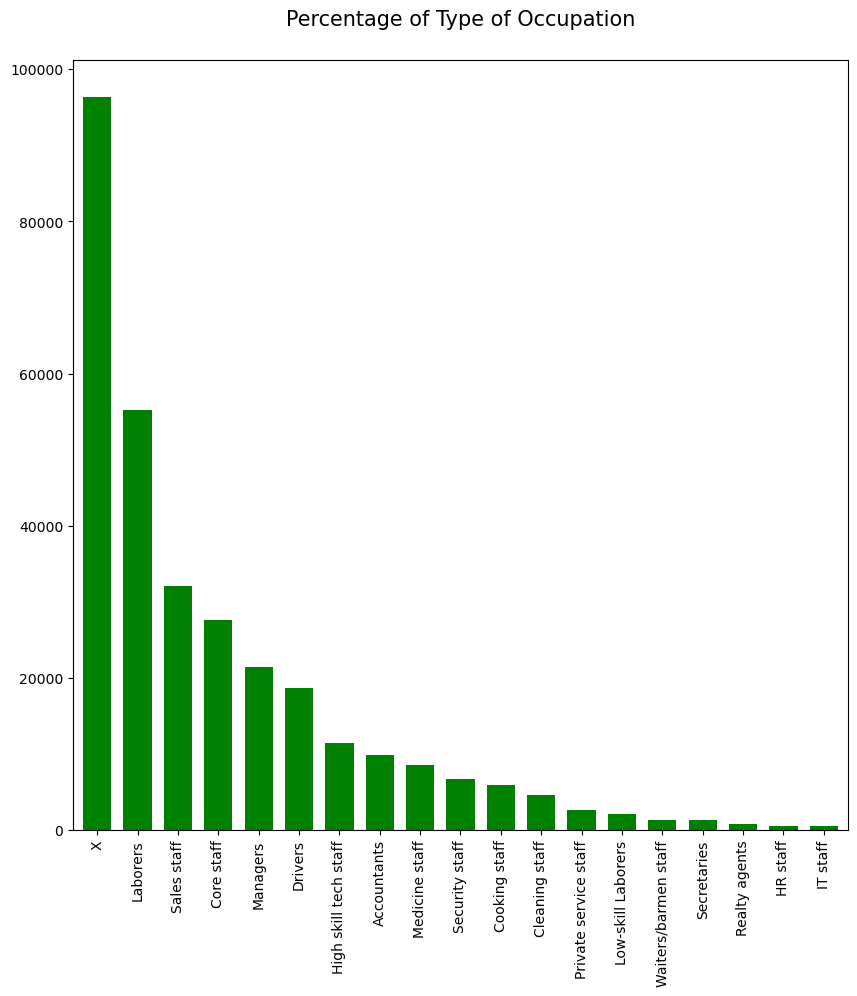

In [43]:
plt.figure(figsize =[10,10])
(bank_df["OCCUPATION_TYPE"].value_counts()).plot.bar(color = "green", width = 0.7)
plt.title("Percentage of Type of Occupation", fontdict={"fontsize":15}, pad=25)
plt.show()

#### Observation: 
    Close to 90000 applicants occupation is unknown or missing and second highest number of loan applicants are belong to laborers category.

In [44]:
# Finding other null value columns and pick the columns necessary for analysis and impute the median values for further analysis

null(bank_df).head(20)

AMT_REQ_CREDIT_BUREAU_YEAR    13.502
AMT_REQ_CREDIT_BUREAU_QRT     13.502
AMT_REQ_CREDIT_BUREAU_MON     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
NAME_TYPE_SUITE                0.420
OBS_30_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_60_CNT_SOCIAL_CIRCLE       0.332
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
WEEKDAY_APPR_PROCESS_START     0.000
FLAG_DOCUMENT_3                0.000
ORGANIZATION_TYPE              0.000
LIVE_CITY_NOT_WORK_CITY        0.000
REG_CITY_NOT_WORK_CITY         0.000
dtype: float64

In [45]:
# Creating a variable for the amount required columns, so we can impute appropiate values

amt_req_credit =["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]
bank_df[amt_req_credit].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [46]:
# Filling the missing values in the above mentioned columns with the median values of those columns

bank_df.fillna(bank_df[amt_req_credit].median(), inplace = True)

In [47]:
# Checking if there are any null values in the "AMT_REQ_CREDIT" related columns

bank_df[amt_req_credit].isnull().sum()

#All the missing values of the above columns are filled with the median value 

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
dtype: int64

In [48]:
null(bank_df).head(20)

NAME_TYPE_SUITE                0.420
DEF_60_CNT_SOCIAL_CIRCLE       0.332
OBS_60_CNT_SOCIAL_CIRCLE       0.332
DEF_30_CNT_SOCIAL_CIRCLE       0.332
OBS_30_CNT_SOCIAL_CIRCLE       0.332
AMT_GOODS_PRICE                0.090
AMT_ANNUITY                    0.004
CNT_FAM_MEMBERS                0.001
DAYS_LAST_PHONE_CHANGE         0.000
ORGANIZATION_TYPE              0.000
REG_REGION_NOT_LIVE_REGION     0.000
REG_REGION_NOT_WORK_REGION     0.000
LIVE_REGION_NOT_WORK_REGION    0.000
REG_CITY_NOT_LIVE_CITY         0.000
REG_CITY_NOT_WORK_CITY         0.000
LIVE_CITY_NOT_WORK_CITY        0.000
SK_ID_CURR                     0.000
WEEKDAY_APPR_PROCESS_START     0.000
FLAG_DOCUMENT_3                0.000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000
dtype: float64

## Standardising the Values

In [49]:
bank_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.405292                  0.100049   
std                    2.379803                  0.362291   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000    307511.000000               307511.000000   
mean              -962.858788         0.710023                    0.005538   
std                826.808487         0.453752                    0.078014   
min              -4292.000000         0.000000                    0.000000   
25%              -1570.000000         0.000000                    0.000000   
50%               -757.000000         1.000000                    0.000000   
75%               -274.000000         1.000000                    0.000000   
max                  0.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%     

##### Taking care of the oher high value columns from above and segregating it under the right type of data

In [50]:
# Working on the columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, as  these are high value numeric columns, we are going to place the values of the above columns in categorical bin columns.

# Creating appropiate bins for income columns in terms of Lakhs

bank_df['AMT_INCOME_TOTAL']=bank_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1 L','1-2 L', '2-3 L','3-4 L','4-5 L','5-6 L','6-7 L','7-8 L','8-9 L','9-10 L','10 L Above']

bank_df['INCOME_RANGE']=pd.cut(bank_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [51]:
round((bank_df["INCOME_RANGE"].value_counts(normalize = True)*100).sort_values(ascending = False),2)

1-2 L         50.73
2-3 L         21.21
0-1 L         20.73
3-4 L          4.78
4-5 L          1.74
5-6 L          0.36
6-7 L          0.28
8-9 L          0.10
7-8 L          0.05
9-10 L         0.01
10 L Above     0.01
Name: INCOME_RANGE, dtype: float64

In [52]:
# Checking the information of the "AMT_INCOME_TOTAL"

bank_df['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
# Creating bins for the credit amount column in terms of Lakhs

bank_df['AMT_CREDIT']= bank_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1 L','1-2 L', '2-3 L','3-4 L','4-5 L','5-6 L','6-7 L','7-8L ','8-9 L','9-10 L','10 L Above']

bank_df['CREDIT_RANGE']=pd.cut(bank_df['AMT_CREDIT'],bins,labels=slots)

In [54]:
round((bank_df["CREDIT_RANGE"].value_counts(normalize = True)*100).sort_values(ascending = False),2)

2-3 L         17.82
10 L Above    16.25
5-6 L         11.13
4-5 L         10.42
1-2 L          9.80
3-4 L          8.56
6-7 L          7.82
8-9 L          7.09
7-8L           6.24
9-10 L         2.90
0-1 L          1.95
Name: CREDIT_RANGE, dtype: float64

In [55]:
# Creating the bins for the price of goods

bank_df['AMT_GOODS_PRICE']= bank_df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

bank_df['GOODS_PRICE_RANGE']=pd.cut(bank_df['AMT_GOODS_PRICE'],bins,labels=slots)

In [56]:
round((bank_df["GOODS_PRICE_RANGE"].value_counts(normalize = True)*100).sort_values(ascending = False),2)

2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: GOODS_PRICE_RANGE, dtype: float64

### Dealing with columns : 
    DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

In [57]:
# Working on the columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE, as  these have negative values, we are going to correct the values of the above columns.

# Creating varibale "column_days" to store all days related values

column_days = [ "DAYS_ID_PUBLISH", "DAYS_REGISTRATION", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_LAST_PHONE_CHANGE"]

bank_df[column_days].describe()

DAYS_ID_PUBLISH  DAYS_REGISTRATION     DAYS_BIRTH  DAYS_EMPLOYED  \
count    307511.000000      307511.000000  307511.000000  307511.000000   
mean      -2994.202373       -4986.120328  -16036.995067   63815.045904   
std        1509.450419        3522.886321    4363.988632  141275.766519   
min       -7197.000000      -24672.000000  -25229.000000  -17912.000000   
25%       -4299.000000       -7479.500000  -19682.000000   -2760.000000   
50%       -3254.000000       -4504.000000  -15750.000000   -1213.000000   
75%       -1720.000000       -2010.000000  -12413.000000    -289.000000   
max           0.000000           0.000000   -7489.000000  365243.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

Days columns are having negative entries

In [58]:
# Correcting the negative day entries using the absolute function, as the negative entries seems to be wrong

bank_df[column_days]= abs(bank_df[column_days])

In [59]:
bank_df[column_days].describe()

DAYS_ID_PUBLISH  DAYS_REGISTRATION     DAYS_BIRTH  DAYS_EMPLOYED  \
count    307511.000000      307511.000000  307511.000000  307511.000000   
mean       2994.202373        4986.120328   16036.995067   67724.742149   
std        1509.450419        3522.886321    4363.988632  139443.751806   
min           0.000000           0.000000    7489.000000       0.000000   
25%        1720.000000        2010.000000   12413.000000     933.000000   
50%        3254.000000        4504.000000   15750.000000    2219.000000   
75%        4299.000000        7479.500000   19682.000000    5707.000000   
max        7197.000000       24672.000000   25229.000000  365243.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [60]:
# Convert DAYS_BIRTH columns and binning in terms of years for better understanding

bank_df["AGE"] = bank_df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

bank_df["AGE_GROUP"] = pd.cut(bank_df["AGE"], bins, labels=slots)

In [61]:
bank_df["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [62]:
# Convert DAYS_EMPLOYED to Years 

bank_df["YEARS_EMPLOYED"] = bank_df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

bank_df["EMPLOYEMENT_YEARS"] = pd.cut(bank_df["YEARS_EMPLOYED"], bins, labels=slots)

In [63]:
bank_df["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

# Identifying Outliers

In [64]:
bank_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000  307499.000000    307233.000000   
mean        5.990260   27108.573909         5.383962   
std         4.024908   14493.737315         3.694465   
min         0.450000    1615.500000         0.405000   
25%         2.700000   16524.000000         2.385000   
50%         5.135310   24903.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  258025.500000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307510.000000    307511.000000               307511.000000   
mean               962.858788         0.710023                    0.005538   
std                826.808487         0.453752                    0.078014   
min                  0.000000         0.000000                    0.000000   
25%                274.000000         0.000000                    0.000000   
50%                757.000000         1.000000                    0.000000   
75%               1570.000000         1.000000                    0.000000   
max               4292.000000         1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEARS_EMPLOYED  
count               307511.000000  307511.000000   307511.000000  
mean                     1.778463      43.936973      185.547239  
std                      1.765523      11.956133      382.037676  
min                      0.000000      20.517808        0.000000  
25%                     

In [65]:
# Select the columns that have highesh difference between maximum value and it 75th percentile value to find the outliers for them

outliers= ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

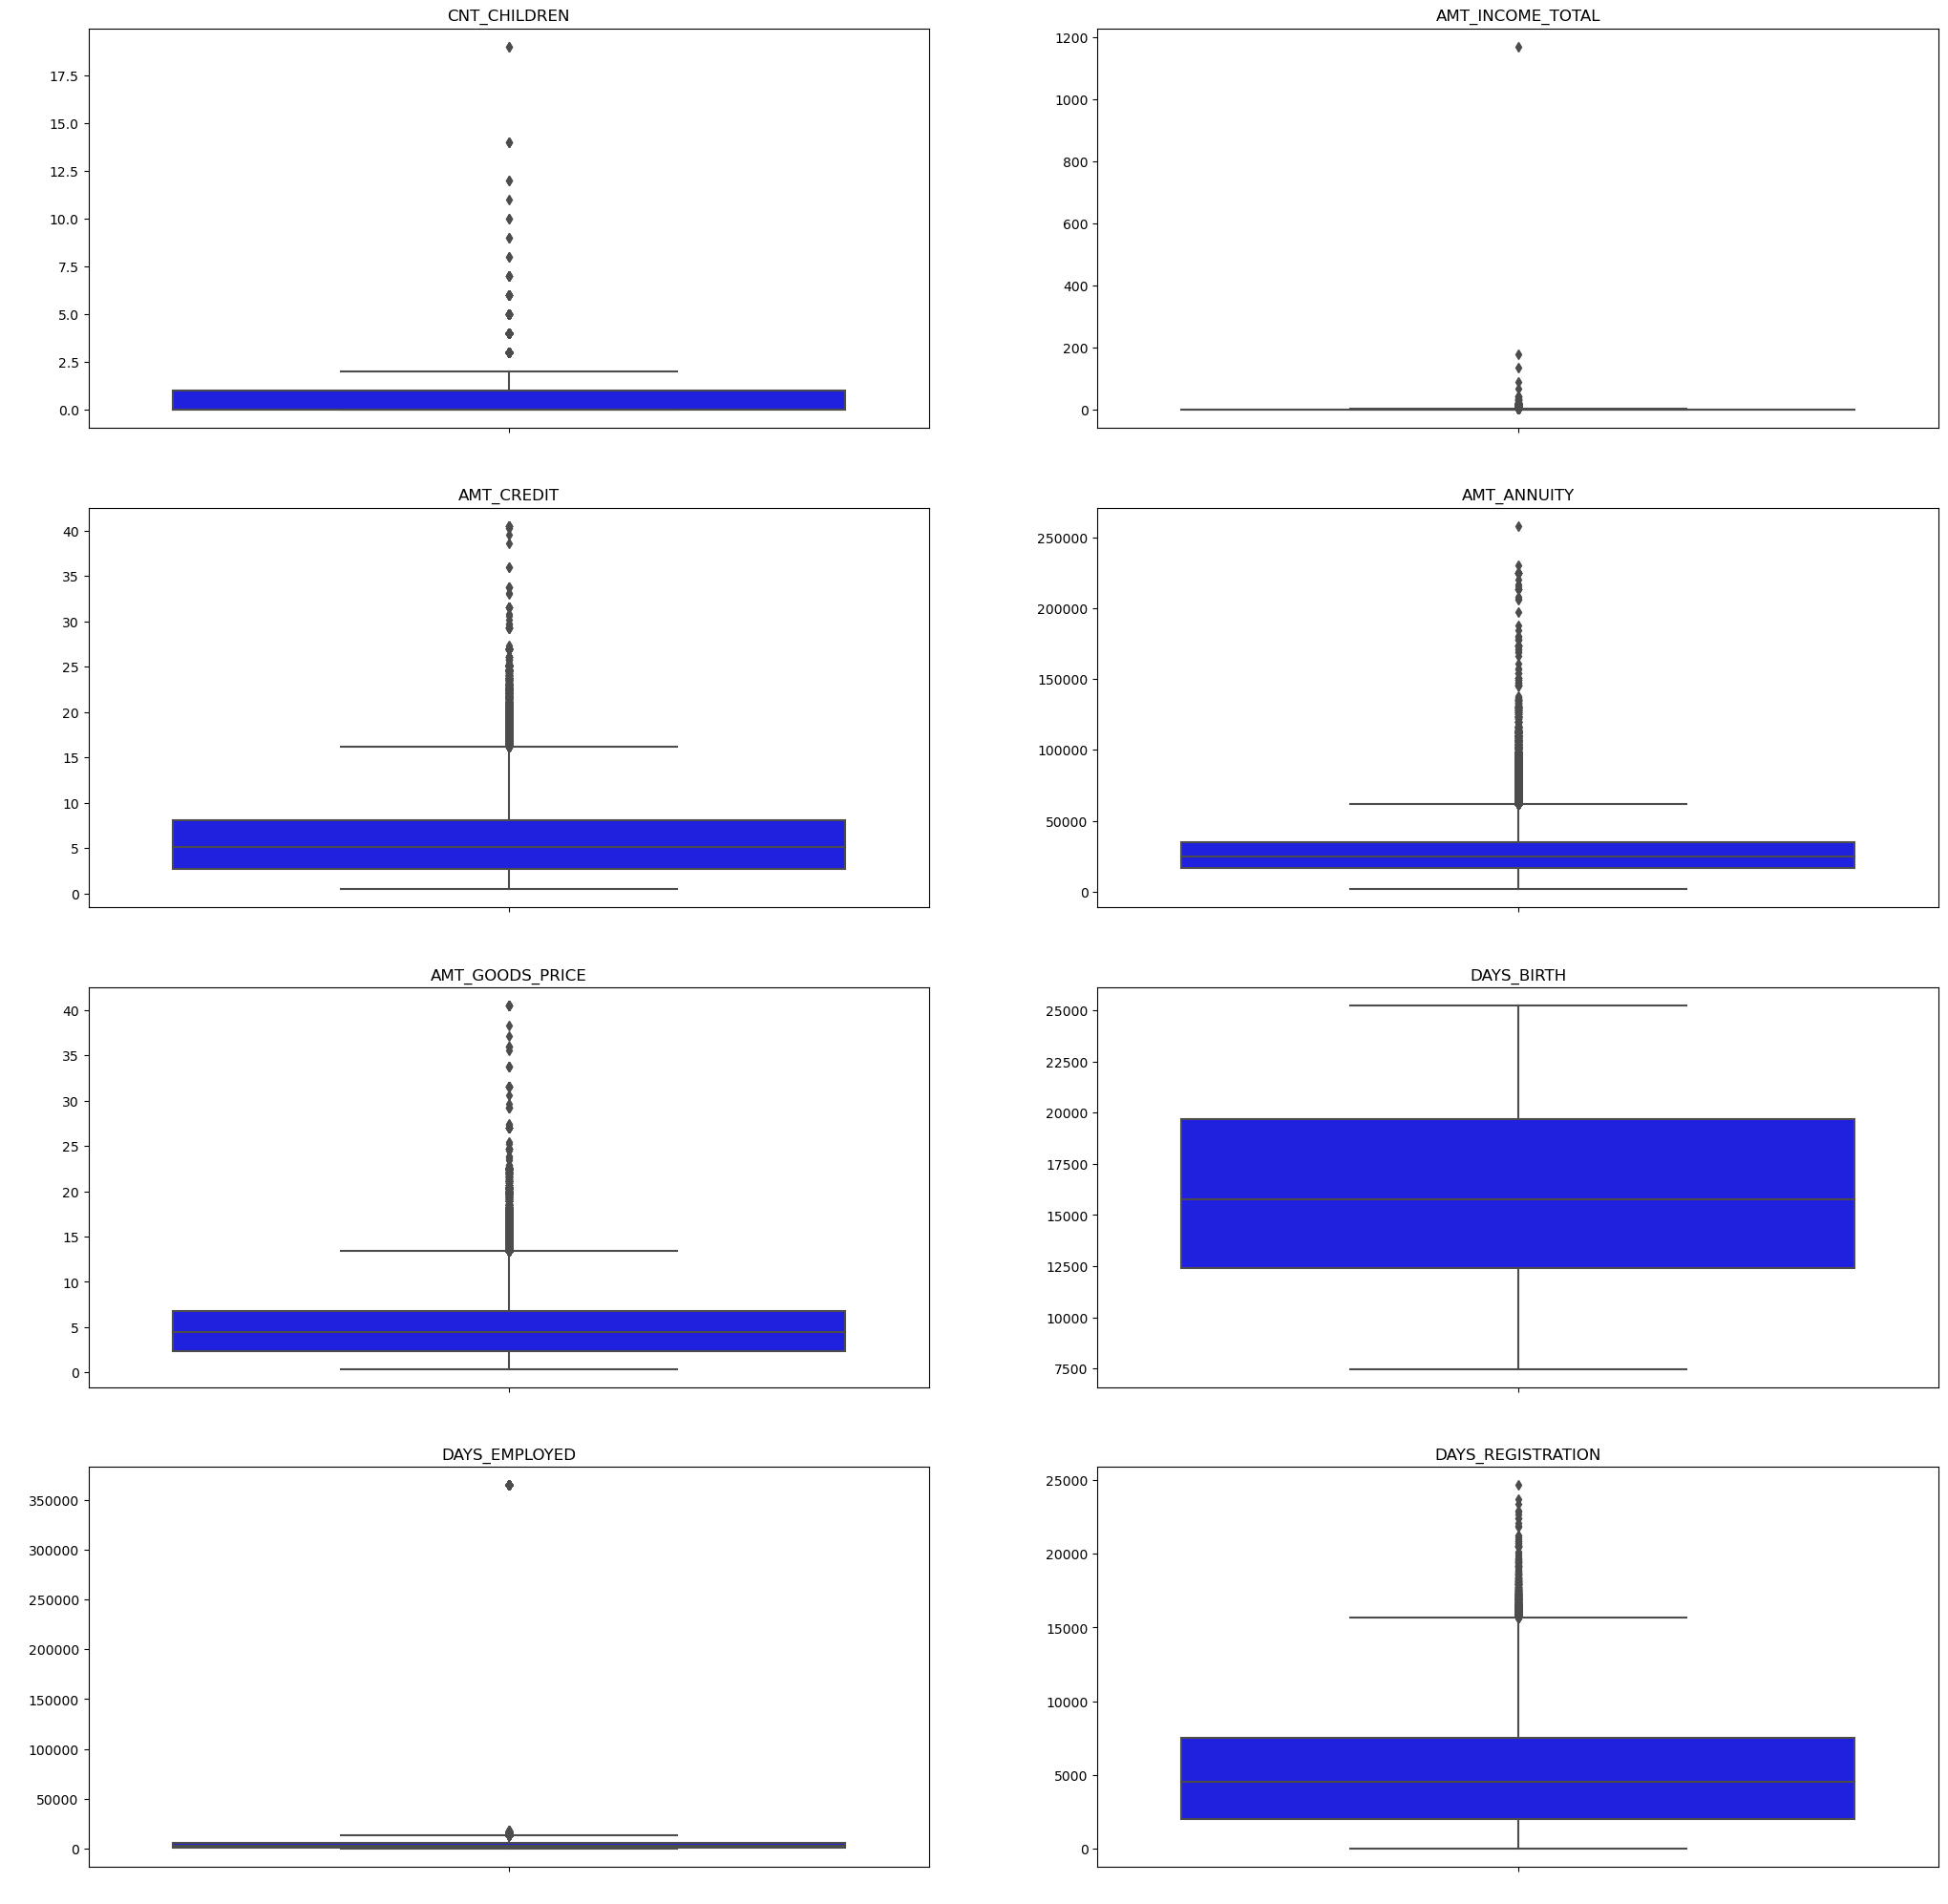

In [66]:
plt.figure(figsize=[25,25])
for i,j in itertools.zip_longest(outliers, range(len(outliers))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = bank_df[i], orient = "h", color = "blue")
    #plt.yticks(fontsize=8)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.title(i)

#### Observations from Above: 

Columns that have few outliers : AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN

Columns with the highest number of Outliers : AMT_INCOME_TOTAL (the graph indicates that a few select people have higher income compared to the rest of the members)

The column, DAYS_EMPLOYED have outlier values at 350000 days, which is a humongous amount of days, which indicates that there is mistake while collecting data or some bogus information was provided.

The column, DAYS_BIRTH doesn't have any outlier indicating that it is most relaible inform among the following values.

In [67]:
bank_df.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_3                     2
REG_REGION_NOT_WORK_REGION          2
FLAG_MOBIL                          2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYEMENT_YEARS                   7
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AGE_GROUP                           9
DEF_30_CNT_S

In [68]:
# Trying to find out the unique values in each columns

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

## Converting selective columns from Object to categorical column

In [69]:
bank_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [70]:
# Converting datatypes of below columns Categorical data

category_col = ['FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'CNT_CHILDREN','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',]

for column in category_col:
    bank_df[column] = pd.Categorical(bank_df[column])

In [71]:
len (category_col)

21

In [72]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

#### Observation from above: 
    After removing all the unnecessary and imputing the missing values, there are a total of 53 columns with which we can proceed for Data Analysis.

# Dataset 2 - "Previous _Application.csv"
        
        Variable name: pre_df

In [73]:
# Importing the previous_application.csv 

pre_df = pd.read_csv("C:\\Users\\sindh\\My_Python_stuff\\ALY6040_Assignment\\previous_application.csv")

In [74]:
pre_df.head(20)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
1      2802425      108129         Cash loans    25188.615         607500.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
3      2819243      176158         Cash loans    47041.335         450000.0   
4      1784265      202054         Cash loans    31924.395         337500.0   
5      1383531      199383         Cash loans    23703.930         315000.0   
6      2315218      175704         Cash loans          NaN              0.0   
7      1656711      296299         Cash loans          NaN              0.0   
8      2367563      342292         Cash loans          NaN              0.0   
9      2579447      334349         Cash loans          NaN              0.0   
10     1715995      447712         Cash loans    11368.620         270000.0   
11     2257824      161140         Cash loans    13832.775         211500.0   
12     2330894      258628         Cash loans    12165.210         148500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   
17     1285768      142748    Revolving loans     9000.000         180000.0   
18     2393109      396305         Cash loans    10181.700         180000.0   
19     1173070      199178         Cash loans     4666.500          45000.0   

    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0               0.0          17145.0                   SATURDAY   
1     679671.0               NaN         607500.0                   THURSDAY   
2     136444.5               NaN         112500.0                    TUESDAY   
3     470790.0               NaN         450000.0                     MONDAY   
4     404055.0               NaN         337500.0                   THURSDAY   
5     340573.5               NaN         315000.0                   SATURDAY   
6          0.0               NaN              NaN                    TUESDAY   
7          0.0               NaN              NaN                     MONDAY   
8          0.0               NaN              NaN                     MONDAY   
9          0.0               NaN              NaN                   SATURDAY   
10    335754.0               NaN         270000.0                     FRIDAY   
11    246397.5               NaN         211500.0                     FRIDAY   
12    174361.5               NaN         148500.0                    TUESDAY   
13     57564.0               0.0          53779.5                     SUNDAY   
14     27252.0               0.0          26550.0                   SATURDAY   
15    119853.0           12649.5         126490.5                    TUESDAY   
16     27297.0            1350.0          26955.0                   SATURDAY   
17    180000.0               NaN         180000.0                     FRIDAY   
18    180000.0               NaN         180000.0                   THURSDAY   
19     49455.0               NaN          45000.0                   SATURDAY   

    HOUR_APPR_PROCESS_START  ...  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                        15  ...          Connectivity         12.0   
1                        11  ...                   XNA         36.0   
2                        11  ...                   XNA         12.0   
3                         7  ...                   XNA         12.0   
4                         9  ...                   XNA         24.0   
5                         8  ...                   XNA         18.0   
6                        11  ...                   XNA          NaN   
7                         7  ...                   XNA          NaN   
8                       

In [75]:
# Checking the data sets rows amd columns

pre_df.shape

(1670214, 37)

In [76]:
# Understanding the type of data in all the columns

pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [77]:
# Checking the datframes for more specific information

pre_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

#### Observation from above: 
    Some columns above have negative values which should be corrected, the columns AMT_DOWN_PAYMENT, DAYS_FIRST_DRAWING, etc. which needs fixing.

In [78]:
# Checking for the null values using the function that we hav defined in the start of the analysis.

null(pre_df)

RATE_INTEREST_PRIVILEGED       99.644
RATE_INTEREST_PRIMARY          99.644
AMT_DOWN_PAYMENT               53.636
RATE_DOWN_PAYMENT              53.636
NAME_TYPE_SUITE                49.120
NFLAG_INSURED_ON_APPROVAL      40.298
DAYS_TERMINATION               40.298
DAYS_LAST_DUE                  40.298
DAYS_LAST_DUE_1ST_VERSION      40.298
DAYS_FIRST_DUE                 40.298
DAYS_FIRST_DRAWING             40.298
AMT_GOODS_PRICE                23.082
AMT_ANNUITY                    22.287
CNT_PAYMENT                    22.286
PRODUCT_COMBINATION             0.021
AMT_CREDIT                      0.000
NAME_YIELD_GROUP                0.000
NAME_PORTFOLIO                  0.000
NAME_SELLER_INDUSTRY            0.000
SELLERPLACE_AREA                0.000
CHANNEL_TYPE                    0.000
NAME_PRODUCT_TYPE               0.000
SK_ID_PREV                      0.000
NAME_GOODS_CATEGORY             0.000
NAME_CLIENT_TYPE                0.000
CODE_REJECT_REASON              0.000
SK_ID_CURR  

### Finding cells missing more than 50% of the data

In [79]:
#Creating a variable for storing all column missing more than 50 % data.

pre_null_grt50 = null(pre_df)[null(pre_df)>50]
pre_null_grt50

RATE_INTEREST_PRIVILEGED    99.644
RATE_INTEREST_PRIMARY       99.644
AMT_DOWN_PAYMENT            53.636
RATE_DOWN_PAYMENT           53.636
dtype: float64

In [80]:
#drop the columns that have data missing more than 50 % 

pre_df.drop(columns = pre_null_grt50.index, inplace = True)

In [81]:
# Confirming if the above columns are dropped from the dataset
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [82]:
#Creating a variable for storing all column missing more than 20 % data.

pre_null_grt20 = null(pre_df)[null(pre_df)>20]
pre_null_grt20

NAME_TYPE_SUITE              49.120
DAYS_FIRST_DRAWING           40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
NFLAG_INSURED_ON_APPROVAL    40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
dtype: float64

In [83]:
pre_df[pre_null_grt20.index]

NAME_TYPE_SUITE  DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
0                    NaN            365243.0             -37.0          -42.0   
1          Unaccompanied            365243.0          365243.0       365243.0   
2        Spouse, partner            365243.0          365243.0       365243.0   
3                    NaN            365243.0            -177.0         -182.0   
4                    NaN                 NaN               NaN            NaN   
...                  ...                 ...               ...            ...   
1670209              NaN            365243.0            -351.0         -358.0   
1670210    Unaccompanied            365243.0           -1297.0        -1304.0   
1670211  Spouse, partner            365243.0           -1181.0        -1187.0   
1670212           Family            365243.0            -817.0         -825.0   
1670213           Family            365243.0            -423.0         -443.0   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
0                            300.0           -42.0                        0.0   
1                            916.0          -134.0                        1.0   
2                             59.0          -271.0                        1.0   
3                           -152.0          -482.0                        1.0   
4                              NaN             NaN                        NaN   
...                            ...             ...                        ...   
1670209                      362.0          -508.0                        0.0   
1670210                    -1274.0         -1604.0                        0.0   
1670211                    -1187.0         -1457.0                        0.0   
1670212                     -825.0         -1155.0                        1.0   
1670213                      247.0         -1163.0                        0.0   

         AMT_GOODS_PRICE  AMT_ANNUITY  CNT_PAYMENT  
0                17145.0     1730.430         12.0  
1               607500.0    25188.615         36.0  
2               112500.0    15060.735         12.0  
3               450000.0    47041.335         12.0  
4               337500.0    31924.395         24.0  
...                  ...          ...          ...  
1670209         267295.5    14704.290         30.0  
1670210          87750.0     6622.020         12.0  
1670211         105237.0    11520.855         10.0  
1670212         180000.0    18821.520         12.0  
1670213         360000.0    16431.300         48.0  

[1670214 rows x 10 columns]

In [84]:
pre_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [85]:
# Storing the non-necessary columns from the data set

unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT']

pre_df.drop(unnecessary_col, axis=1, inplace = True)

pre_df.shape

(1670214, 29)

In [86]:
# Imputing the missing value with "Unknown"

pre_df["NAME_TYPE_SUITE"] = pre_df["NAME_TYPE_SUITE"].fillna("Unknown")

null(pre_df)

NFLAG_INSURED_ON_APPROVAL    40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
DAYS_FIRST_DRAWING           40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
PRODUCT_COMBINATION           0.021
AMT_CREDIT                    0.000
NAME_PRODUCT_TYPE             0.000
NAME_YIELD_GROUP              0.000
NAME_SELLER_INDUSTRY          0.000
SELLERPLACE_AREA              0.000
CHANNEL_TYPE                  0.000
SK_ID_PREV                    0.000
NAME_PORTFOLIO                0.000
SK_ID_CURR                    0.000
NAME_CLIENT_TYPE              0.000
NAME_TYPE_SUITE               0.000
CODE_REJECT_REASON            0.000
NAME_PAYMENT_TYPE             0.000
DAYS_DECISION                 0.000
NAME_CONTRACT_STATUS          0.000
NAME_CASH_LOAN_PURPOSE        0.000
AMT_APPLICATION               0.000
NAME_CONTRACT_TYPE          

#### Observation from above:

     The following columns have missing values which should be takem care before starting the analysis 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE'.

In [87]:
# Analysing the data using describe

pre_df[pre_null_grt20.index].describe()

DAYS_FIRST_DRAWING  DAYS_TERMINATION  DAYS_LAST_DUE  \
count       997149.000000     997149.000000  997149.000000   
mean        342209.855039      81992.343838   76582.403064   
std          88916.115834     153303.516729  149647.415123   
min          -2922.000000      -2874.000000   -2889.000000   
25%         365243.000000      -1270.000000   -1314.000000   
50%         365243.000000       -499.000000    -537.000000   
75%         365243.000000        -44.000000     -74.000000   
max         365243.000000     365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  NFLAG_INSURED_ON_APPROVAL  \
count              997149.000000   997149.000000              997149.000000   
mean                33767.774054    13826.269337                   0.332570   
std                106857.034789    72444.869708                   0.471134   
min                 -2801.000000    -2892.000000                   0.000000   
25%                 -1242.000000    -1628.000000                   0.000000   
50%                  -361.000000     -831.000000                   0.000000   
75%                   129.000000     -411.000000                   1.000000   
max                365243.000000   365243.000000                   1.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

In [88]:
# Creating a variable to convert the negative date entries to positive using variable "pre_days"

pre_day = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']

pre_df[pre_day].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE  \
count   1.670214e+06       997149.000000   997149.000000  997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   76582.403064   
std     7.790997e+02        88916.115834    72444.869708  149647.415123   
min    -2.922000e+03        -2922.000000    -2892.000000   -2889.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   -1314.000000   
50%    -5.810000e+02       365243.000000     -831.000000    -537.000000   
75%    -2.800000e+02       365243.000000     -411.000000     -74.000000   
max    -1.000000e+00       365243.000000   365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_TERMINATION  
count              997149.000000     997149.000000  
mean                33767.774054      81992.343838  
std                106857.034789     153303.516729  
min                 -2801.000000      -2874.000000  
25%                 -1242.000000      -1270.000000  
50%                  -361.000000       -499.000000  
75%                   129.000000        -44.000000  
max                365243.000000     365243.000000

In [89]:
# Converting the negative values under day to positive using the absolute function

pre_df[pre_day] = abs(pre_df[pre_day])

pre_df[pre_day].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE  \
count   1.670214e+06       997149.000000   997149.000000  997149.000000   
mean    8.806797e+02       342340.056543    15949.224065   78152.730207   
std     7.790997e+02        88413.495220    72007.270877  148833.342466   
min     1.000000e+00            2.000000        2.000000       2.000000   
25%     2.800000e+02       365243.000000      475.000000     455.000000   
50%     5.810000e+02       365243.000000      921.000000    1155.000000   
75%     1.300000e+03       365243.000000     1825.000000    2418.000000   
max     2.922000e+03       365243.000000   365243.000000  365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_TERMINATION  
count              997149.000000     997149.000000  
mean                35163.363265      83505.775017  
std                106405.950190     152484.418802  
min                     0.000000          2.000000  
25%                   257.000000        447.000000  
50%                   741.000000       1171.000000  
75%                  1735.000000       2501.000000  
max                365243.000000     365243.000000

In [90]:
# Grouping the days

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
pre_df['YEARLY_DECISION'] = pd.cut(pre_df['DAYS_DECISION'],bins,labels=slots)

In [91]:
pre_df['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

#### Observation:
     From above, it is clearly seen that 34% of the applicants have applied for a new loan within a years time.

In [92]:
pre_df.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [93]:
# Finding if there is any null value in the column

null (pre_df)

NFLAG_INSURED_ON_APPROVAL    40.298
DAYS_TERMINATION             40.298
DAYS_LAST_DUE                40.298
DAYS_LAST_DUE_1ST_VERSION    40.298
DAYS_FIRST_DUE               40.298
DAYS_FIRST_DRAWING           40.298
AMT_GOODS_PRICE              23.082
AMT_ANNUITY                  22.287
CNT_PAYMENT                  22.286
PRODUCT_COMBINATION           0.021
AMT_CREDIT                    0.000
SK_ID_PREV                    0.000
CHANNEL_TYPE                  0.000
NAME_YIELD_GROUP              0.000
NAME_SELLER_INDUSTRY          0.000
SELLERPLACE_AREA              0.000
NAME_PORTFOLIO                0.000
NAME_PRODUCT_TYPE             0.000
SK_ID_CURR                    0.000
NAME_GOODS_CATEGORY           0.000
NAME_CLIENT_TYPE              0.000
NAME_TYPE_SUITE               0.000
CODE_REJECT_REASON            0.000
NAME_PAYMENT_TYPE             0.000
DAYS_DECISION                 0.000
NAME_CONTRACT_STATUS          0.000
NAME_CASH_LOAN_PURPOSE        0.000
AMT_APPLICATION             

### Starting to work on continuos variable and plotting to see the curve and impute the values accordingly
            Imputing value for the above are :
            1. If the distribution is positively skewed it is advised to impute Median values 
            2. Mode to be imputed, if the districution pattern is preserved
            3. In case of negatively skewed distribution, it is advised to imput the mean values instead of missing values
 
 Continuos variables are "AMT_ANNUITY", "AMT_GOODS_PRICE"

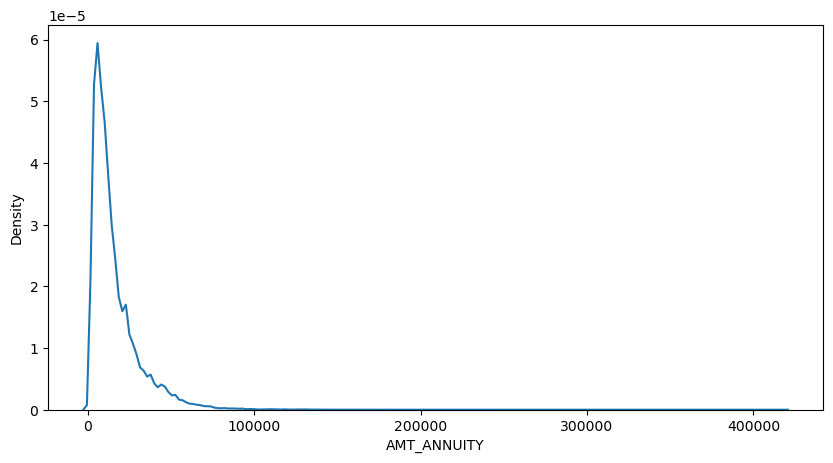

In [94]:
# Plotting distribution plot for the column "AMT_ANNUITY"

plt.figure(figsize=(10,5))
sns.kdeplot(pre_df['AMT_ANNUITY'])
plt.show()

#### Observation:
     As the above plot is positively skewed, imputing median is advised as the median value gives the a more convincing substitution value

In [95]:
pre_df['AMT_ANNUITY'].head(20)

0      1730.430
1     25188.615
2     15060.735
3     47041.335
4     31924.395
5     23703.930
6           NaN
7           NaN
8           NaN
9           NaN
10    11368.620
11    13832.775
12    12165.210
13     7654.860
14     9644.220
15    21307.455
16     4187.340
17     9000.000
18    10181.700
19     4666.500
Name: AMT_ANNUITY, dtype: float64

In [96]:
pre_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [97]:
pre_df['AMT_ANNUITY'].fillna(pre_df['AMT_ANNUITY'].median(), inplace = True)

In [98]:
pre_df["AMT_ANNUITY"].head(20)

0      1730.430
1     25188.615
2     15060.735
3     47041.335
4     31924.395
5     23703.930
6     11250.000
7     11250.000
8     11250.000
9     11250.000
10    11368.620
11    13832.775
12    12165.210
13     7654.860
14     9644.220
15    21307.455
16     4187.340
17     9000.000
18    10181.700
19     4666.500
Name: AMT_ANNUITY, dtype: float64

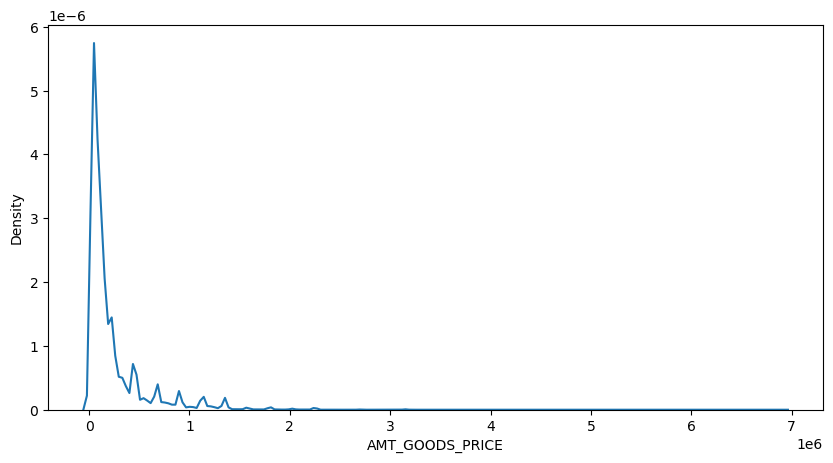

In [99]:
# Plotting distribution plot for the column "AMT_GOODS_PRICE"

plt.figure(figsize=(10,5))
sns.kdeplot(pre_df['AMT_GOODS_PRICE'])
plt.show()

#### Observation:
    The above plot shows that the following variable have a number of peaks in its distribution. So, not sure what values to impute for better understanding we are imputing the mean, median and mode values and ploting the distribution again with those values and deciding on the imputing based on the plots

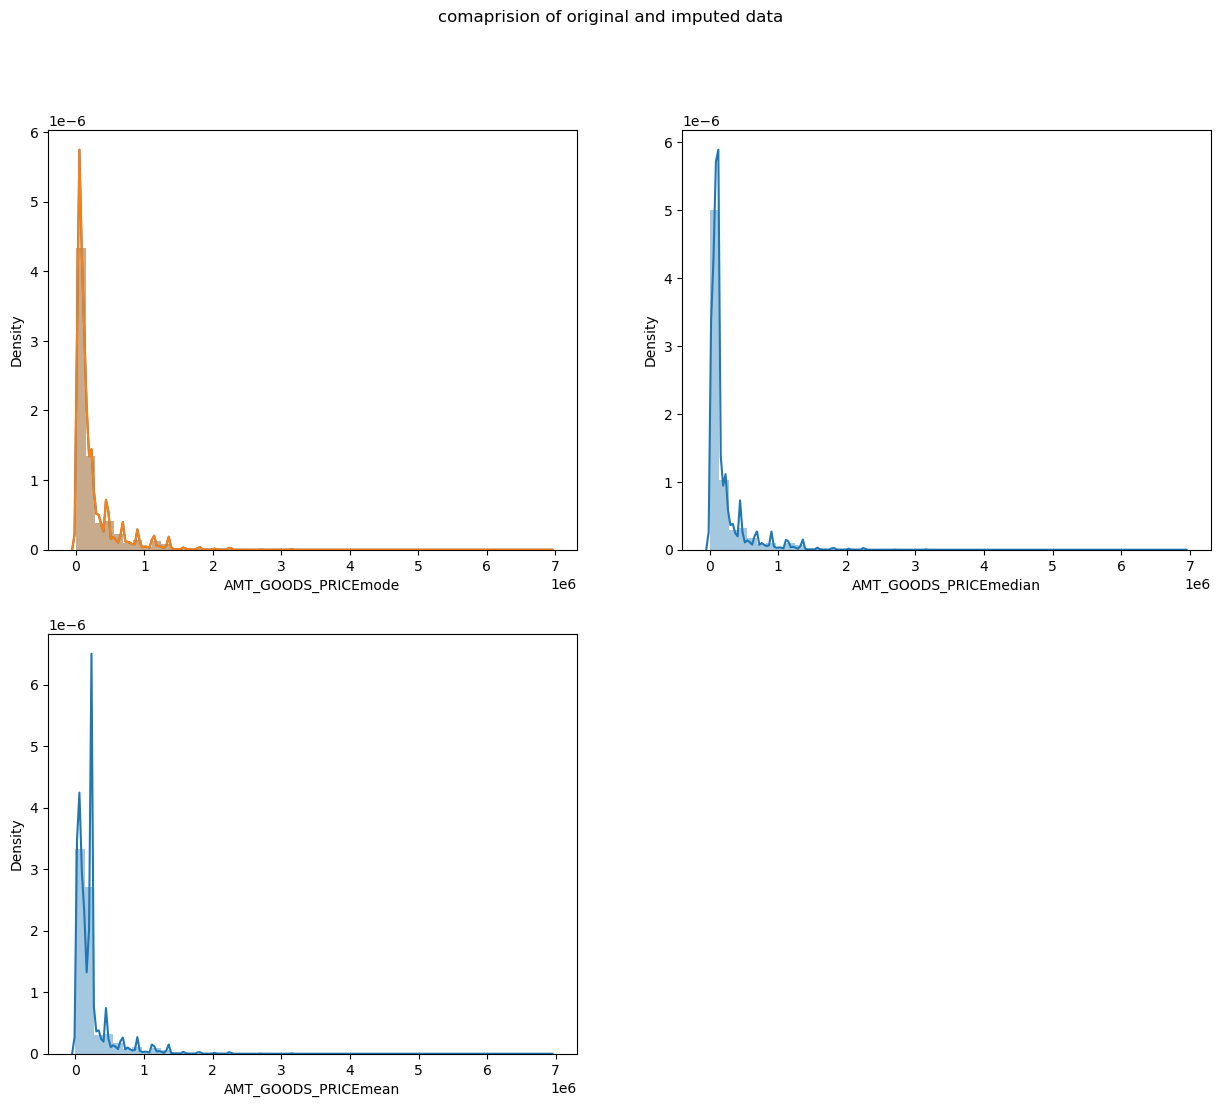

In [100]:
# plotting to find the best substitute value for the above distribution 

statframe = pd.DataFrame() 
statframe['AMT_GOODS_PRICEmode'] = pre_df['AMT_GOODS_PRICE'].fillna(pre_df['AMT_GOODS_PRICE'].mode())
statframe['AMT_GOODS_PRICEmedian'] = pre_df['AMT_GOODS_PRICE'].fillna(pre_df['AMT_GOODS_PRICE'].median())
statframe['AMT_GOODS_PRICEmean'] = pre_df['AMT_GOODS_PRICE'].fillna(pre_df['AMT_GOODS_PRICE'].mean())

column = ['AMT_GOODS_PRICEmode', 'AMT_GOODS_PRICEmedian','AMT_GOODS_PRICEmean']

plt.figure(figsize=(15,12))
plt.suptitle('comaprision of original and imputed data')
plt.subplot(221)
sns.distplot(pre_df['AMT_GOODS_PRICE'][pd.notnull(pre_df['AMT_GOODS_PRICE'])]);
for i in enumerate(column): 
    plt.subplot(2,2,i[0]+1)
    sns.distplot(statframe[i[1]])

#### Observation:
    This plot, positively skewed, imputing mode is advised as the graph of the mode is very close the actual distribution and make a more convincing substitution value

In [101]:
# Imputing the null content with mode values

pre_df['AMT_GOODS_PRICE'].fillna(pre_df['AMT_GOODS_PRICE'].mode(), inplace=True)

### Finding the null values in the column "CNT_PAYMENT" and imputing thr mull values with '0'

In [102]:
pre_df.loc[pre_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

#### Obsevation: 
    NAME_CONTRACT_STATUS include loans that are not started under its column information, for a proper analysis the following values must be removed from the column data so using the imputed column values to find the actual numbers

In [103]:
pre_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

In [104]:
# Converting required columns data type to the necessary type (i.e., Object to Categorical)

pre_appl_catgorical = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

# Initiating a loop statement to convert the data type
for col in pre_appl_catgorical:
    pre_df[col] =pd.Categorical(pre_df[col])

## Finding outliers in the second dataset

In [105]:
pre_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     3.153966e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     5.084100e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   5.810000e+02      3.000000e+00   
75%    2.164185e+05     2.340000e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342340.056543    15949.224065   
std    1.456729e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    6.000000e+00       365243.000000      475.000000   
50%    1.200000e+01       365243.000000      921.000000   
75%    2.400000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### Observation: 
    Capturing the the name of columns that are showing high difference and values, which doesn't show much relationship with the other values are captured

In [106]:
pre_appl_outliers = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

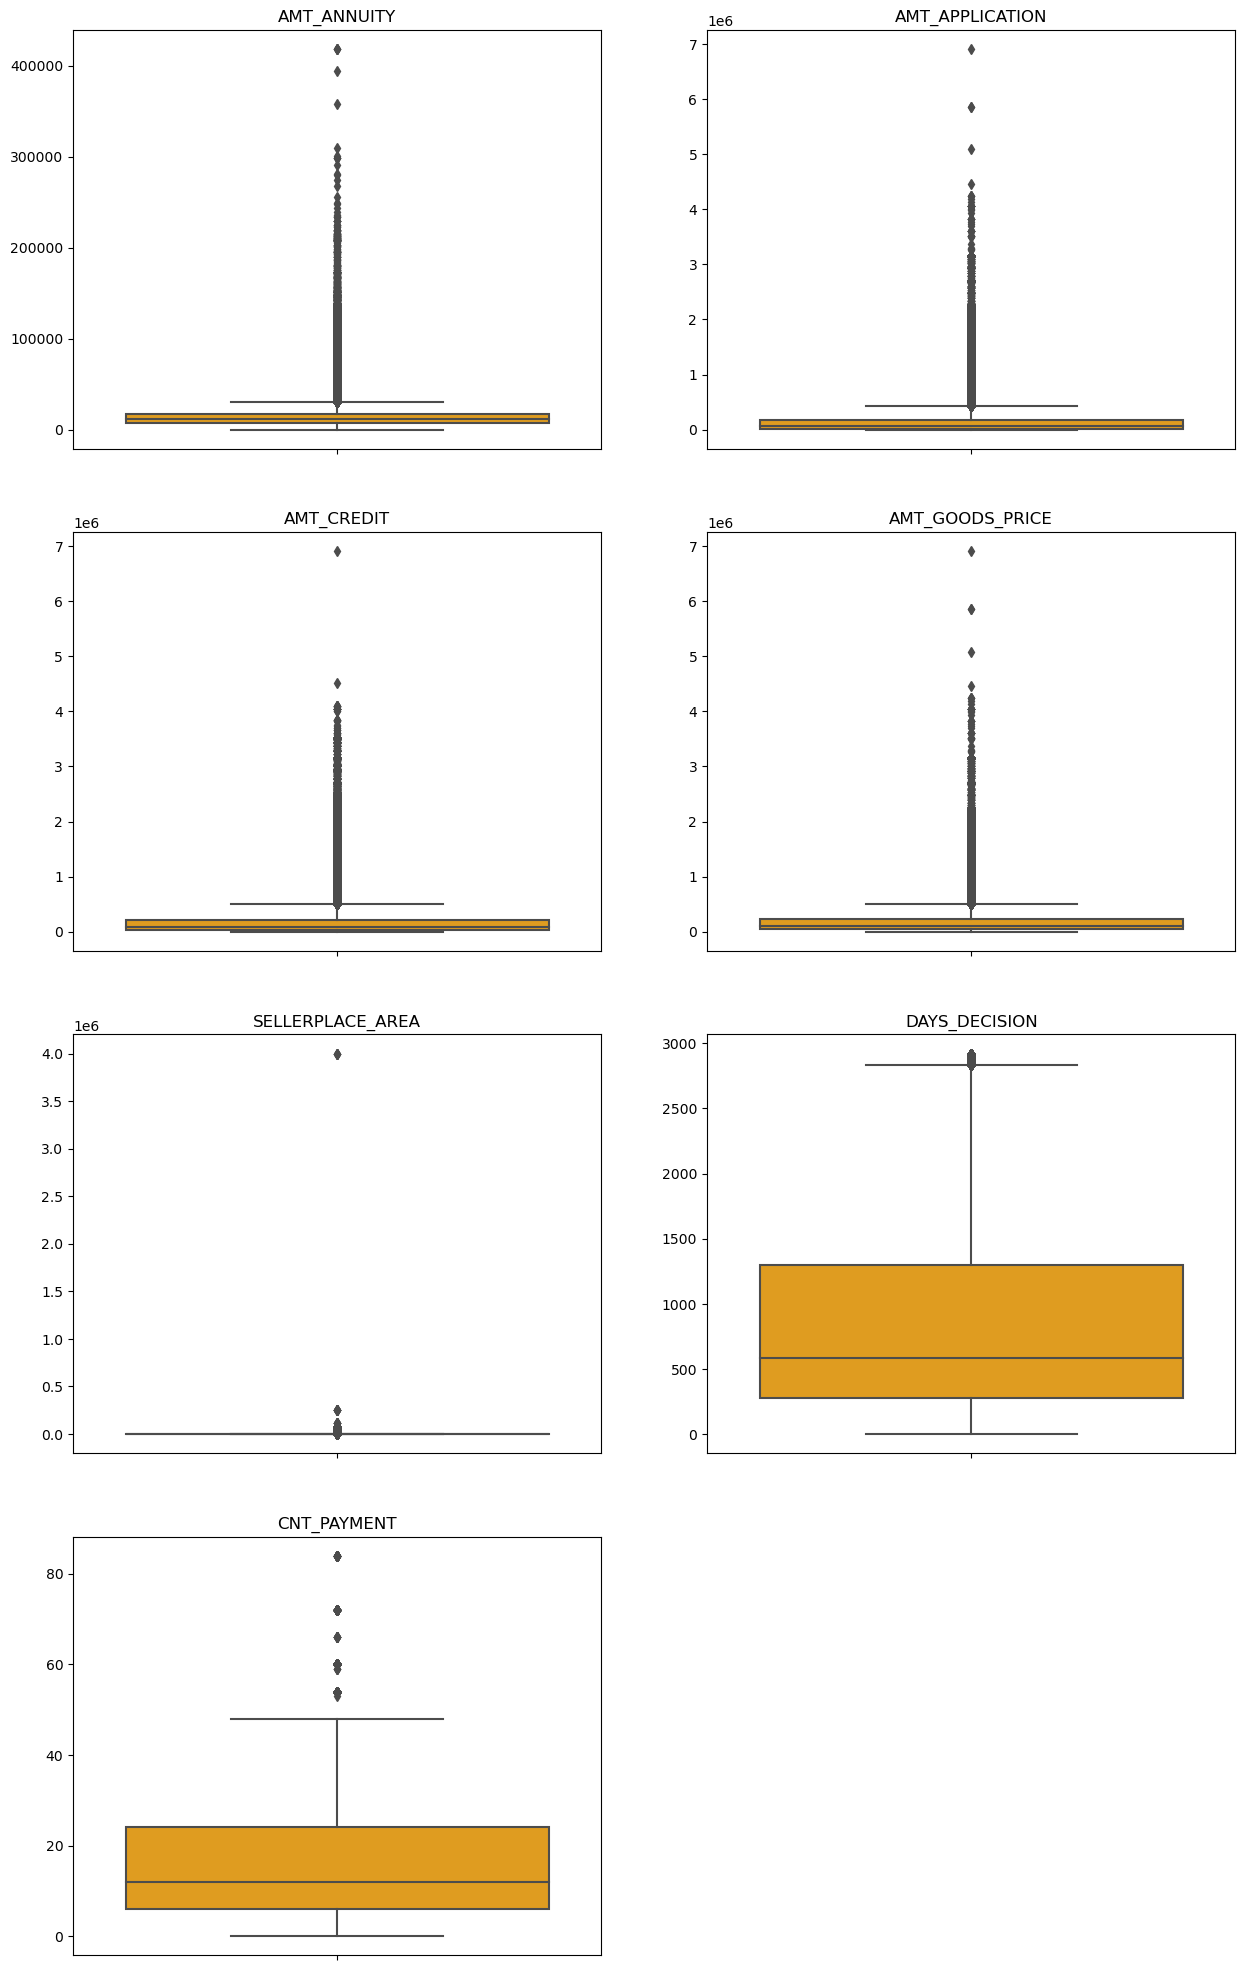

In [107]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest (pre_appl_outliers, range(len(pre_appl_outliers))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = pre_df[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

#### Observations:
    1. The columns  "SELLERPLACE_AREA", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE", "AMT_APPLICATION" exibits the highest number of outliers
    2. The column CNT_Payment has the least number of outliers in the values recoeded
    3.The column DAYS_DECISION has few outlier values, but the entries such as 2900 or 1900 days are really to long duration for an bank to make decision which doesn't make much sense. Must be that the values are recorded wrongly

# Data Analysis Part

### Important Function for Univariate analysis
    Creating a function for plotting Variables to do univariate analysis. This function will create two plots
    1. Plot of the given column in relation to the TARGET column
    2. Finding the percentage of defaulters within each column of the given datasets

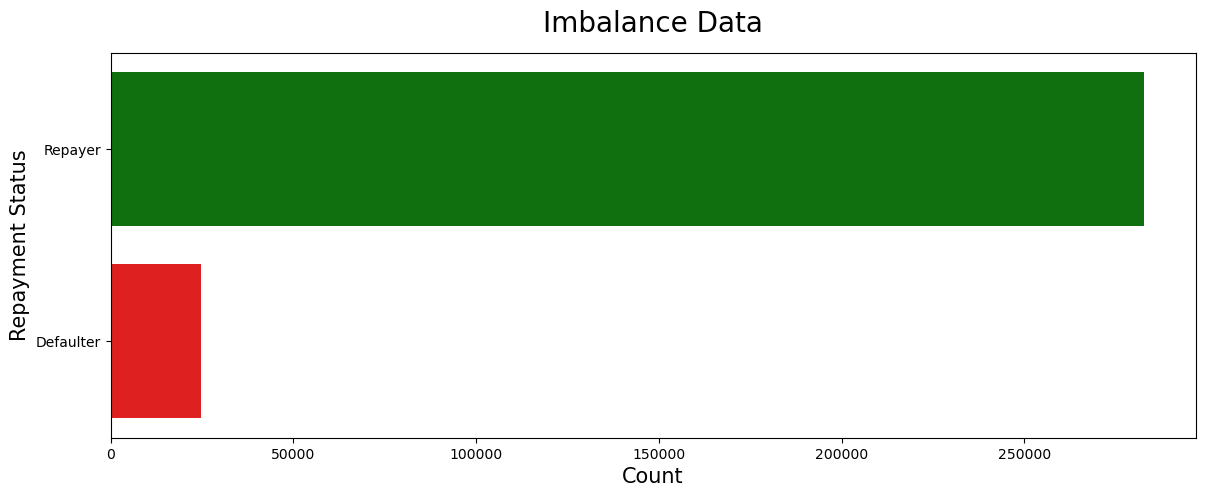

In [108]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = bank_df["TARGET"].value_counts(), palette = ["green","r"],orient="h")
plt.ylabel("Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Data", fontdict = {"fontsize":20}, pad = 15)
plt.show()

In [109]:
# defining function decide on the type of data 

def data_frame(dataset,column):
    if dataset[column].dtype == np.int64 or dataset[column].dtype == np.float64:
        return "numerical"
    if dataset[column].dtype == "category":
        return "categorical"
    
# Creating a function for univariate analysis (Analysis over single variable)

def uni_var(dataset,column,target_column,y_log_axis=False,x_axis=False,horzontal_layout=True):
    if data_frame(dataset,column) == "numerical":
        sns.distplot(dataset[column],hist=False)
        
        
    elif data_frame(dataset,column) == "categorical":
        count = dataset[column].value_counts()
        df = pd.DataFrame({column: count.index,'count': count.values})
        
        
        target_p = dataset[[column, target_column]].groupby([column],as_index=False).mean()
        target_p[target_column] = target_p[target_column]*100
        target_p.sort_values(by=target_column,inplace = True)
        
# If the plot is not readable, use the log scale

        if(horzontal_layout):
            fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (axis1, axis2) = plt.subplots(nrows=2, figsize=(25,35))
        
# 1. Subplot 1:  Ploting column data to give a picture of the repayer and defaulter
        
        s = sns.countplot(ax=axis1, x=column, data=dataset, hue=target_column)
        axis1.set_title(column +" Col Data", fontsize = 15)
        axis1.legend(['Repayer','Defaulter'])
        axis1.set_xlabel(column,fontdict={'fontsize' : 12, 'fontweight' : 4})
        
        if(x_axis):
            s.set_xticklabels(s.get_xticklabels(),rotation=100)
        
# 2. Subplot 2: plotting column wise percentage dat to find the defaulters in each data columns
        
        s = sns.barplot(ax=axis2, x = column, y=target_column, data=target_p)
        axis2.set_title("Percentage of Defaulters in "+col, fontsize = 15)    
        axis2.set_xlabel(column,fontdict={'fontsize' : 12, 'fontweight' : 4})
        axis2.set_ylabel(target_column,fontdict={'fontsize' : 12, 'fontweight' : 4})
        
        if(x_axis):
            s.set_xticklabels(s.get_xticklabels(),rotation=100)
            
                    
        plt.show()

In [110]:
# defining bivariate function for repetitive plotting of numeric data

def bi_var_numerical(x,y,df,hue,kind,labels):
    plt.figure(figsize=[20,20])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=100, ha='left')
    plt.show()

In [111]:
#defining function to plot repetitive countplots for categorical bivariate data

def bi_var_categorical(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Determining aesthetics
    plt.xlabel(x,fontsize = 10)    
    plt.ylabel(y,fontsize = 10)    
    plt.title(col,fontsize = 25) 
    plt.xticks(rotation=100, ha='left')
    plt.legend(labels = labels )
    plt.show()
    

In [112]:
# defining function to plot repetitive countplots for categorical univariate data

def uni_var_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [113]:
# Saving  numercial and categorical data

cat_col = list(bank_df.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(bank_df.select_dtypes(["int","float"]).columns)  #N Numerical Column list

### Categorical Variables Analysis

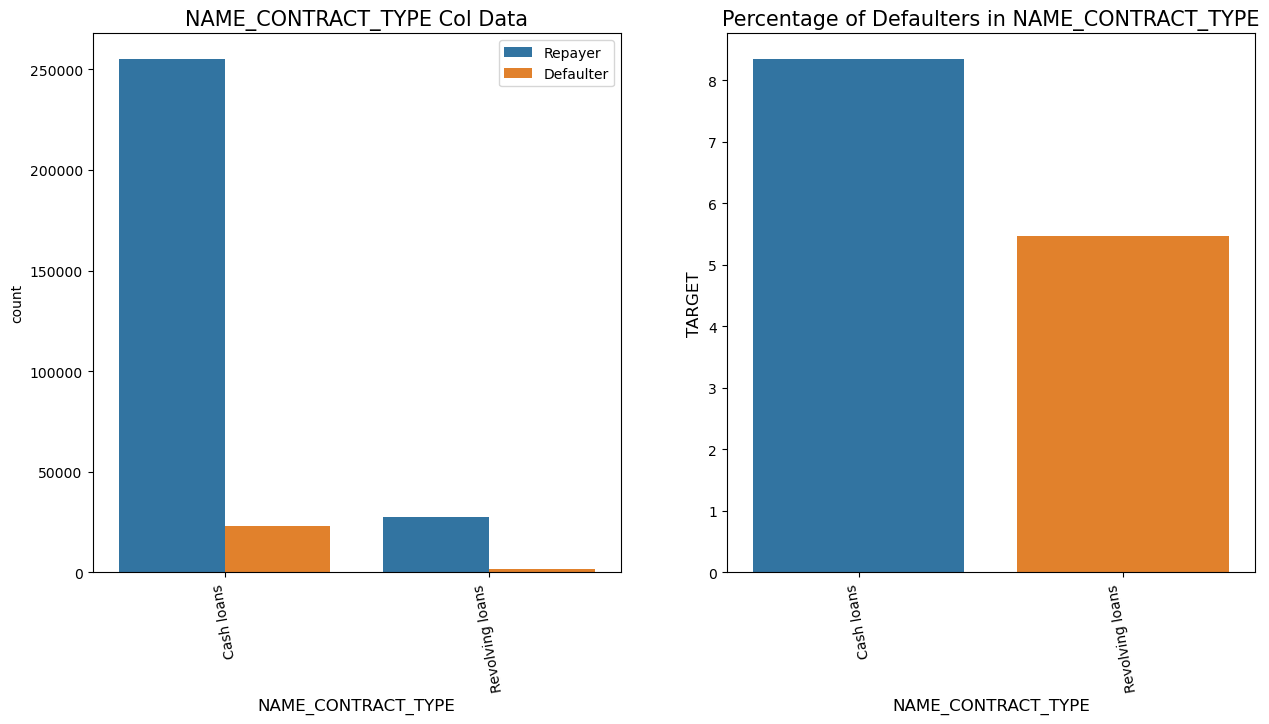

In [114]:
#1 Impact of contract type with the bank on loan replayment
uni_var(bank_df,"NAME_CONTRACT_TYPE","TARGET",False,True,True)

#### Observation on type of loan: 
    1. Around 90% of the loans are cash loans, which indicate that the loan applicant are in the need of liquid cash.
    2. Only 10% of the loans are revolving loans.
    3. Solid 8 % of the cash loan recipients turn out to be defaulters. Where as in the case of revolving loans, 5.5 % of the loan ecipients turn out to be defaulters.
    
    It is clearly seen that most of the cash loan and revolving loan recipients repay their loans. But in terms of sheer numbers the defaulters are more in the case of cash loans.

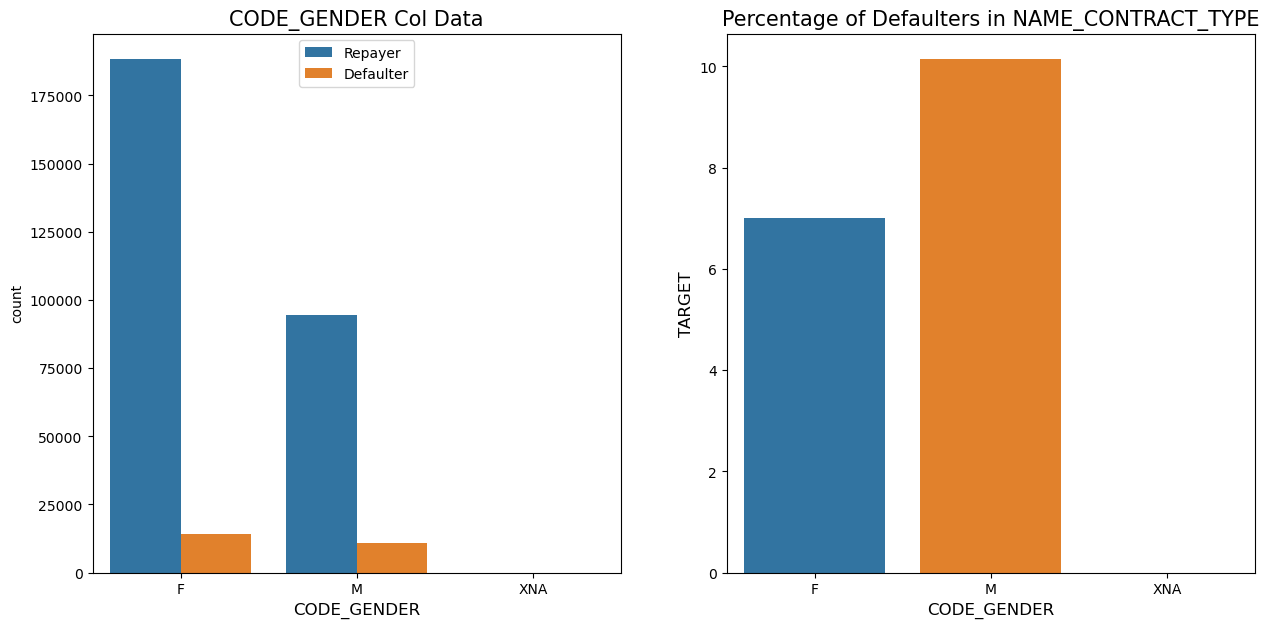

In [115]:
#2 Impact of Gender with loan replayment
uni_var(bank_df,"CODE_GENDER","TARGET",True,False,True)

#### Observation on type of Gender:
    1. From the above plot it is clear that most of the loan applicants are female. 
    2 But, when it comes to the defaulter percentage, it can seen that male clients tend to not return their loans. 10% of the male clients turn out to be defaulters but in case of the female clients, the defaulter percentage is as low as 7%.
    
    This clearly indicates that most the female clients are more trust worthy clients to the bank and this inturn would impact the decisions matrix. Its more likely that female clients would have their loan approvals faster and the overall process would be seemingly smooth.

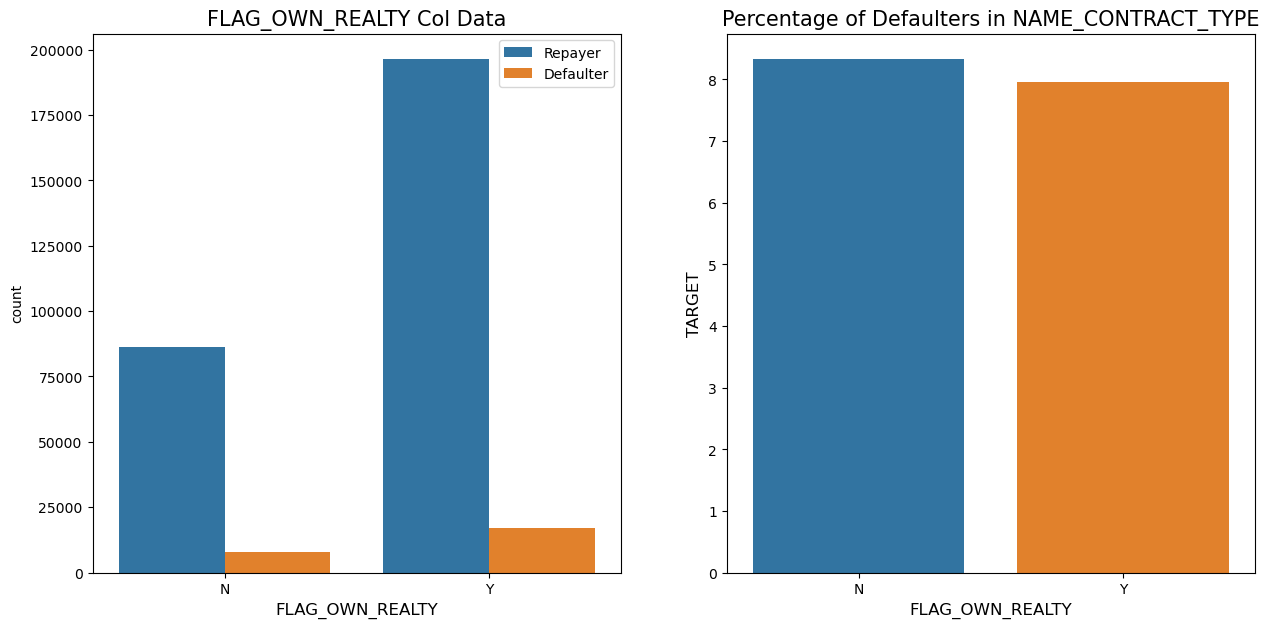

In [116]:
#3 Impact of property holdings on loan replayment
uni_var(bank_df,"FLAG_OWN_REALTY","TARGET",False,False,True)

#### Observation based on applicants real estate status:
    1. From the above plot it is clear that most of the loan applicants have own property of their own. Which is more than double the amount of applicatns without any property.
    2. However, in terms of the defaulter percent, approximately 8% of the applicants in both parties default. But the applicants without property slightly default morethan the other one.

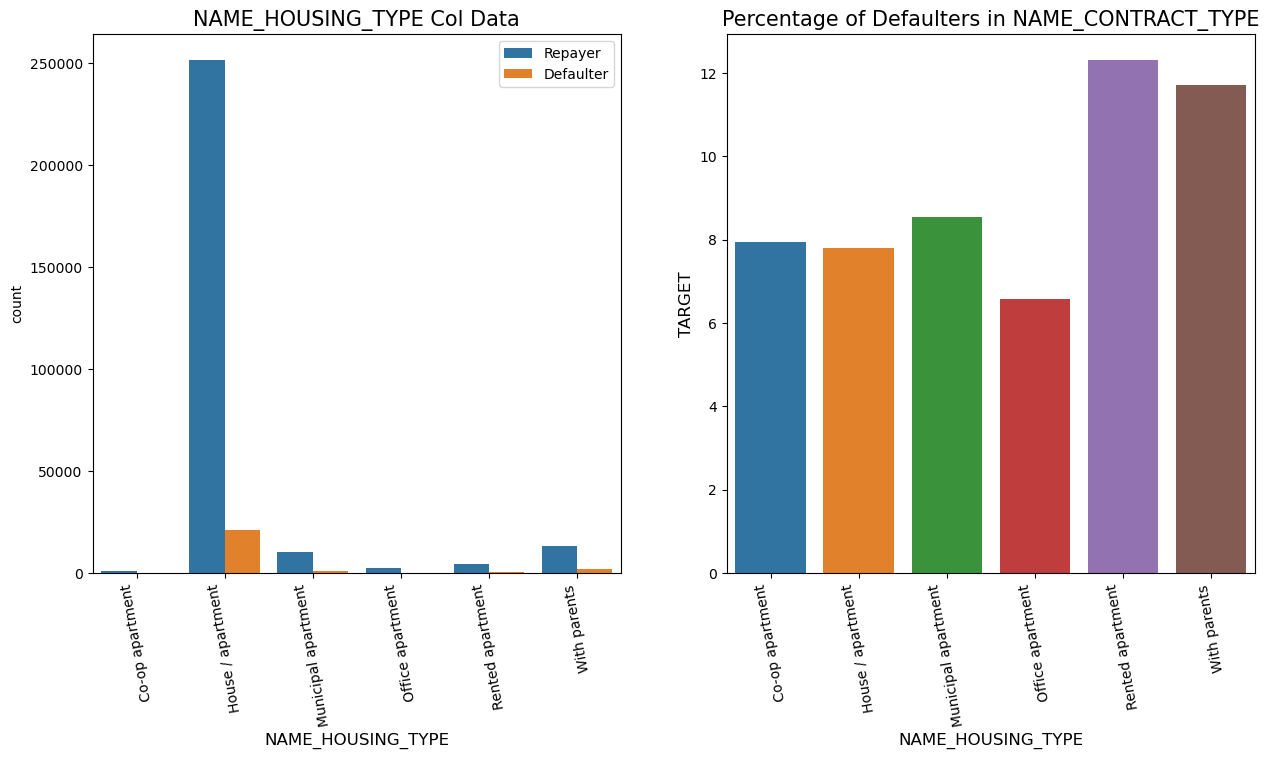

In [117]:
 #4 Impact of housing on loan replayment
uni_var(bank_df,"NAME_HOUSING_TYPE","TARGET",True,True,True)

#### Obersation based on applicants housing
    1. Most of the loan applicants live in independent house or apartment.
    2. People living in co-op apartment don't tend to apply for loans in general.
    3. Coming to the defaulter percentage, people living in office appartments tend to default the least. only 6.5 % of the loan applicants default in their case.
    4. Majority of the defaultsers fall under the rented appartment category (12% applicants) and applicants living with their parents (around 11%).
    5. But in terms of sheer numbers, majority of defaulters fall under the house and apartment category, which can be clearly seen with the help of the plot above.

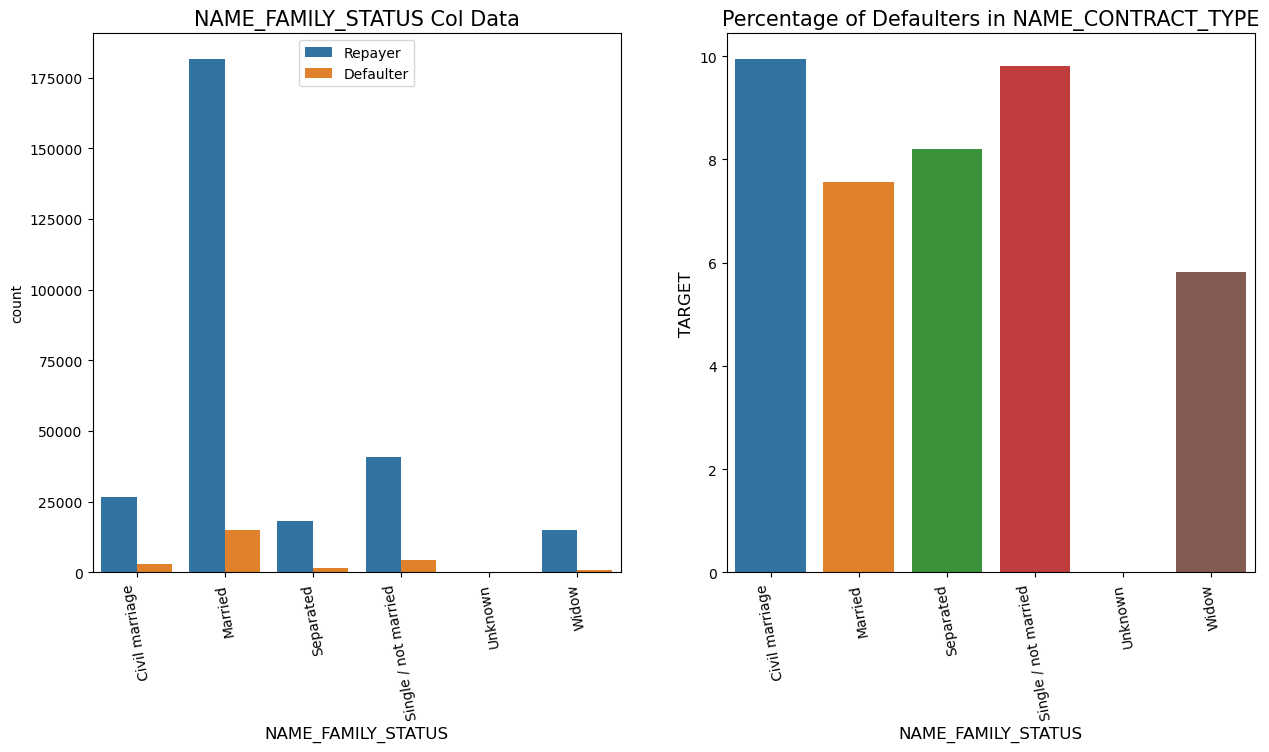

In [118]:
#5 Impact of marital status on loan replayment
uni_var(bank_df,"NAME_FAMILY_STATUS","TARGET",True,True,True)

#### Observation based on marital status:
    1. Majority of the loan applicants are married couples, follwed by single and civil marriage couples.
    2. Most of the civil marriage couple along with single applicants tend to default more, which is around 10%.
    3. However, widow applicants are least defaulters, that is with excluding the unknown category, as the data collected is very less so it can be excluded.

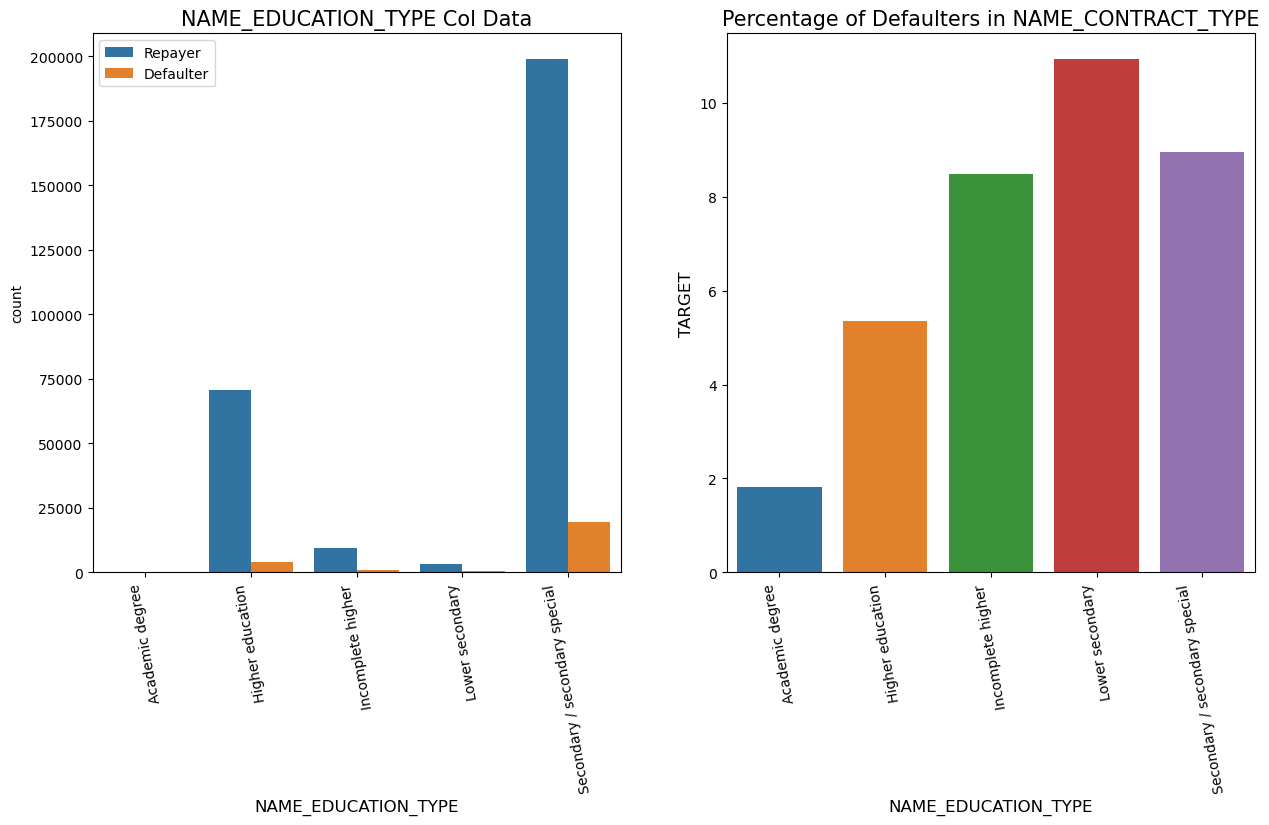

In [119]:
#6 Impact of Educational qualification on loan replayment
uni_var(bank_df,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

#### Observations based on Educational qualification:
    1. People with secondary educational qualification are higher education are the mojar applicants for loan.
    2. But when it comes to defaulter percentage, applicants with lower secondary degree are more likely to default which is around 12%.
    3. Majority of the higher education applicants tend to return the loan.

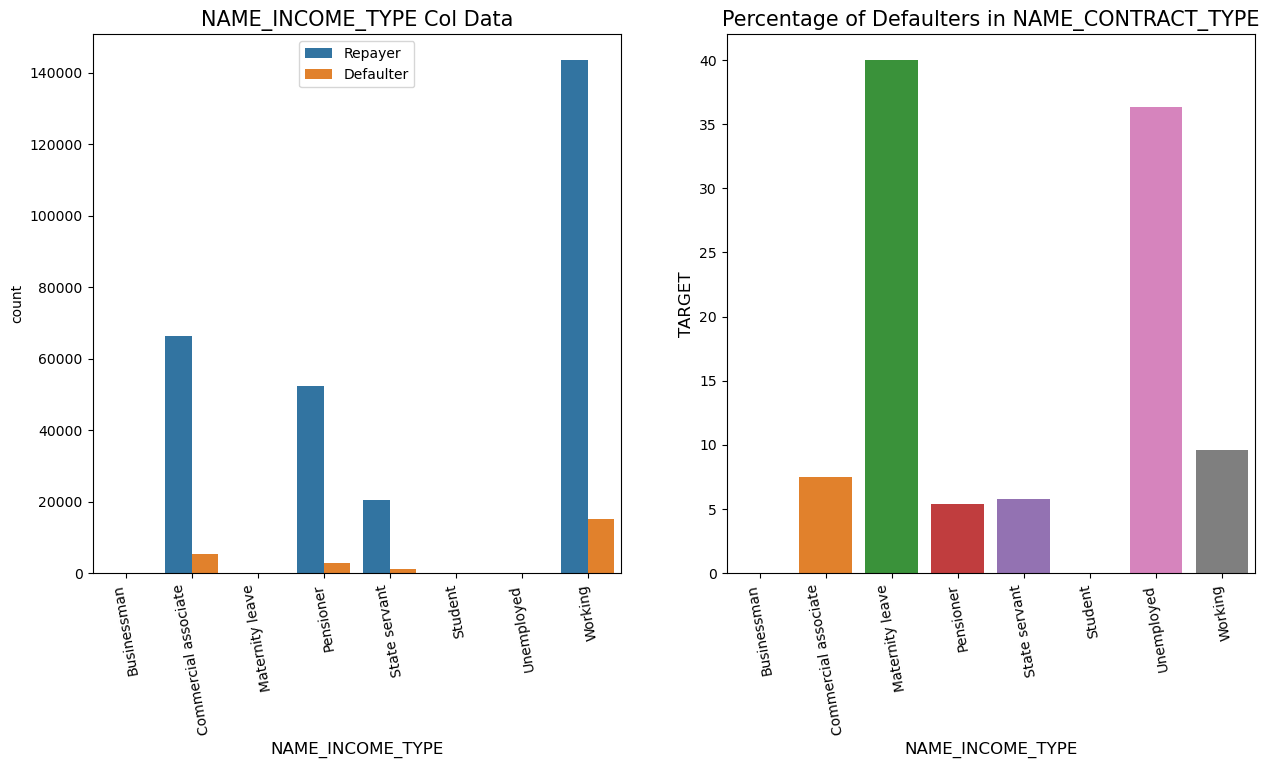

In [120]:
#7 Impact of income type on loan replayment
uni_var(bank_df,"NAME_INCOME_TYPE","TARGET",True,True,True)

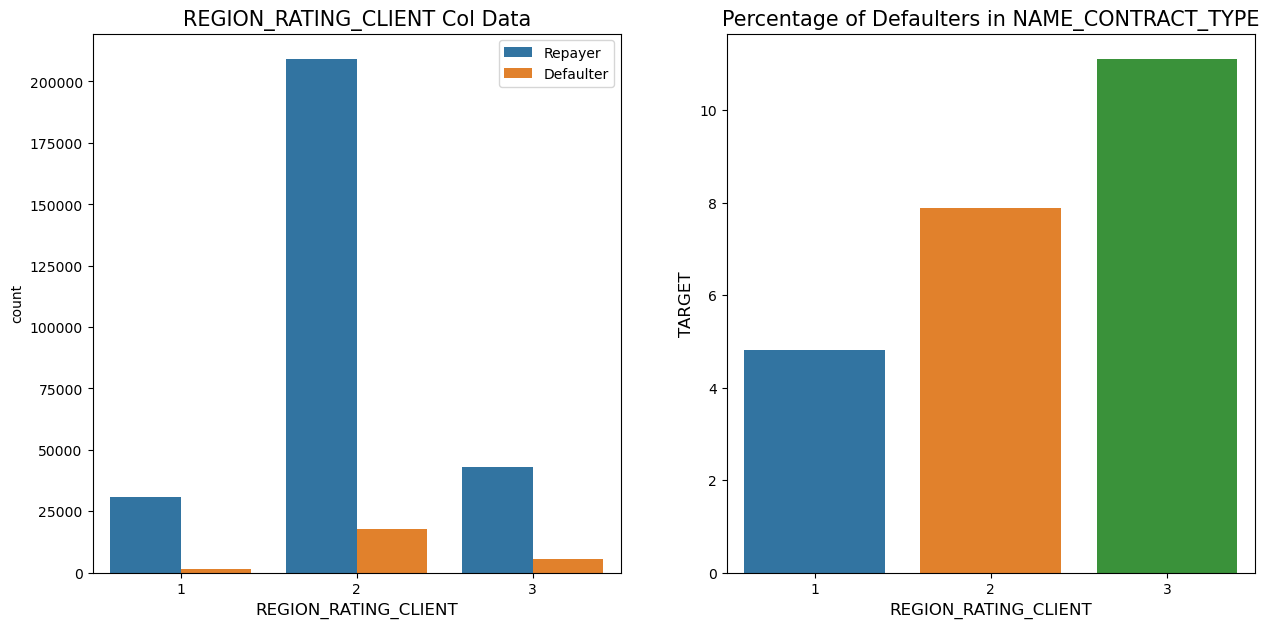

In [121]:
#8 Relationship of geographical loaction with loan replayment
uni_var(bank_df,"REGION_RATING_CLIENT","TARGET",True,False,True)

#### Observations based on client location:
    1. Most of the loan applicants are staying in locations with Rating 2.
    2. the highest number of defaulter are from the regions with Rating 3 (Defaulting percent = ~12%). 
    3. Applicant living in locations with Rating 1 have low  probability of defaulting. So, these applicants loan approval is much safer.

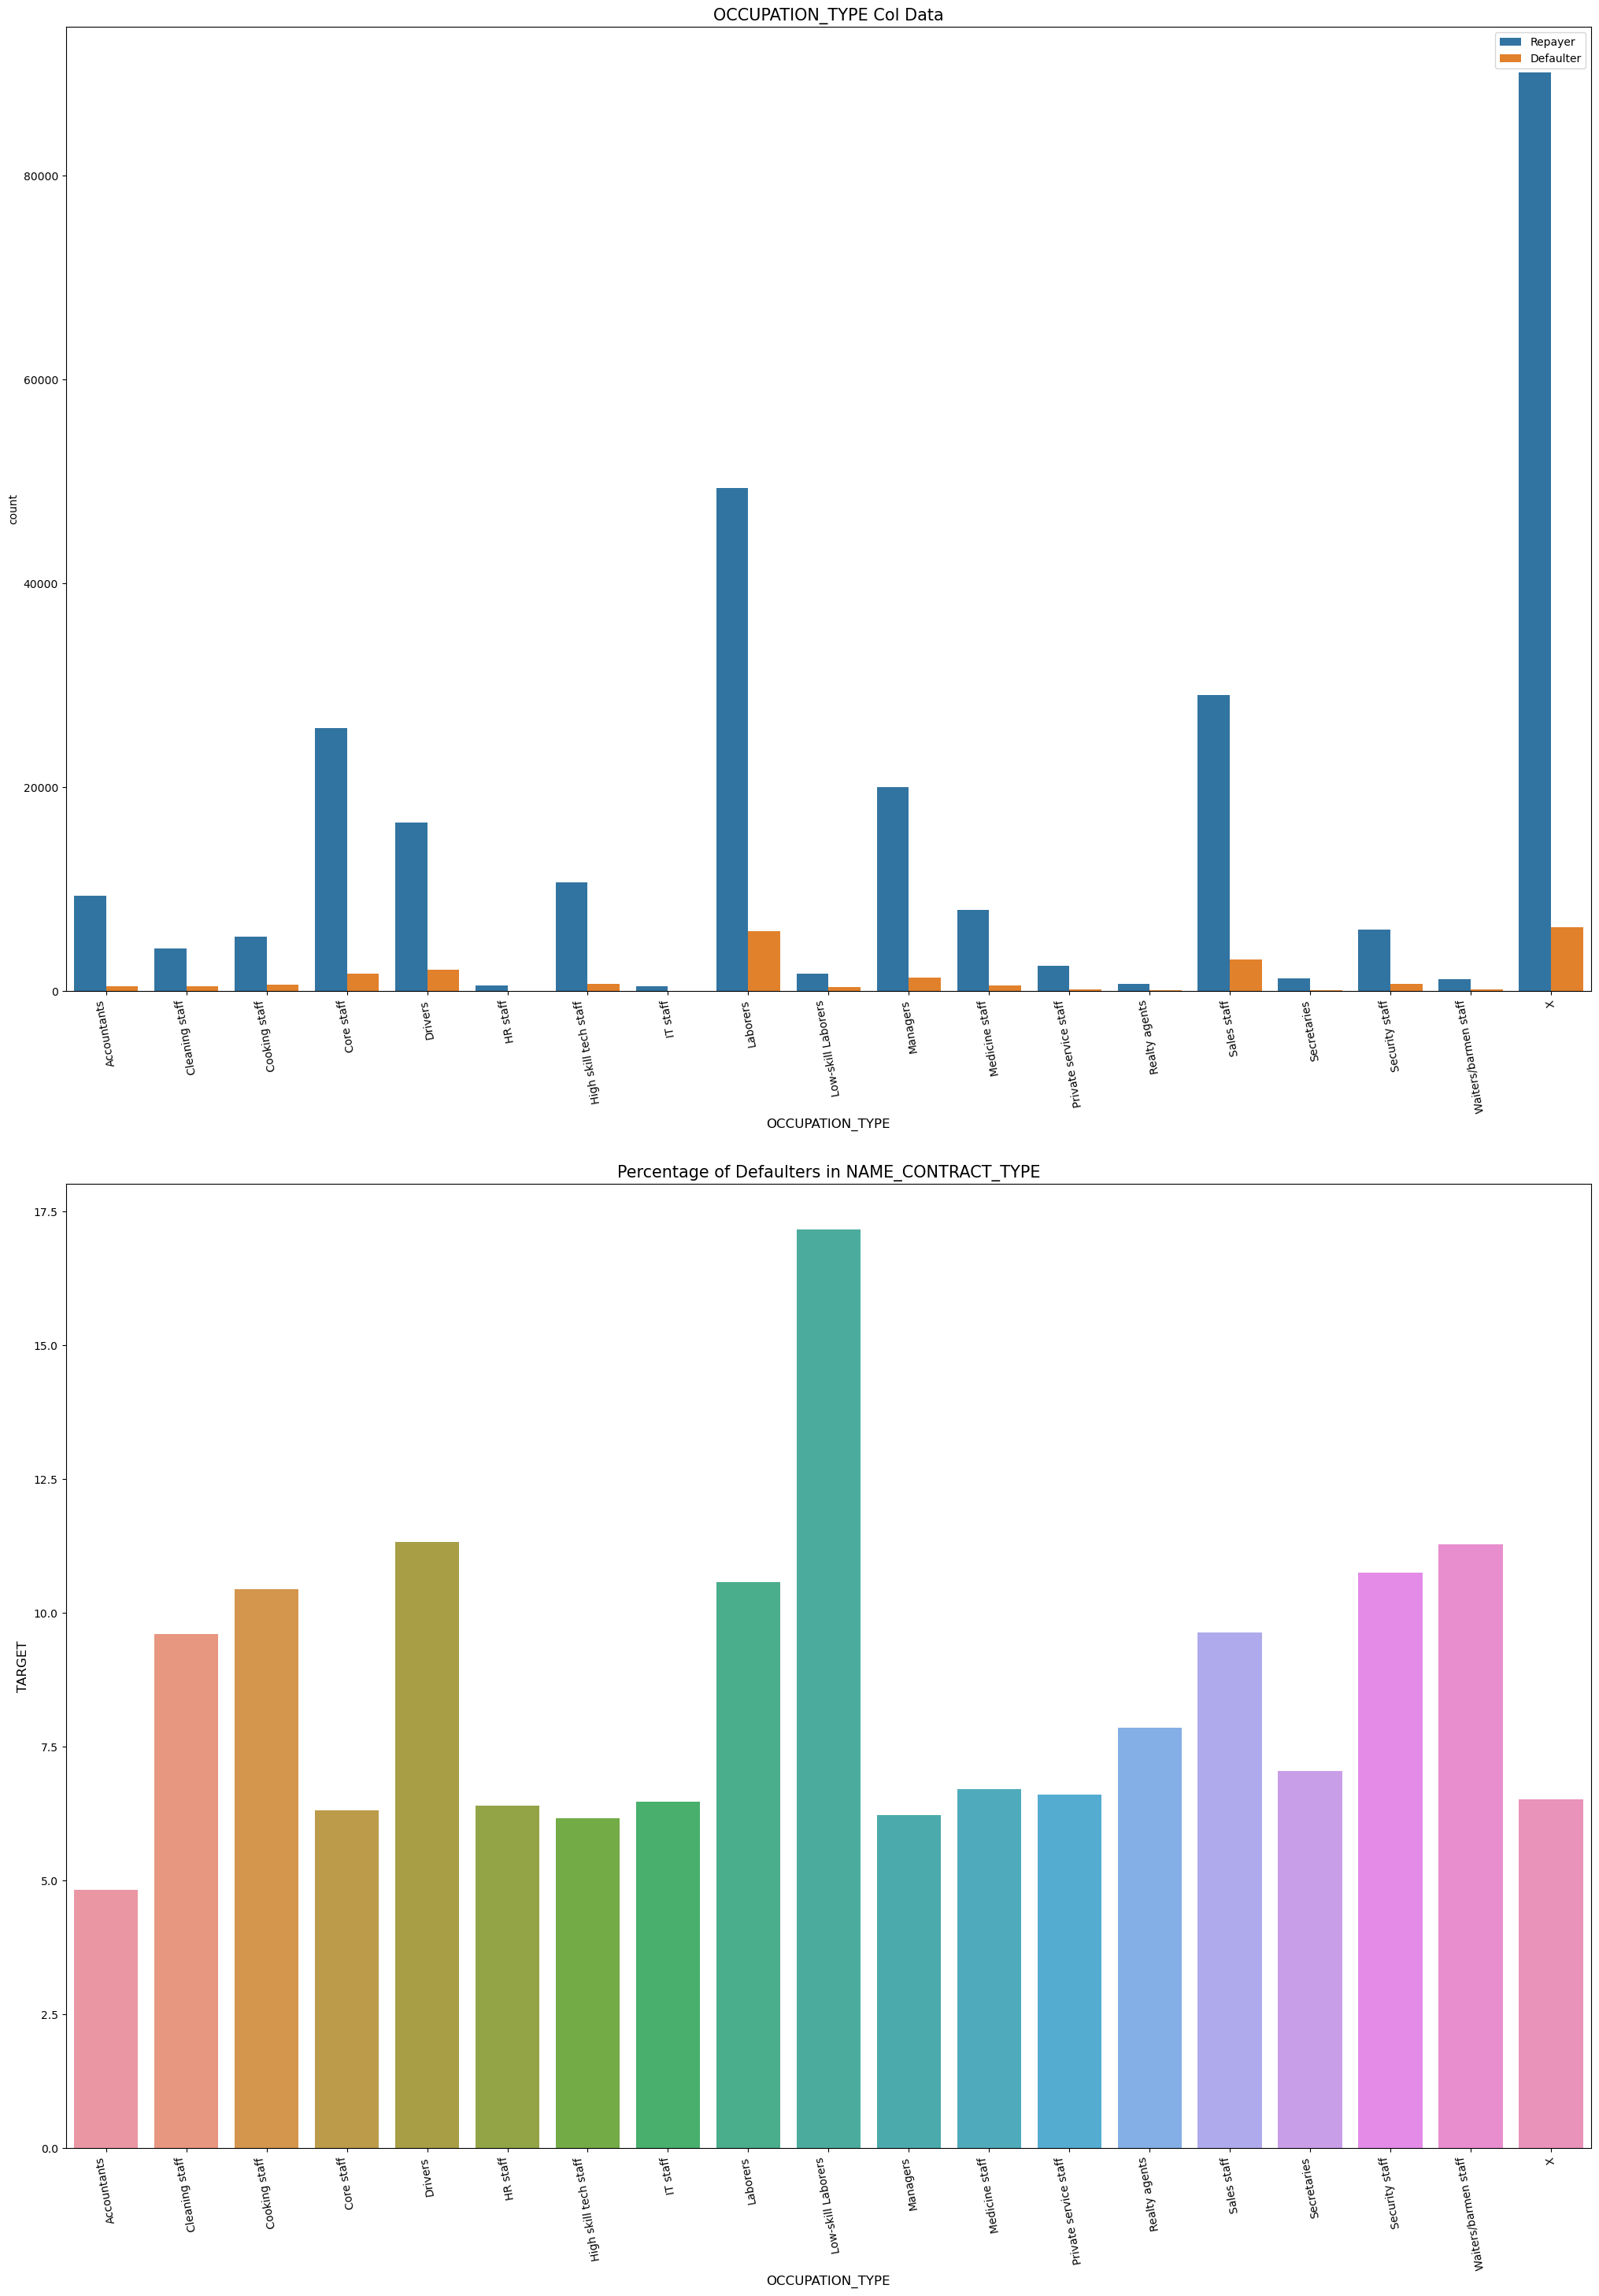

In [122]:
#9 Impact of employment role on loan replayment
uni_var(bank_df,"OCCUPATION_TYPE","TARGET",True,True,False)

#### Observations based on Occupation type:
    1. Most of the loans are taken by Laborers, followed by Sales staff.
    2. IT staff, HR staff and reality agents are less likely to apply for Loan.
    3. Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff
    4. Accountant are least defaulters, only 5% of the applicants tend to default from their loans. Which makes them a good candidate for loan applications.

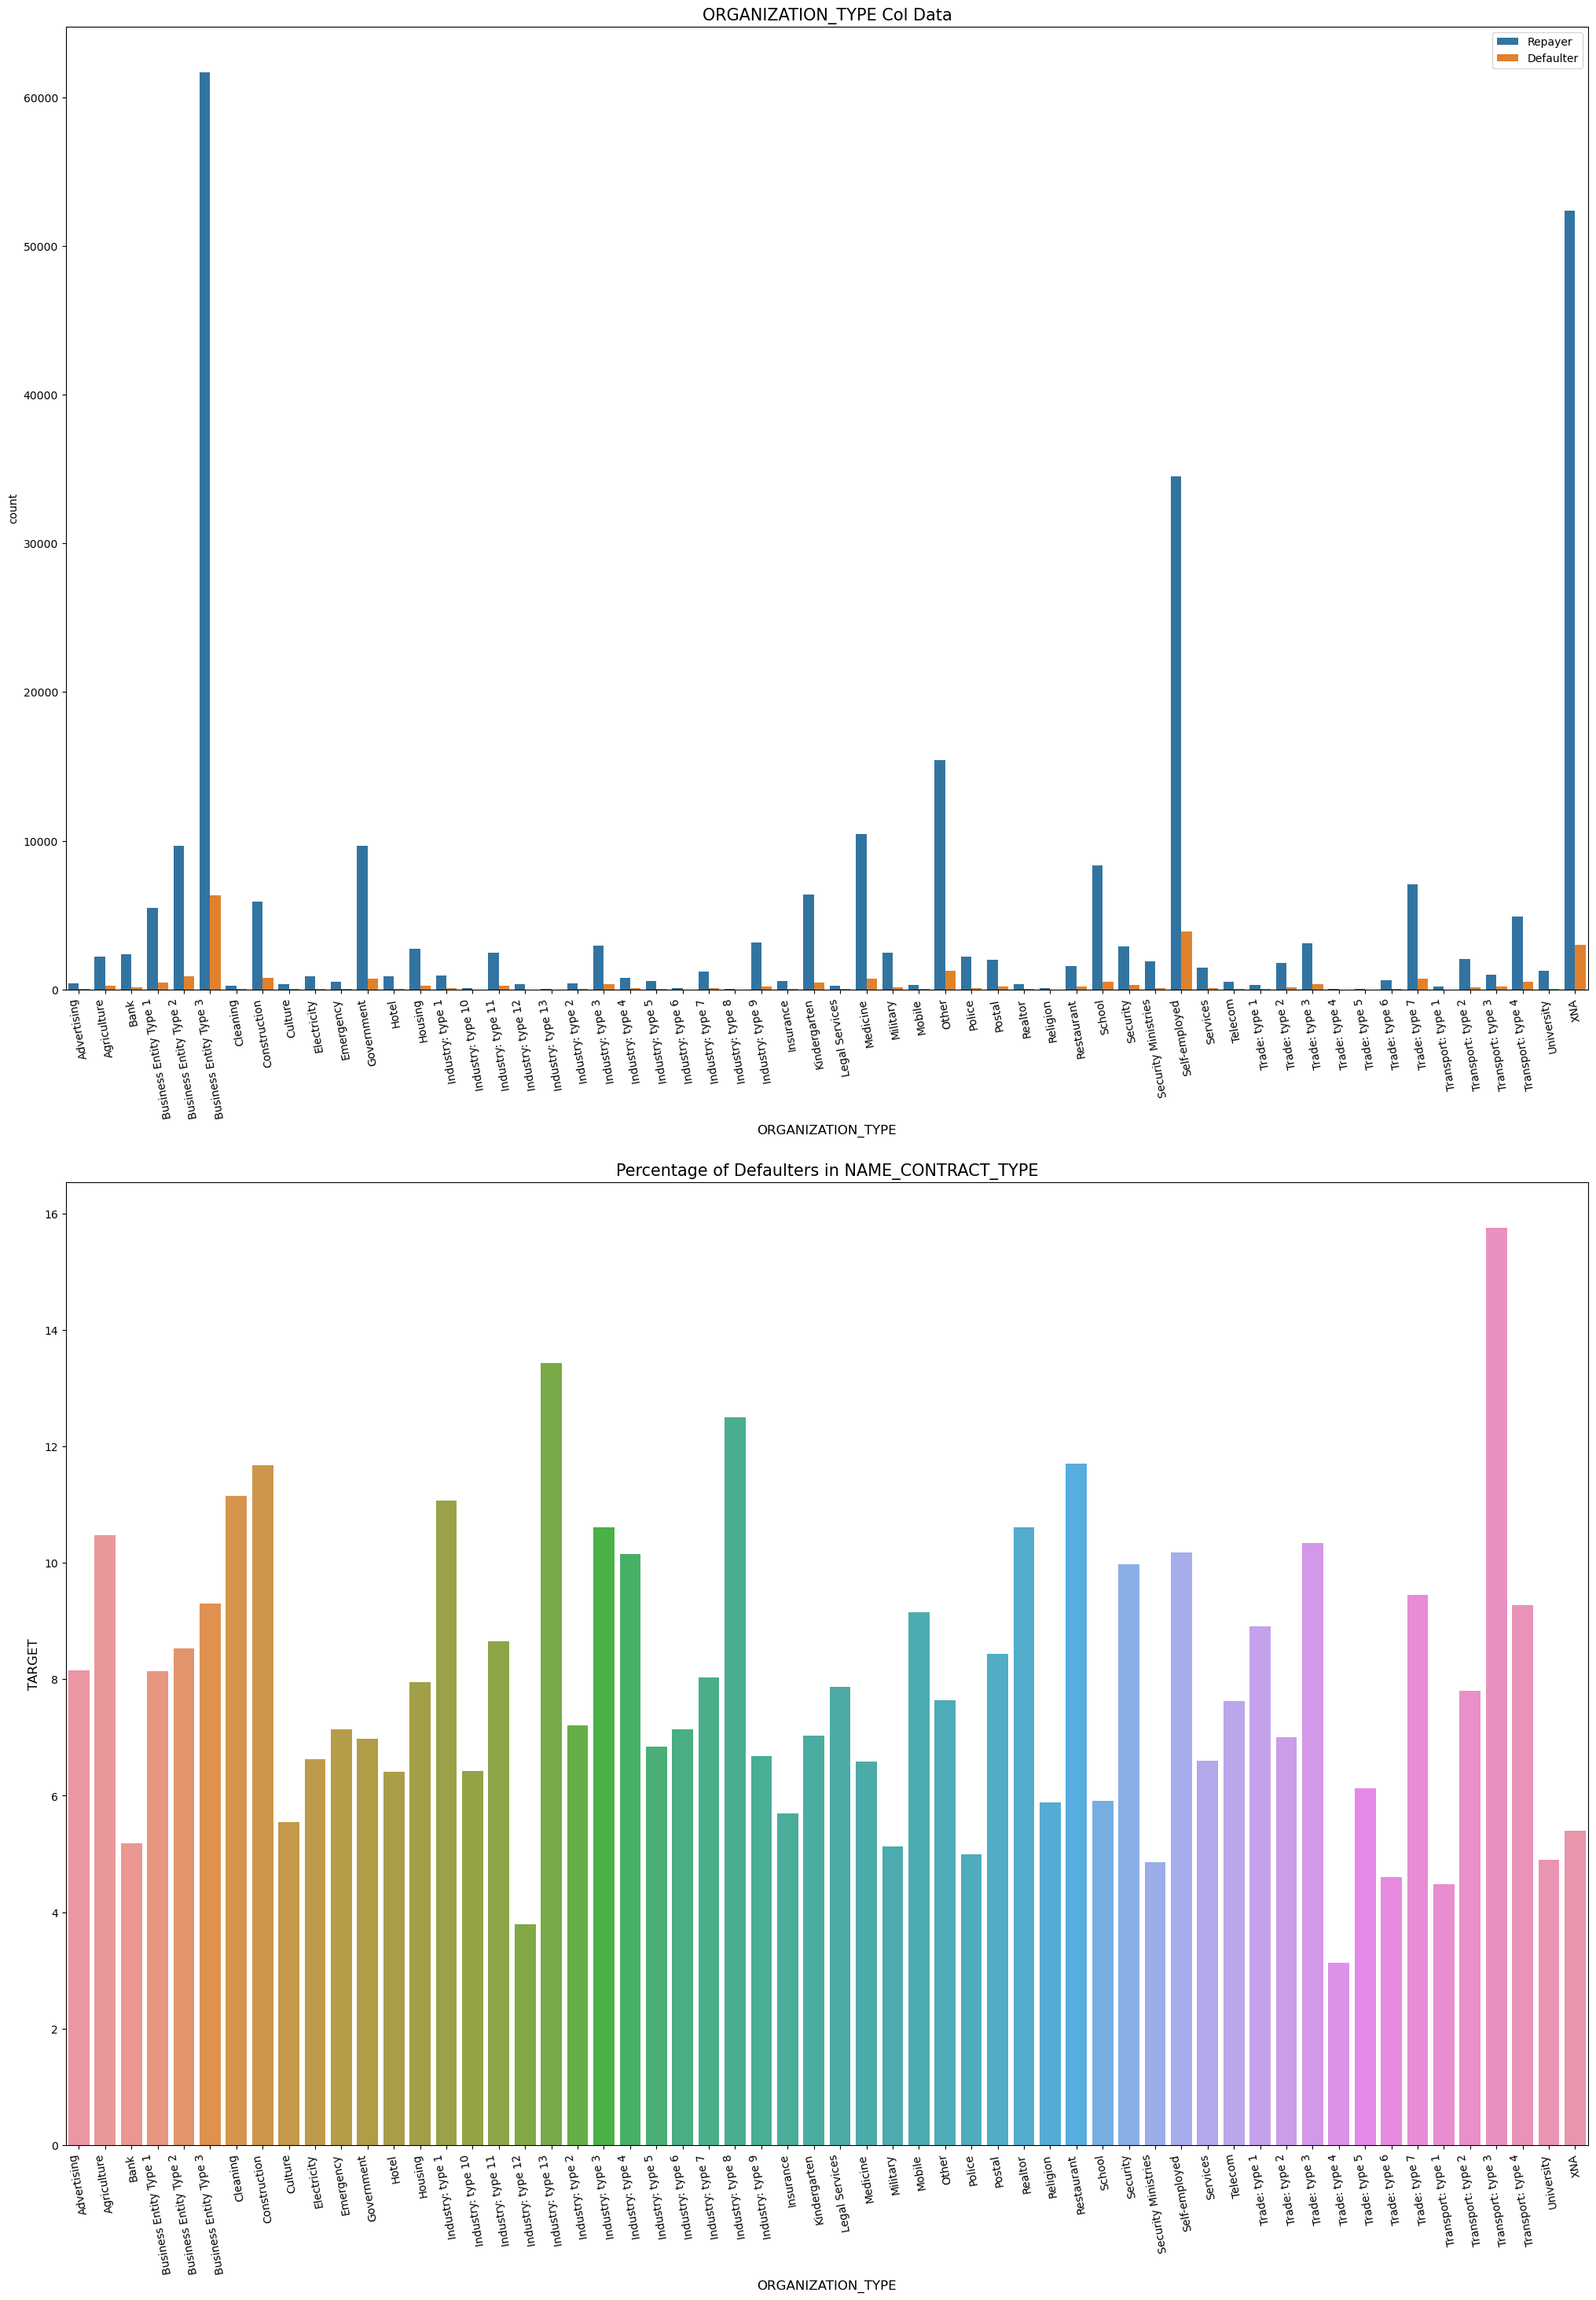

In [123]:
#10 Impact of industry category on loan replayment

uni_var(bank_df,"ORGANIZATION_TYPE","TARGET",True,True,False)

#### Observations based on organization type:
    1. The highest number of defaulter are from the following organisation type:
            1. 16% from Transport: type 3
            2. 13.5% from Industry: type 13 (13.5%)
            3. 12.5% from Industry: type 8 (12.5%) 
            4. ~12% from Restaurant and construction feilds
    2. Majority of the loan application are from Business Entity Type 3, Unknown and Self-employed people.
    3. For a very high number of applications the Organization information is Unknown or missing (XNA). However, the defaulter percent is also low for it. 
    4. For the following organisation, it is observed that the defaulter percent is less and thus make them a potentially good candidate for loan approval.
            1. Trade Type 4 
            2. Trade Type 5 
            3. Industry type 8

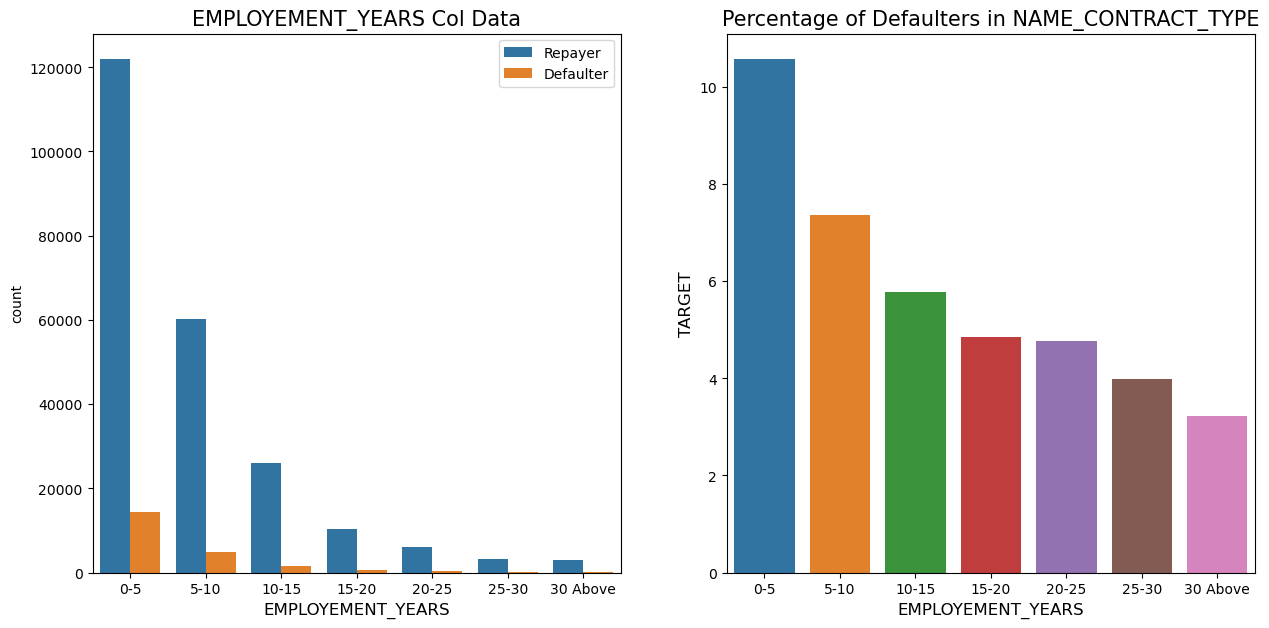

In [124]:
#11 Impact of employment years on loan replayment
uni_var(bank_df,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

#### Obsevation based on the employment years:
    1. Applicants having working experience between 0-5 years are the major defaulters (Around 11%). Followed by applicants with a work expierence of 5-10 years which is around 7.5 %.
    2. people with 25-30 and 30 above years of expierence tend to default less. Thus a steady decreasein defaulter percent is noticed with an increase in work expierence. 

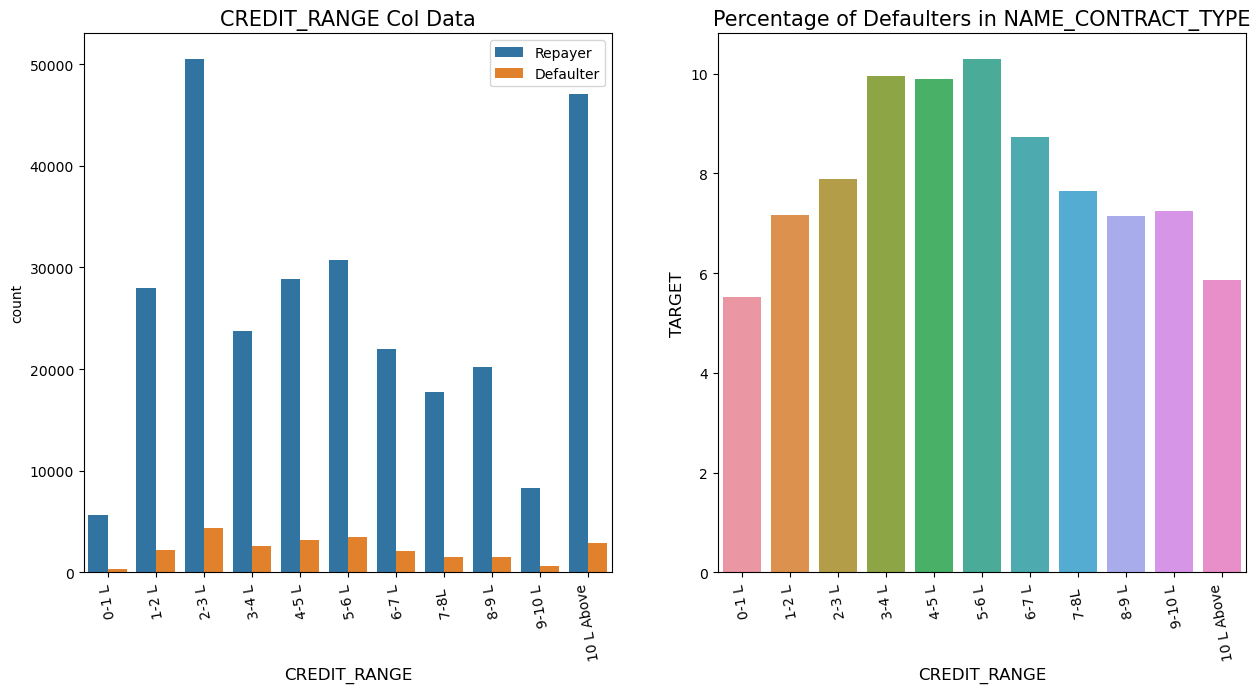

In [125]:
#12 Impact of loan amount on loan replayment

uni_var(bank_df,"CREDIT_RANGE","TARGET",False,True,True)

#### Observation with respect to loan amount:
    1. Majority of the loan applicants have their salary range between 2-3 Lakhs (50000+) and then people with saraly above 10 Lakh range (45000+)
    2. People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.

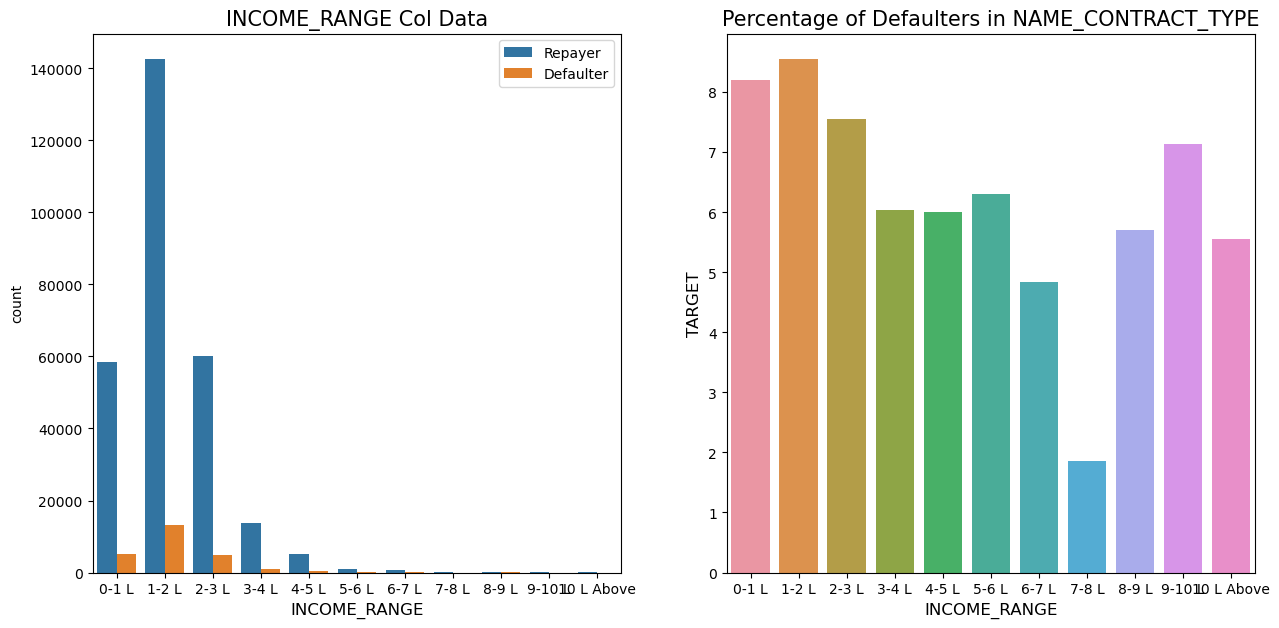

In [126]:
#13  Impact of income range with loan replayment

uni_var(bank_df,"INCOME_RANGE","TARGET",False,False,True)

#### Observation based on Applicant Income
    1. Applicants with income range between 1-2 lakh are the major applicants for loan.
    2. applicants with income range between 0-3 lakh, tend to default often.
    3. Applicant with Income 7-8 Lakhs are least defaulters (~2%).

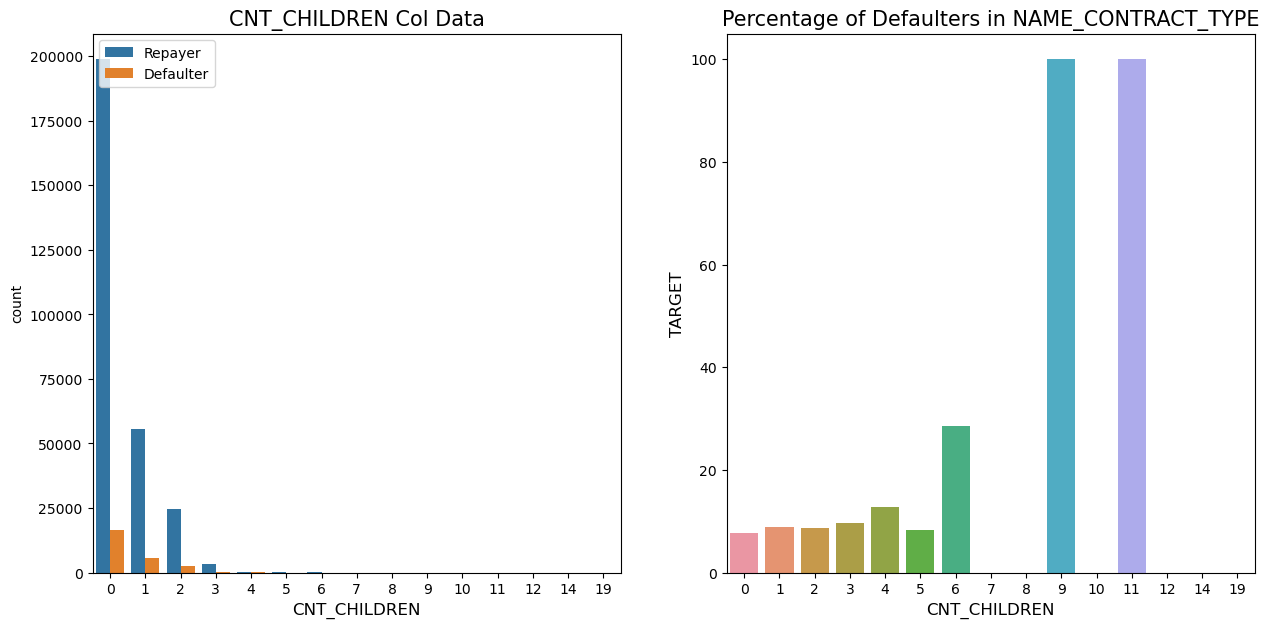

In [127]:
#14  Impact of number of childrens on loan replayment

uni_var(bank_df,"CNT_CHILDREN","TARGET",True,False,True)

#### Observations based on children count:
    1. Majority of the loan applicants do not have childrens or have a 1-2 childrens.
    2. Clients with more than 6 children have very high default rate and clients with 9-11 children showed 100% default rate. So it is not advised to approve loan for this category of applicants

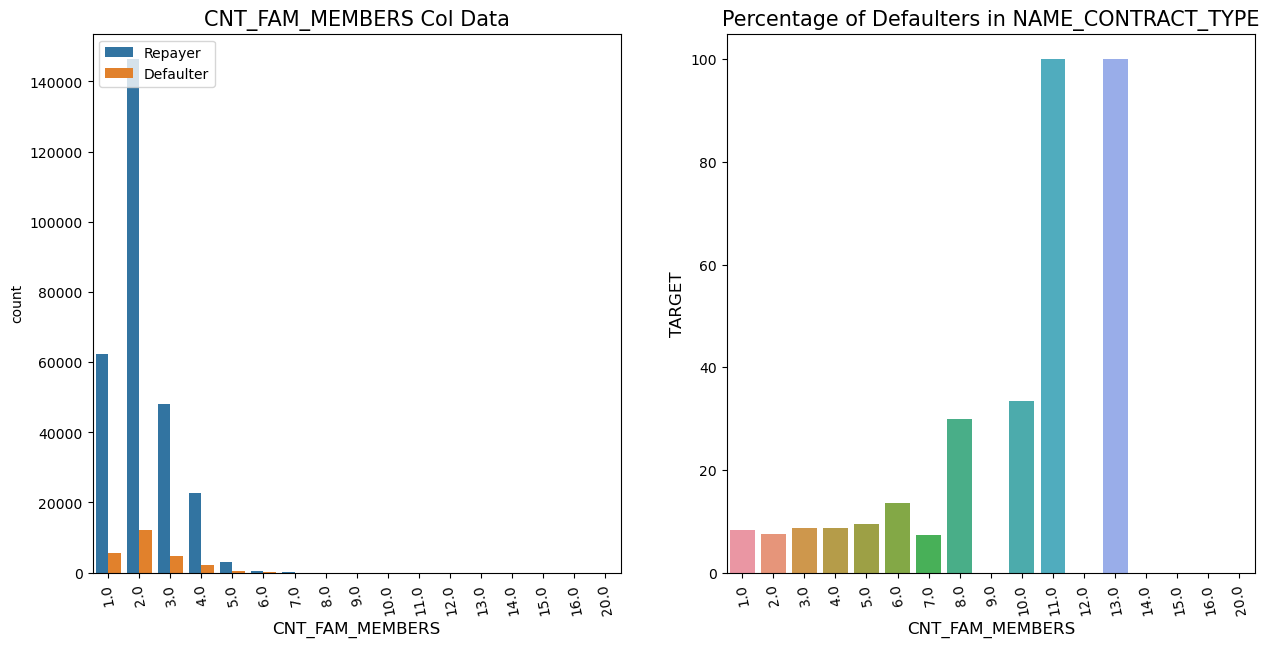

In [128]:
#15 family size relatinship with loan replayment
uni_var(bank_df,"CNT_FAM_MEMBERS","TARGET",True,True,True)

#### Observation based on family members
    1. Majority of the loan applicants are either single or a family of 2.
    2. However, it can be noticed that applicatant with a family size of 8-10 have very high defaulting rate. But applicants with more than 11-13 family members have close to 100 % defaulting rate. So these set of candidates are not a good prospect for the bank loans.

### Categorical Bivariate vs Multivariate

In [129]:
bank_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

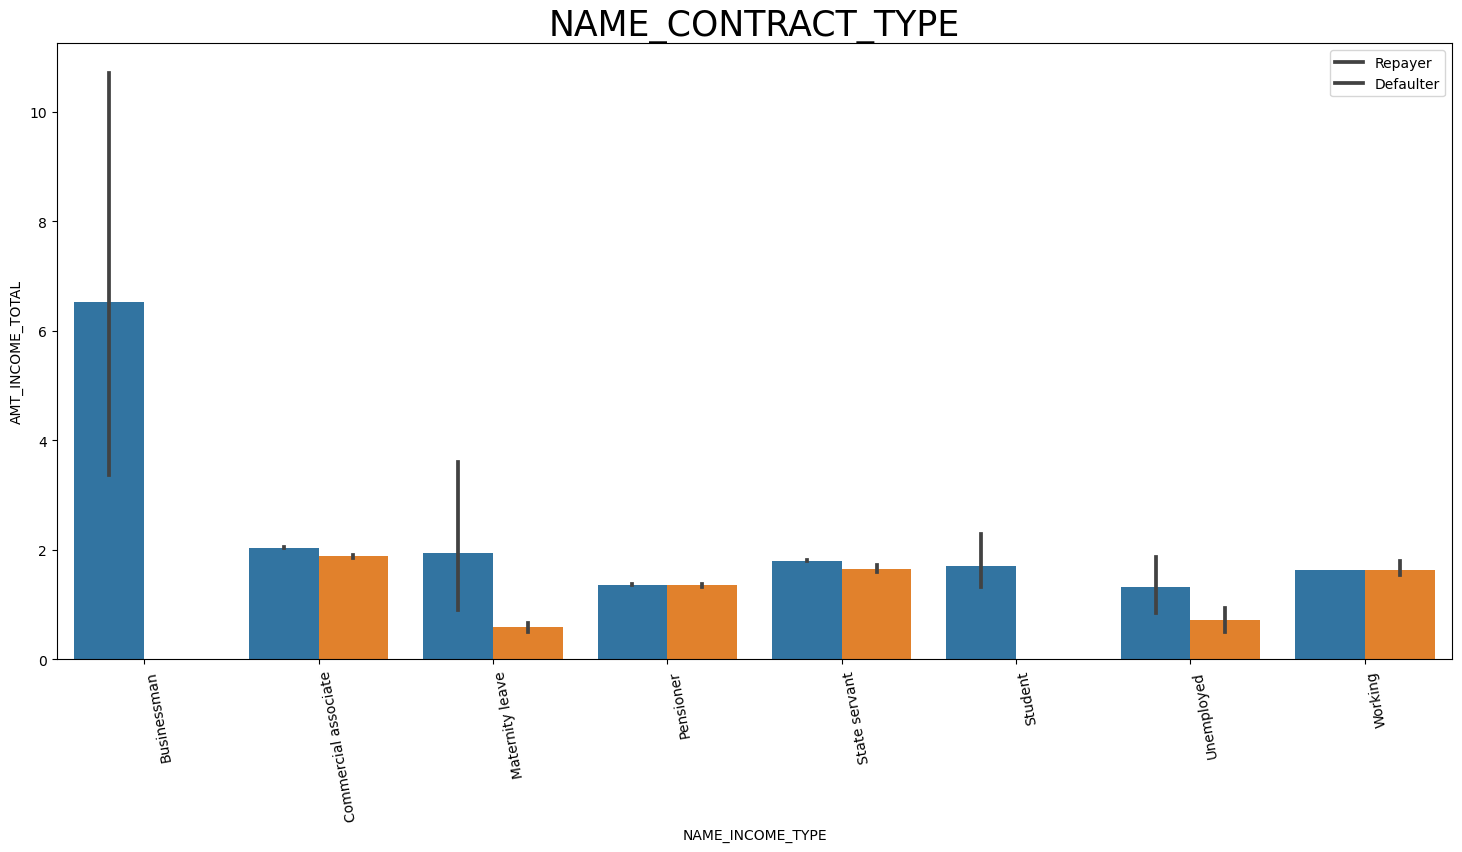

In [130]:
# Analysing relationship between income type and income total 
bi_var_categorical("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",bank_df,"TARGET",(18,8),['Repayer','Defaulter'])

#### Obseravtion:
    Businessman category seems to have the highest income when compared with the rest of the profession, also along with students they also have the least defaulting percent. Which ideally make them a very good candidate for bank oans and approval of loans.

### Numeric Variables Analysis

##### Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [131]:
#Listing columnns of dataframe "bnk_appl"
bank_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [132]:
# dividing the bnk_appl dataframe based on Target data, inorder to perform correlation analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = bank_df.loc[bank_df['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = bank_df.loc[bank_df['TARGET']==1, cols_for_correlation]

In [133]:
len(cols_for_correlation)

41

### Correlation between numeric variable

In [134]:
# Top 10 correlation of Repayers data

corr_repayer = Repayer_df.corr()
repayer_corr = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
repayer_corr.columns =['VAR1','VAR2','Correlation']
repayer_corr.dropna(subset = ["Correlation"], inplace = True)
repayer_corr["Correlation"]=repayer_corr["Correlation"].abs() 
repayer_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
repayer_corr.head(10)

VAR1              VAR2  Correlation
64     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
65     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
43         AMT_ANNUITY        AMT_CREDIT     0.771309
241      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
42         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
63     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
21          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
262  DAYS_REGISTRATION        DAYS_BIRTH     0.333151
235      DAYS_EMPLOYED   DAYS_ID_PUBLISH     0.276663
214         DAYS_BIRTH   DAYS_ID_PUBLISH     0.271314

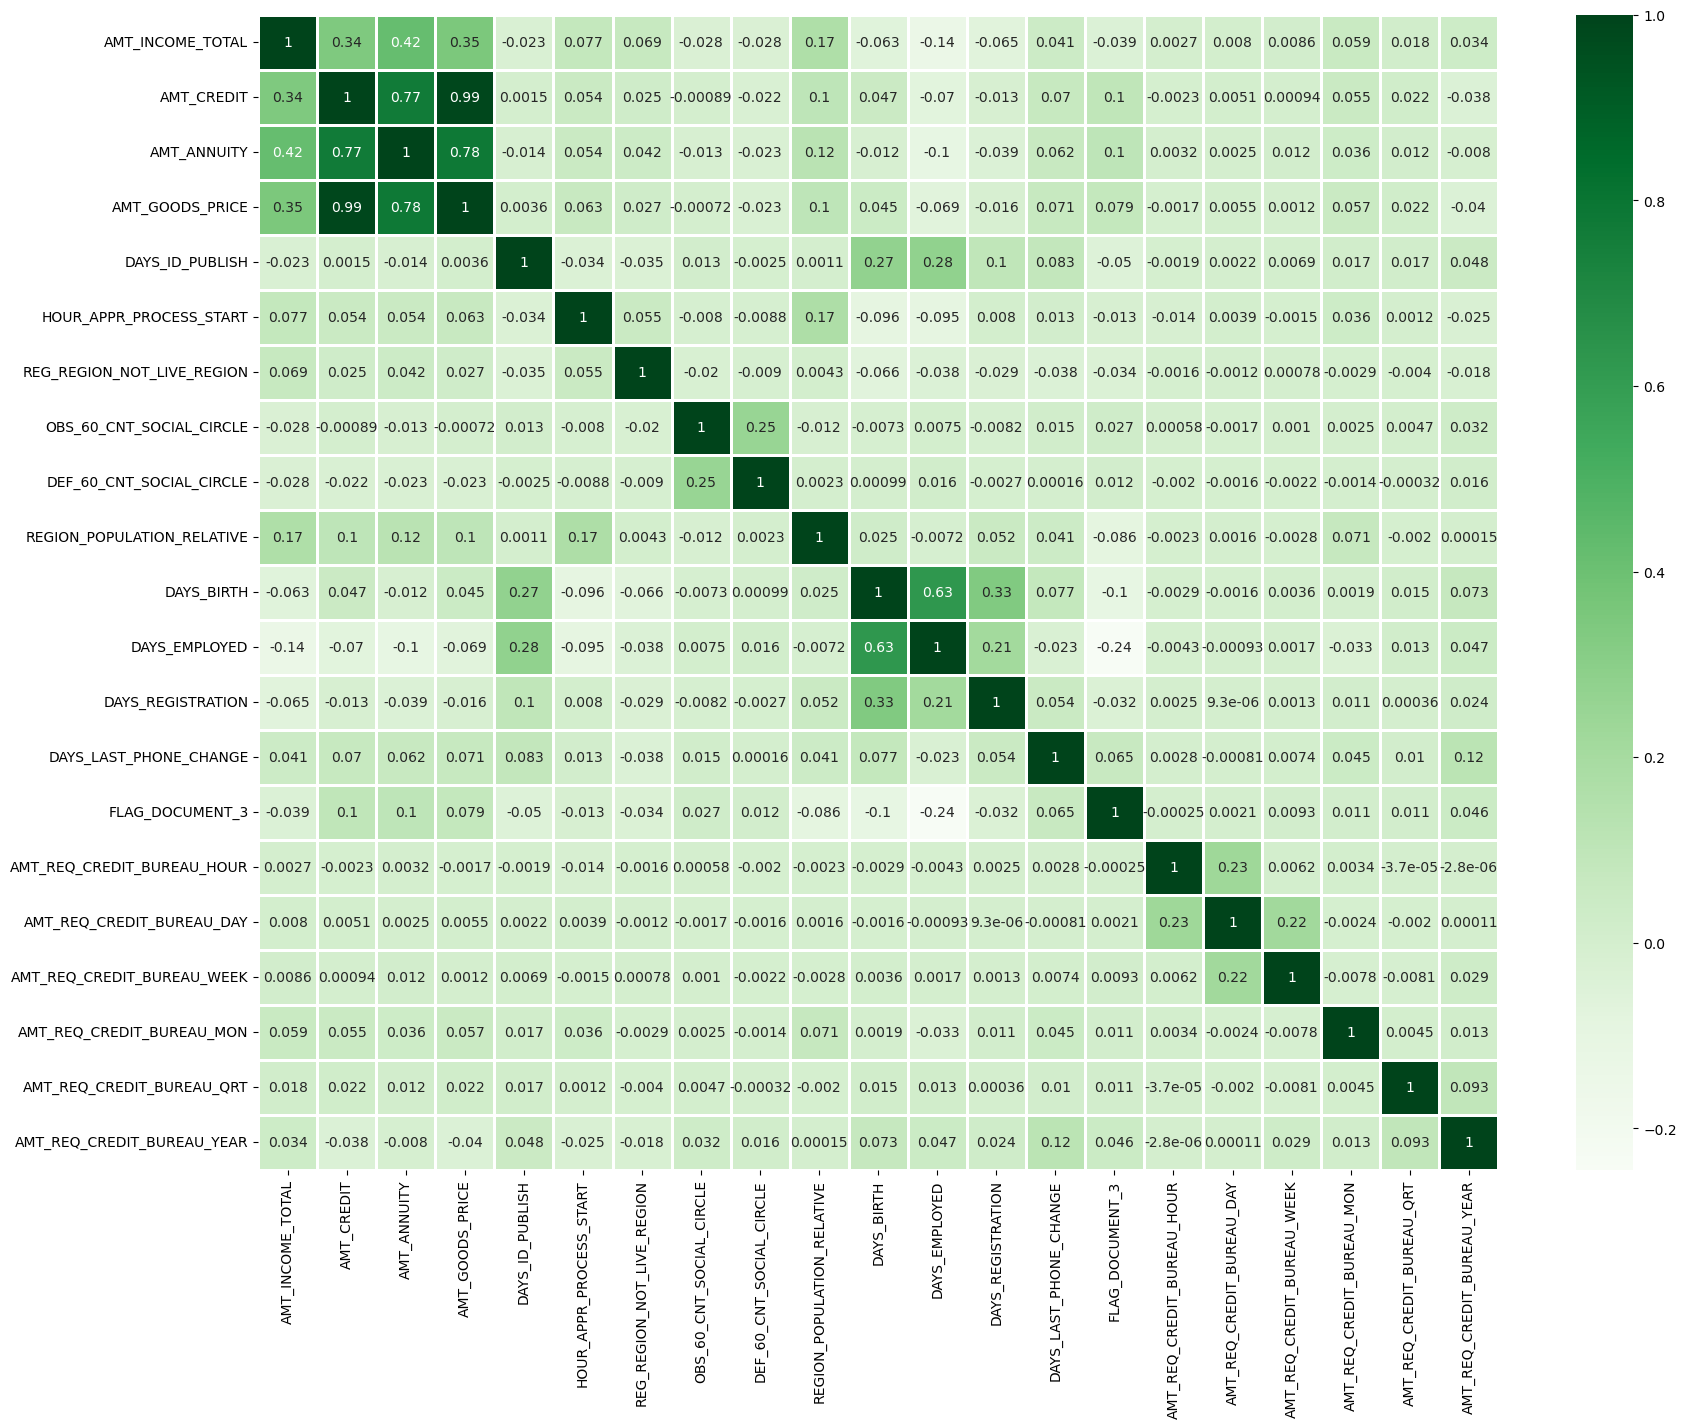

In [135]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="Greens",annot=True,linewidth =1)

#### Observation: Correlating factors amongst repayers
    1. Credit amount is highly correlated with "Goods Price Amount", "Loan Annuity", "Total Income" 
    2. We can also see that repayers have high correlation in number of days employed.

In [136]:
# Top 10 correlation of Defaulter data
corr_Defaulter = Defaulter_df.corr()
Defaulter_corr = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
Defaulter_corr = corr_Defaulter.unstack().reset_index()
Defaulter_corr.columns =['VAR1','VAR2','Correlation']
Defaulter_corr.dropna(subset = ["Correlation"], inplace = True)
Defaulter_corr["Correlation"]=Defaulter_corr["Correlation"].abs()
Defaulter_corr.sort_values(by='Correlation', ascending=False, inplace=True)
Defaulter_corr.head(10)

VAR1                        VAR2  Correlation
0              AMT_INCOME_TOTAL            AMT_INCOME_TOTAL          1.0
242               DAYS_EMPLOYED               DAYS_EMPLOYED          1.0
66              AMT_GOODS_PRICE             AMT_GOODS_PRICE          1.0
88              DAYS_ID_PUBLISH             DAYS_ID_PUBLISH          1.0
110     HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START          1.0
132  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_LIVE_REGION          1.0
154    OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE          1.0
176    DEF_60_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE          1.0
198  REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE          1.0
264           DAYS_REGISTRATION           DAYS_REGISTRATION          1.0

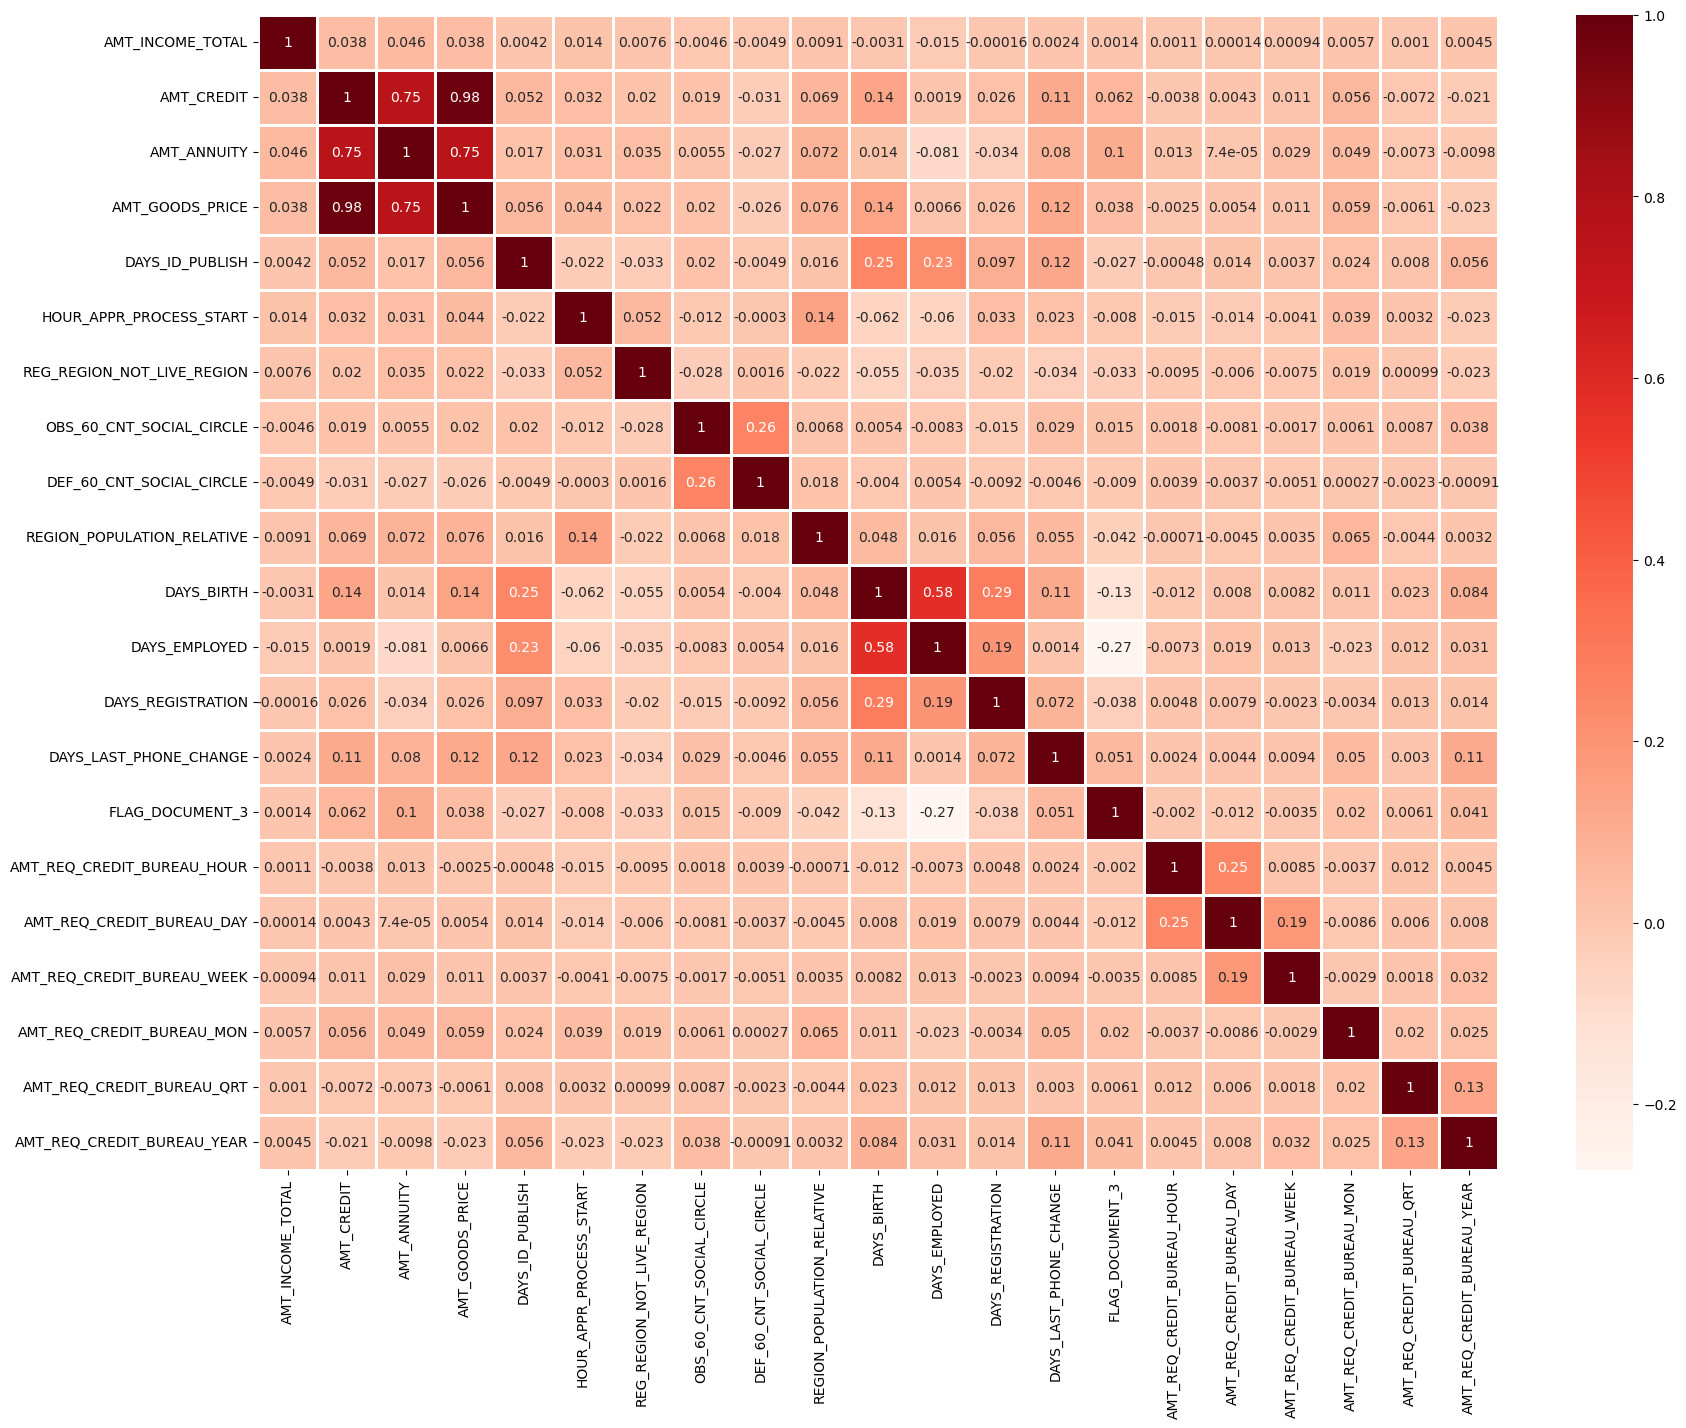

In [137]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="Reds",annot=True,linewidth =1)

#### Observation: Correlating factors amongst defaulter
    1. There is a high correlation between the goods price and Credit amount, which inturn infers that most of the applicants take loan topurchase consumer goods.
    2. The correlation between credit amount and loan annuity is less among the defaulter(0.75) when compared to that of repayers (0.77).
    3. Similarly even for the employed days, the repayers exibit more correlation than defaulters.
    4. The correlation between credit amount and total income sees a major difference, as the repayers are seen to have fairly average correlation around (0.34), whereas for defaulter (0.03), we can notice a sharp drop.
    5. The correlation between days birth column and number of childrens column has dropped to 0.259 in defaulters when compared to that of the repayers 0.33.
    6. There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

### Numerical Univariate Analysis

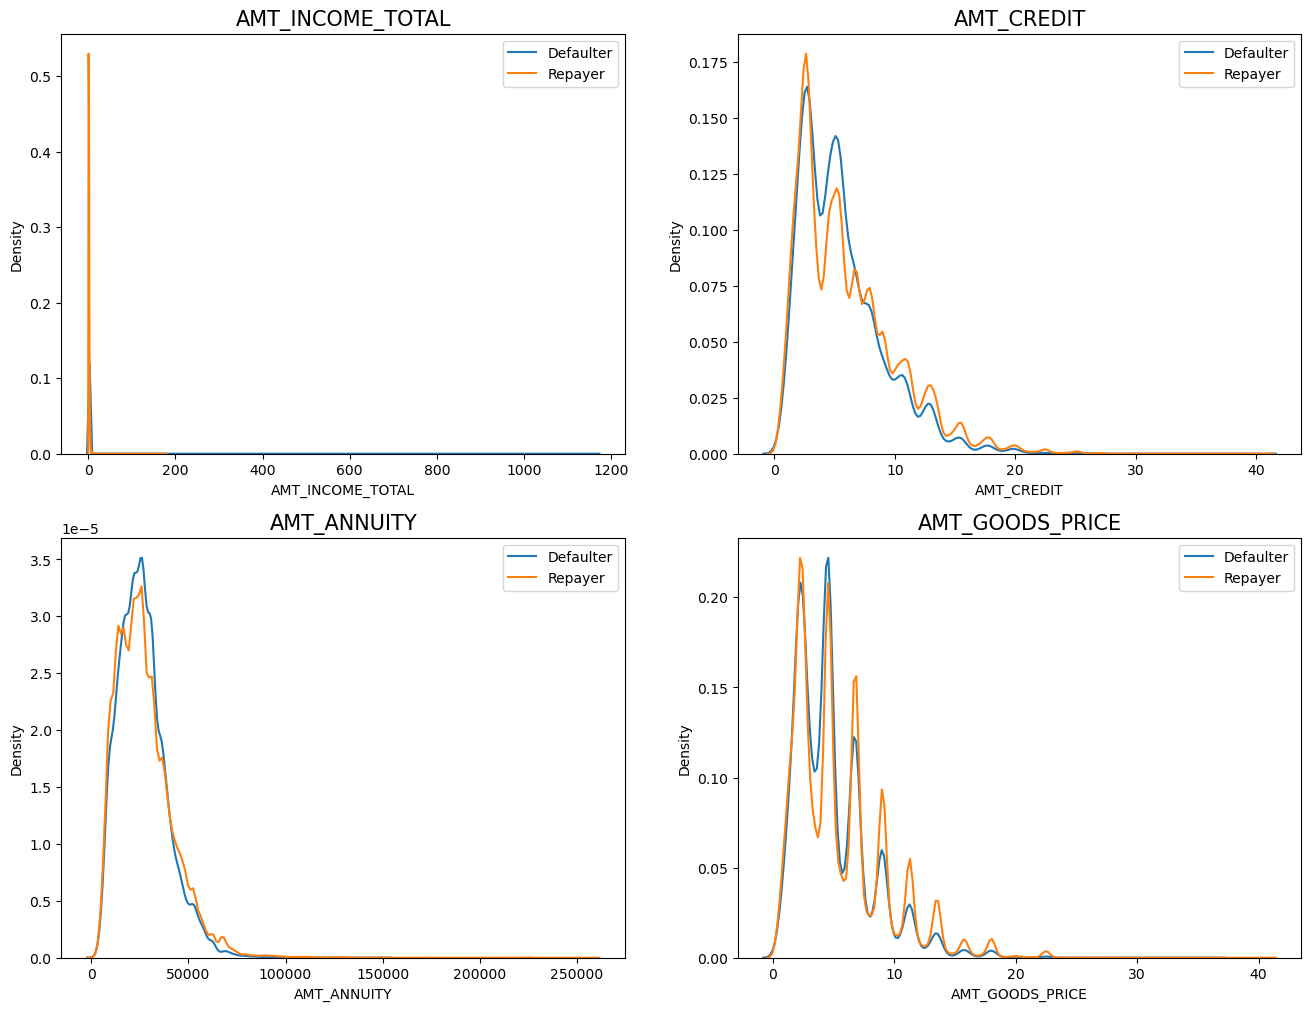

In [138]:
amount = bank_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 10})
    plt.legend()


plt.show()

#### Observation:
    1. Most number of loans range between 2 - 10 lakhs for the goods price
    2. Most people pay annuity below 50K for the credit loan
    3. Highest amount of Credit amount loans are for the amount 2-5 lakhs and majorly ranges from 2-10 lakhs bracket.

### Numerical Bivariate data

<Figure size 2000x2000 with 0 Axes>

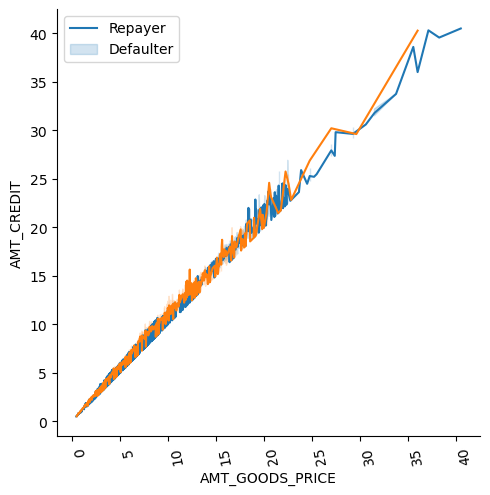

In [139]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bi_var_numerical('AMT_GOODS_PRICE','AMT_CREDIT',bank_df,"TARGET", "line",['Repayer','Defaulter'])

#### Observation: 
    The amount of repayers and defaulter are continuosly seens to raise with the increase in the loan amount. However, it can seen that the defaulter percentage seems to steadily raise but post 30 lakhs, there is spike in the defaulter percentage and the repayers percentage sees a small downfall.

### Merged Dataframes Analysis

In [140]:
# Merging dataframe with the help of SK_ID_CURR with Inner Joins
loan_df = pd.merge(bank_df, pre_df, on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0            0             2.025      4.065975        24700.5   
1            0             2.700     12.935025        35698.5   
2            0             2.700     12.935025        35698.5   
3            0             2.700     12.935025        35698.5   
4            0             0.675      1.350000         6750.0   

   AMT_GOODS_PRICE_x  ... CNT_PAYMENT NAME_YIELD_GROUP  \
0              3.510  ...        24.0       low_normal   
1             11.295  ...        12.0       low_normal   
2             11.295  ...         6.0           middle   
3             11.295  ...        12.0           middle   
4              1.350  ...         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0          565.0   
1             Cash X-Sell: low           365243.0          716.0   
2   POS industry with interest           365243.0          797.0   
3  POS household with interest           365243.0         2310.0   
4  POS mobile without interest           365243.0          784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0           25.0              17.0   
1                      386.0          536.0             527.0   
2                      647.0          647.0             639.0   
3                     1980.0         1980.0            1976.0   
4                      694.0          724.0             714.0   

   NFLAG_INSURED_ON_APPROVAL  YEARLY_DECISION  
0                        0.0                2  
1                        1.0                3  
2                        0.0                3  
3                        1.0                7  
4                        0.0                3  

[5 rows x 82 columns]

In [141]:
# Merged Dataframes information
loan_df.shape

(1413701, 82)

In [142]:
# checking dataframes information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [143]:
# Dividing loan dataset between repayers and defaulters

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

Plotting Contract Status vs purpose of the loan

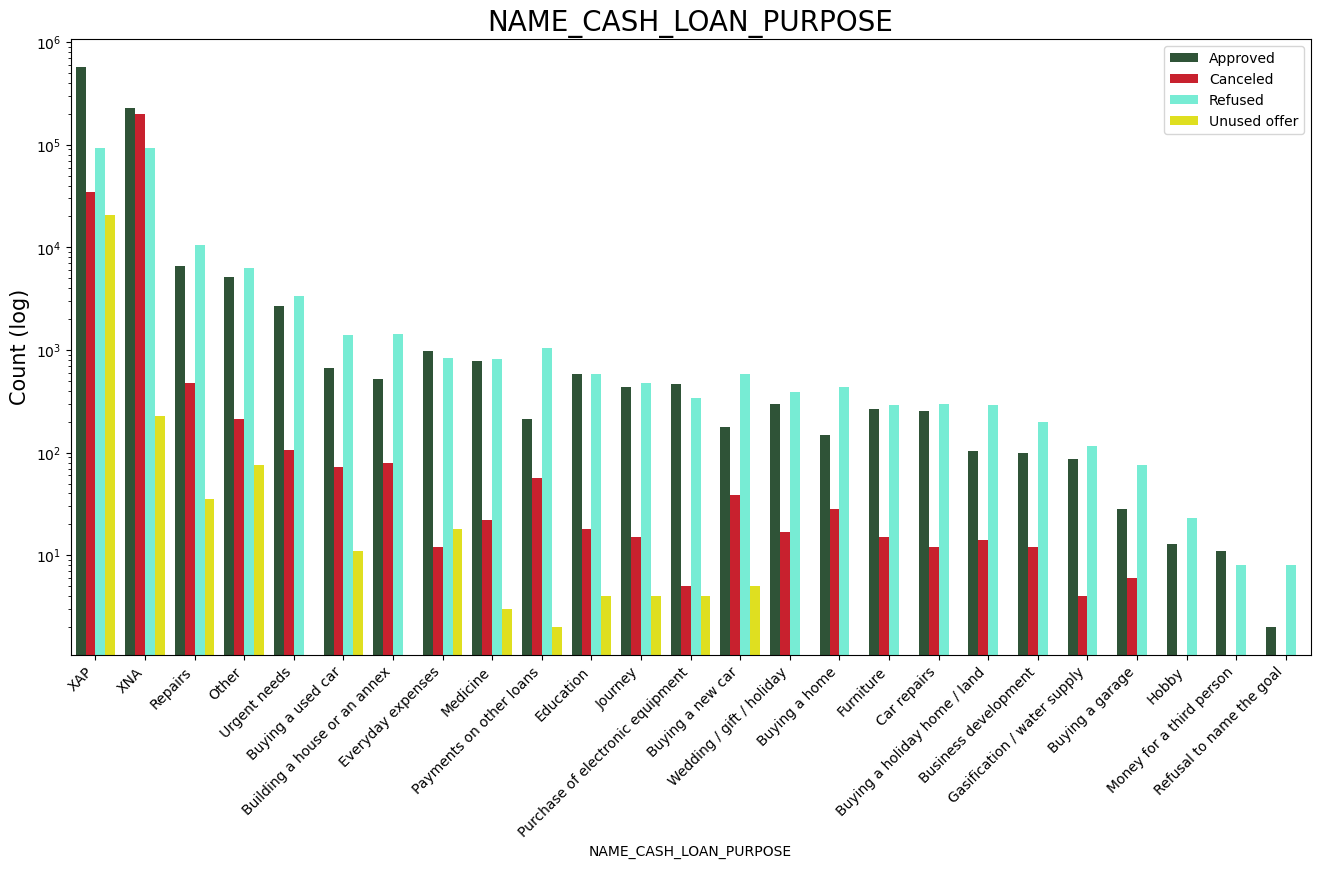

In [144]:
uni_var_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295934","#e40517","#64ffdf","#ffff00"],True,(16,8))

#### Observations:
    1. Majority of the loan applicants have not mentioned the reason for loan (XAP, XNA), which is a disadvantage to the bank as this informtion would have been valuable to the bank as well as the concerned industry.
    2. Loan provided for Repairs are seen to default all the time. Thus majority of application with Repairs as a pupose are rejected by the bank.

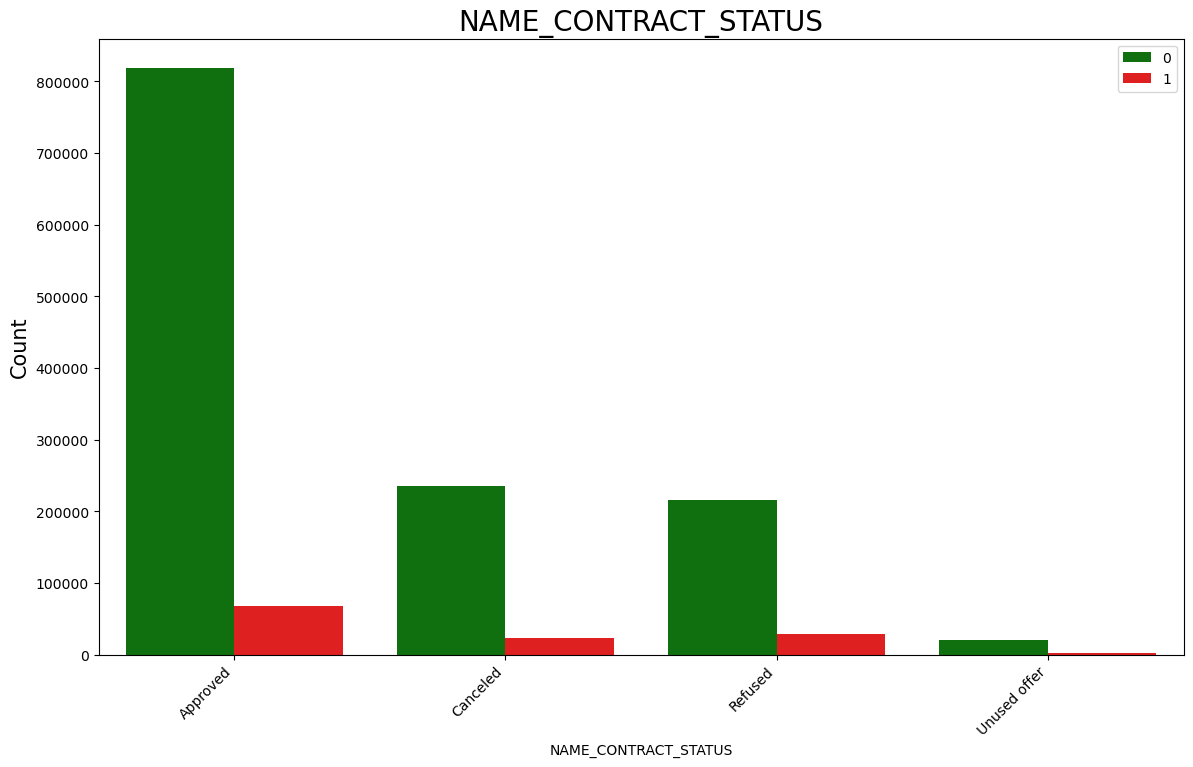

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856  81885600%
                     1        67243   6724300%
Canceled             0       235641  23564100%
                     1        23800   2380000%
Refused              0       215952  21595200%
                     1        29438   2943800%
Unused offer         0        20892   2089200%
                     1         1879    187900%

In [145]:

# Analysing the relationship of contract status with the loan repayment

uni_var_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df = pd.concat([r.value_counts(),round(r.value_counts(normalize=False).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df['Percentage'] = df['Percentage'].astype(str) +"%" 
df

#### Observation:
    1. 90% of the client who cancelled the offers previously have repayed the loan. So, if the bank takes feedback from its clients and revise the inrest rate according to the client need it might help the bank in retaining its clients.
    2. Previously 88% of the refused applicants, was seen to pay back loan in this tnure. Which can mean that they can be a future prospects to the bank.
    3. Among the approved offers, around 92% of loan takers repayed the loan and only 8% of them tend to default.
    
    Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

In [156]:
bank_df.dtypes

SK_ID_CURR                     category
TARGET                         category
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_REALTY                category
CNT_CHILDREN                   category
AMT_INCOME_TOTAL               category
AMT_CREDIT                     category
AMT_ANNUITY                    category
AMT_GOODS_PRICE                category
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE     category
DAYS_BIRTH                     category
DAYS_EMPLOYED                  category
DAYS_REGISTRATION              category
DAYS_ID_PUBLISH                category
FLAG_MOBIL                     category
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                category
REGION_RATING_CLIENT           category
REGION_RATING_CLIENT_W_CITY    category


In [162]:
bank_df = bank_df.astype('category')

In [163]:
labelencoder=LabelEncoder()
for col in bank_df.columns:
    bank_df[col] = labelencoder.fit_transform(bank_df[col])

### Data preparation

#### For our further analysis we will be dividing the data into test and train sets

In [164]:
# Creating test and train dataset for analysis

x = bank_df.drop(['TARGET'], axis=1)  
y = bank_df["TARGET"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

### Classification Methods

#### Developing a Decision Tree to determine the finest attributes

In [166]:
## Importing Decision Tree from the sklearn library for creating decision tree

from sklearn.tree import DecisionTreeClassifier

bank_dt = DecisionTreeClassifier(random_state = 50, max_depth = 2, min_samples_leaf=4)
bank_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=50)

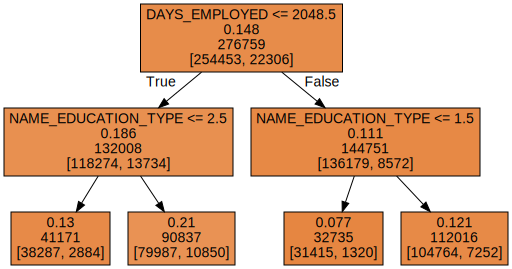

In [167]:
## Creating the decision tree

os.environ["PATH"] += os.pathsep + 'C:\\Users\\sindh\\anaconda3\\Lib\\site-packages\\graphviz'

dot1 = export_graphviz(bank_dt, out_file=None,label=all,  
                         feature_names=x.columns,  
                         filled=True, rounded=False, impurity=bool, 
                         special_characters=False,leaves_parallel=False)  
graph1 = graphviz.Source(dot1)
graph1

### Confirming on the parameter for analysis

__Observation:__
    
    The decision tree shown above makes it abundantly evident that the parameter "Age" is the most effective at illustrating the many applications in the dataset. The "Age" decision node serves as the foundation for most classifications that can be applied to the dataset.

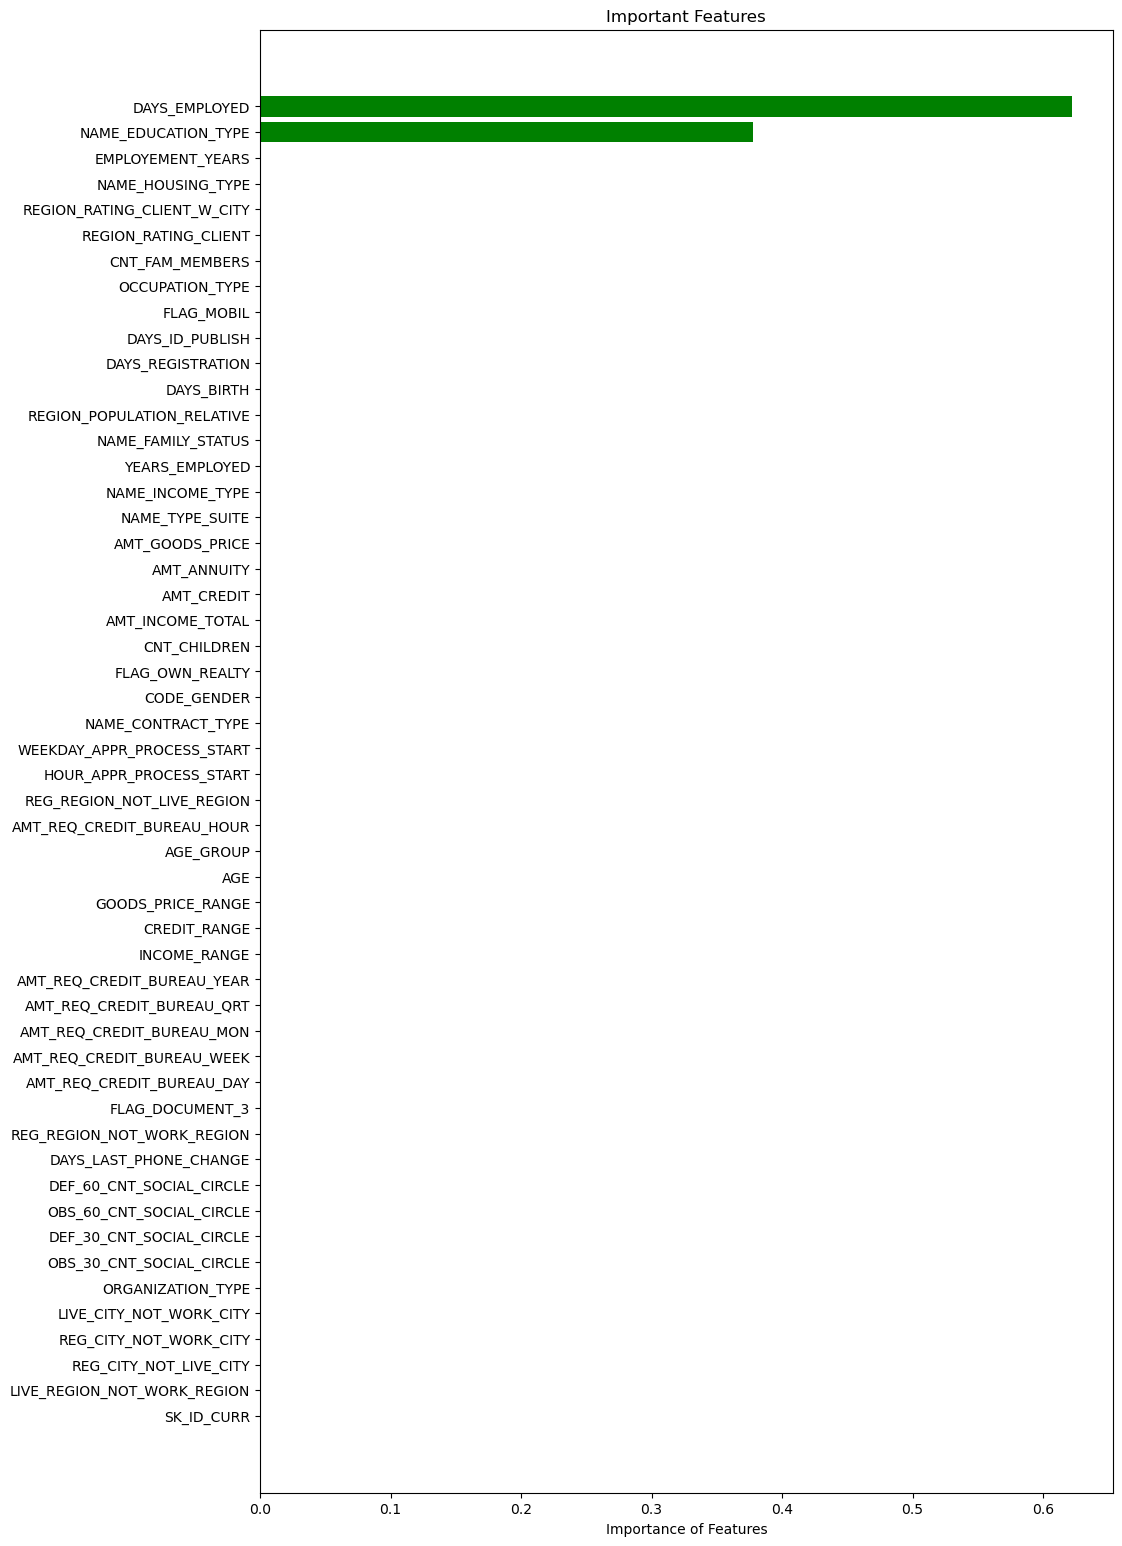

In [168]:
#LISTING THE APPROPRIATE FEATURE FOR ANALYSIS

list_feat = x.columns.values
important_feat = bank_dt.feature_importances_
index_sort = np.argsort(important_feat)

plt.figure(figsize=(11,19))
plt.barh(range(len(index_sort)), important_feat[index_sort], align='center', color ="green")
plt.yticks(range(len(index_sort)), list_feat[index_sort])
plt.xlabel('Importance of Features')
plt.title('Important Features')
plt.draw()
plt.show()

__Observation:__

The significance of the abovementioned feature graph offers a clear image of all the characteristics that might play a significant influence. Additionally, it is demonstrated that the value "DAYS_EMPLOYED" is crucial compared to the other parameters. The decision tree diagram, where "DAYS_EMPLOYED" is the major decision node and the other parameters are divided based on it, also makes this point very clear.

### Estimating and running predictions for findings

In [169]:
y_pred = bank_dt.predict(x_test)

In [170]:
print("Classification report from Decision Tree: \n", classification_report(y_test, y_pred))

Classification report from Decision Tree: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28233
           1       0.00      0.00      0.00      2519

    accuracy                           0.92     30752
   macro avg       0.46      0.50      0.48     30752
weighted avg       0.84      0.92      0.88     30752



In [171]:
print("Test Accuracy: {} Percent".format(round(bank_dt.score(x_test, y_test)*100, 2)))

Test Accuracy: 91.81 Percent


__Observation:__

    From the aforementioned test, we can observe that the decision tree test has an overall accuracy of 91.81%, proving that the model  fits the data well.

### Building a confusion matrix for the classification decision tree mentioned above

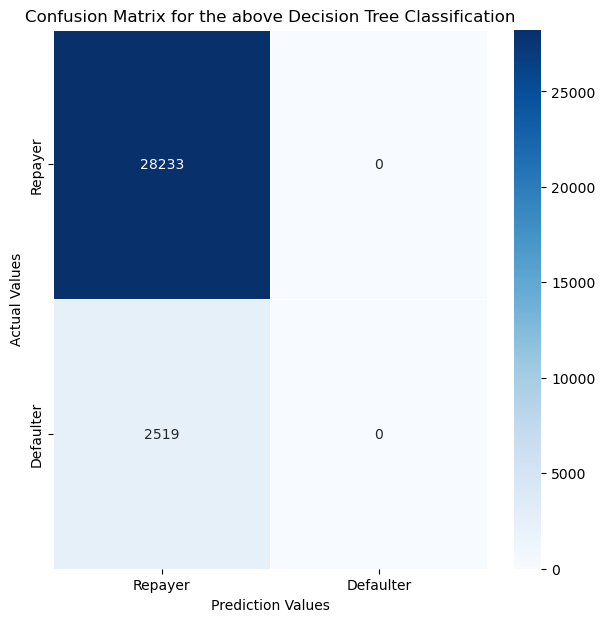

In [173]:
## Building confusion matrix for the above decision tree classification

con_mat = confusion_matrix(y_test, y_pred)

x_labels = ["Repayer", "Defaulter"]
y_labels = ["Repayer", "Defaulter"]

fig_size = plt.subplots(figsize =(7,7))
sns.heatmap(con_mat, annot = True, linewidths=0.5, linecolor="white", fmt = ".0f", cmap="Blues", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above Decision Tree Classification')
plt.show()

__Observation:__
    
    The heatmap shown above illustrates the relationship between two variables, such as "Repayer" and "Defaulter," and plots their values in relation to predictions and actual values. The heatmap shows that defaulters are also repayers, as can be shown.

### Logistic regression-based classification

In [174]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", max_iter=500)
log_reg.fit(x_train, y_train)



print("Test Accuracy: {} Percent".format(round(log_reg.score(x_test, y_test)*100,2)))

Test Accuracy: 91.81 Percent


### Building the confusion matrix for the abovementioned Logistic Regression

In [175]:
y_lr_pred = log_reg.predict(x_test)
print("Classification report from Logistic Regression: \n", classification_report(y_test, y_lr_pred))

Classification report from Logistic Regression: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28233
           1       0.00      0.00      0.00      2519

    accuracy                           0.92     30752
   macro avg       0.46      0.50      0.48     30752
weighted avg       0.84      0.92      0.88     30752



### Building the confusion matrix for the logistic regression classification mentioned above

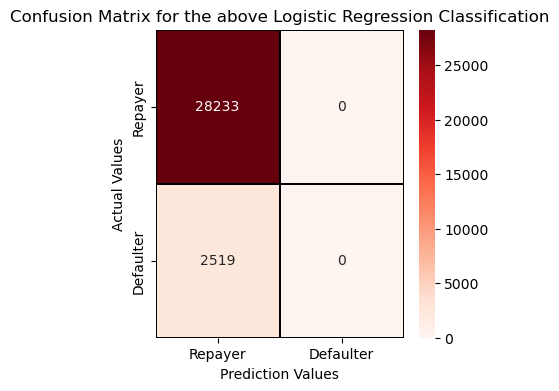

In [176]:
con_mat_lr = confusion_matrix(y_test, y_lr_pred)

x_labels = ["Repayer", "Defaulter"]
y_labels = ["Repayer", "Defaulter"]

fig_size = plt.subplots(figsize =(4,4))
sns.heatmap(con_mat_lr, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Reds", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above Logistic Regression Classification')
plt.show()

### CREATING A FUNCTION FOR CALCULATING THE CO-EFFICIENT OF DETERMINATION

In [177]:
# creating a function to create adjusted R-Squared

def adj_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [178]:
print(adj_r2(x_train, y_train, log_reg))

0.919387655479817


In [179]:
print(adj_r2(x_test, y_test, log_reg))

0.9179478782166027


### PERFORMING L1 REGULARIZATION (LASSO MODEL)

In [181]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [182]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

4.98669913531128e-08

In [183]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=4.98669913531128e-08)

In [184]:
lasso.score(x_train, y_train)

0.026111031253979955

In [185]:
lasso.score(x_test, y_test)

0.028172768382055735

In [186]:
print(adj_r2(x_train, y_train, lasso))

0.025928013081714885


In [187]:
print(adj_r2(x_test, y_test, lasso))

0.026526623033864105


### PERFORMING L2 REGULARIZATION (Ridge Regression)

In [188]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([1.62545037, 6.11981022, 4.1629031 , 3.98465024, 7.17733379,
       0.73728139, 3.58582462, 4.64615654, 6.75332313, 0.79577171,
       0.89386284, 2.78433915, 1.75863742, 0.99005368, 0.83740674,
       3.79373244, 9.66802787, 2.89801176, 1.53746617, 5.17288448,
       1.28134716, 4.27199809, 0.64963263, 5.42949998, 9.23298351,
       3.50779355, 1.84633424, 4.89277558, 7.72086995, 7.17290696,
       6.38835309, 9.03737983, 4.67833515, 6.08037321, 8.55870226,
       5.49285905, 9.75800037, 3.18749006, 2.4698665 , 9.05347249,
       7.49243473, 7.86865797, 7.09755901, 7.66554331, 9.08105761,
       2.38981502, 1.64357683, 8.52337541, 3.04397443, 8.80402435]),
        cv=10, normalize=True)

In [190]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

0.64963263117084

In [191]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=0.64963263117084)

In [192]:
ridge.score(x_train, y_train)

0.026111136815656688

In [193]:
ridge.score(x_test, y_test)

0.02817332467331557

In [194]:
print(adj_r2(x_train, y_train, ridge))

0.025928118663229194


In [195]:
print(adj_r2(x_test, y_test, ridge))

0.02652718026740697


### Classification based on Linear Regression

In [197]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)



print("Test Accuracy: {} Percent".format(round(log_reg.score(x_test, y_test)*100,2)))

Test Accuracy: 91.81 Percent


### Constructing confusion matrix for the above Linear Regression

In [198]:
y_ln_pred = lin_reg.predict(x_test)
print("Classification report from Logistic Regression: \n", classification_report(y_test, y_lr_pred))

Classification report from Logistic Regression: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28233
           1       0.00      0.00      0.00      2519

    accuracy                           0.92     30752
   macro avg       0.46      0.50      0.48     30752
weighted avg       0.84      0.92      0.88     30752



### Constructing confusion matrix for the above Linear Regression Classification

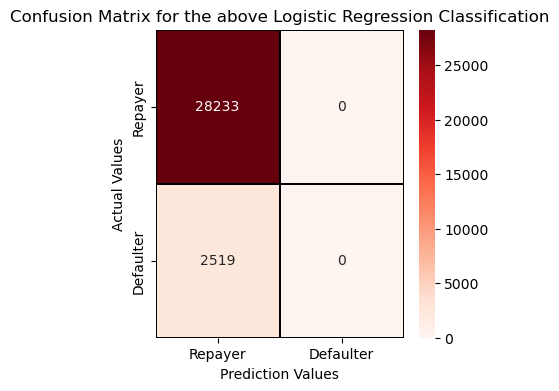

In [199]:
con_mat_ln = confusion_matrix(y_test, y_lr_pred)

x_labels = ["Repayer", "Defaulter"]
y_labels = ["Repayer", "Defaulter"]

fig_size = plt.subplots(figsize =(4,4))
sns.heatmap(con_mat_ln, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Reds", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above Logistic Regression Classification')
plt.show()

In [200]:
# creating a function to create adjusted R-Squared

def adju_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [201]:
print(adju_r2(x_train, y_train, lin_reg))

0.02592817458396246


In [202]:
print(adju_r2(x_test, y_test, lin_reg))

0.0265270997041136


In [203]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [204]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

4.98669913531128e-08

In [205]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=4.98669913531128e-08)

In [207]:
lasso.score(x_train, y_train)

0.026111031253979955

In [209]:
lasso.score(x_test, y_test)

0.028172768382055735

In [211]:
print(adju_r2(x_train, y_train, lasso))

0.025928013081714885


In [212]:
print(adju_r2(x_test, y_test, lasso))

0.026526623033864105


### Ridge Regression

In [213]:
from sklearn.linear_model import Ridge, RidgeCV

alphas1 = np.random.uniform(0, 10, 50)
ridg_cv = RidgeCV(alphas = alphas1, cv = 10, normalize = True)
ridg_cv.fit(x_train, y_train)

RidgeCV(alphas=array([7.77970753, 8.35317599, 6.24884296, 0.83925799, 7.89268325,
       7.28489744, 2.93003529, 3.18784626, 4.35624256, 0.88852508,
       7.82644179, 4.08657408, 9.07674007, 9.64301527, 9.46967239,
       0.62995742, 9.41626303, 2.44632004, 1.18011127, 2.66303618,
       9.7554265 , 9.33104548, 1.14636809, 5.18905854, 9.47784241,
       9.12398478, 2.624465  , 5.75093997, 0.89486549, 5.77461531,
       9.8412536 , 0.31144537, 7.01129305, 1.77465002, 1.83410244,
       1.22575549, 4.96686653, 2.99365282, 6.22706384, 9.18104068,
       5.76652175, 8.2716596 , 3.20524339, 6.72790154, 9.4558717 ,
       6.70387678, 8.12916613, 0.20906598, 4.02030594, 7.89366219]),
        cv=10, normalize=True)

In [214]:
# best alpha parameter

alpha1 = ridg_cv.alpha_
alpha1

0.20906597925556158

In [215]:
ridg = Ridge(alpha = ridg_cv.alpha_)
ridg.fit(x_train, y_train)

Ridge(alpha=0.20906597925556158)

In [216]:
ridg.score(x_train, y_train)

0.026111181947783946

In [217]:
ridg.score(x_test, y_test)

0.028173271648089804

In [218]:
print(adj_r2(x_train, y_train, ridg))

0.025928163803838


In [219]:
print(adj_r2(x_test, y_test, ridg))

0.026527127152363605


### Classifying with Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier

rand_for = RandomForestClassifier(n_estimators=100, random_state=42)
rand_for.fit(x_train, y_train)

print("Test Accuracy: {} Percent".format(round(rand_for.score(x_test, y_test)*100, 2)))

Test Accuracy: 91.81 Percent


### Classification based on Random Forest Method

In [221]:
y_rf_pred = rand_for.predict(x_test)
print("Classification report from Random Forest : \n", classification_report(y_test, y_rf_pred))

Classification report from Random Forest : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28233
           1       0.00      0.00      0.00      2519

    accuracy                           0.92     30752
   macro avg       0.46      0.50      0.48     30752
weighted avg       0.84      0.92      0.88     30752



### Support Vector Machines classification

In [ ]:
from sklearn.svm import SVC

class_svm = SVC(random_state=42, gamma="auto")
class_svm.fit(x_train, y_train)

print("Test Accuracy: {} Percent".format(round(class_svm.score(x_test, y_test)*100, 2)))

### Classification based on Support Vector Machines

In [ ]:
y_svm_pred = class_svm.predict(x_test)
print("Classification report from SVM : \n", classification_report(y_test, y_svm_pred))

### Constructing confusion matrix for the above SVM Classification

In [ ]:
cm_svm = confusion_matrix(y_test, y_svm_pred)

x_labels = ["Repayer", "Defaulter"]
y_labels = ["Repayer", "Defaulter"]

fig_size = plt.subplots(figsize =(7,7))
sns.heatmap(cm_svm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above SVM Classification')
plt.show()

### Classification based on K - Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

b_Kvalue = 0
b_score = 0

for i in range(1,10):
    k_near = KNeighborsClassifier(n_neighbors=i)
    k_near.fit(x_train, y_train)
    if k_near.score(x_test, y_test) > b_score:
        best_score = k_near.score(x_train, y_train)
        best_Kvalue = i
        
print("Fitting KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {} Percent".format(round(best_score*100,2)))

### Constructing confusion matrix for the above KNN classification

In [ ]:
y_knn_pred = k_near.predict(x_test)
print("Classification report from KNN : \n", classification_report(y_test, y_knn_pred))

### Constructing confusion matrix for the above KNN Classification

In [ ]:
con_mat_knn = confusion_matrix(y_test, y_knn_pred)

x_labels = ["Edible", "Poisonous"]
y_labels = ["Edible", "Poisonous"]

fig_size = plt.subplots(figsize =(7,7))
sns.heatmap(con_mat_knn, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above KNN Classification')
plt.show()

### Constructing confusion matrix for the above Random Forest Classification

In [ ]:
cm_rf = confusion_matrix(y_test, y_rf_pred)

x_labels = ["Repayer", "Defaulter"]
y_labels = ["Repayer", "Defaulter"]

fig_size = plt.subplots(figsize =(4,4))
sns.heatmap(cm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Greys", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Prediction Values")
plt.ylabel("Actual Values")
plt.title('Confusion Matrix for the above Random Forest Classification');
plt.show()

### Testing the model by predicting the values

In [ ]:
## Predicting the test values, to test whether the trained model is predicting the values correctly
## IN the below dataframe "0" represents Edible mushroom and the value "1" indicates Poisonous

predict = bank_dt.predict(x_test)

print(predict[:100])
print(y_test[:100].values)

Observation: 

    From the above printed data arrays, we can see that the predicted and test values are not matching, which indicates that the model is not good at predicting the values.

### Designing a Gradient Boosting Regression model

In [ ]:
## Defining a offset parameter for obtaining the x and y train model

offset = int(x.shape[0] * 0.9)
x_train, y_train = x[:offset], y[:offset]
x_test, y_test = x[offset:], y[offset:]

In [ ]:
## Defining the parameters for plotting train and test datasets

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

Observation: 

    The mean square error value obtained above, depicts that the regression line for test and train dataset varies by a good margin.   

In [ ]:
# compute and plot test set deviance

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Observation: 

    We can see from the graph that the designed model is not accurate in predicting the values, as the train and test dataset is varying by a good margin. Indicating that the model is not a good fit.

### Creating a metrics for ROC curve

In [ ]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
x = bank_df.drop(['TARGET'], axis=1)  
y = bank_df["TARGET"]
# split into train/test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
# predict probabilities
yhat = model.predict_proba(testx)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Observation: 

    The ROC (Reciever Operating Characteritics) curve, gives a value that indictes the Sensitivity, Specificity of a model designed. As the curve is not too close to the left corner of the graph. It indicates that the model is not a perfect fit. Indicating that it is not the most viable solution.

### Calculating the AUC value

In [ ]:
# Importing the required library
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

Observation: 

    The AUC value for the above ROC curve is "0.678", showing that it is the best model to predict the values.

### Creating the metrics for plotting the PR (Precision-Recall) Curve

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
x = bank_df.drop(['TARGET'], axis=1)  
y = bank_df["TARGET"]

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
# predict probabilities
yhat = model.predict_proba(testx)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Obserevation:

    precision-recall curve shows tradeoff that happens between precision and recall for different thresholds.In this curve as the precision value increases the recall opportunities diminish. From the above graph we can see that the precision of the values are very less and the recall features are more, again proving that it is not a good fit.

In [ ]:
# example of a precision-recall auc for a predictive model
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(testy, pos_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Observation: 

    From the above, AUC values for the PR curve we can see that the no skill AUC values are around "0.119", where the logistic AUC value is "0.167", indicating that it is better than the no skill value. However, the model still proves to be inefficient.

### Plotting Lorenz curve

In [ ]:
X1 = np.append(testy,y_pred) 

def gini(arr):
    ## first sort
    sort_arr = arr.copy()
    sort_arr.sort()
    n1 = arr.size
    coef1_ = 2. / n1
    const1_ = (n1 + 1.) / n1
    weighted_sum1 = sum([(i+1)*yi for i, yi in enumerate(sort_arr)])
    return coef1_*weighted_sum1/(sort_arr.sum()) - const1_

In [ ]:
gini(X1)

__OBSERVATION:__

    We are using gini index to measure TARGET distribution across the applications.The gini co-efficient of the Target is "0.9", which represents perfect equality.

In [ ]:
X_lorenz1 = X1.cumsum() / X1.sum()
X_lorenz1 = np.insert(X_lorenz1, 0, 0)
X_lorenz1[0], X_lorenz1[-1]

In [ ]:
fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz1.size)/(X_lorenz1.size-1), X_lorenz1, 
           marker='x', color='blue', s=80)
## line plot of equality
ax.plot([0,1], [0,1], color='k')

__OBSERVATION:__

    In the Lorenz curve, we can see that the closeness in the lorenz curve to the equal distribution line. It has the lesser variation in the distribution.